<a href="https://colab.research.google.com/github/sowad12/Tabular-Playground-Series/blob/main/303Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
##classfication model imports
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#roc curve model imports
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')
# from matplotlib.pyplot import figure

##Read DataSets

Read Train DataSet

In [ ]:
TrainDf.memory_usage().sum() 

77134996

In [ ]:
startTrain = time.time()

TrainDf=pd.read_csv("/content/drive/MyDrive/303_project/train.csv")
endTrain = time.time()
print("Read csv Time: ",(endTrain-startTrain),"sec")
startMemTrain = TrainDf.memory_usage().sum() / 1024**2



Read csv Time:  9.776235342025757 sec


In [ ]:
TrainDf.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 452.7 MB


Read Test DataSet

In [ ]:
startTest = time.time()
TestDf=pd.read_csv("/content/drive/MyDrive/303_project/test.csv")
endTest = time.time()
print("Read csv Time: ",(endTest-startTest),"sec")
startMemTest = TestDf.memory_usage().sum() / 1024**2

Read csv Time:  6.469632625579834 sec


In [ ]:
TestDf.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 287 entries, row_id to A10T0G0C0
dtypes: float64(286), int64(1)
memory usage: 219.0 MB


Read Submission DataSet

In [ ]:
startTest = time.time()
SubmissionDf=pd.read_csv("/content/drive/MyDrive/303_project/sample_submission.csv")
endTest = time.time()
print("Read csv Time: ",(endTest-startTest),"sec")
startMemTest = TestDf.memory_usage().sum() / 1024**2

Read csv Time:  0.03377056121826172 sec


In [ ]:
SubmissionDf.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 2 entries, row_id to target
dtypes: int64(1), object(1)
memory usage: 8.5 MB


DataSet Shape

In [ ]:
print("Train Data Shape:",TrainDf.shape)
print("Test Data Shape:",TestDf.shape)
print("Submission Data Shape:",SubmissionDf.shape)

Train Data Shape: (200000, 288)
Test Data Shape: (100000, 287)
Submission Data Shape: (100000, 2)


In [ ]:
colNames=TrainDf.columns.to_list()
del colNames[0]
del colNames[len(colNames)-1]
print(colNames)

['A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6', 'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2', 'A0T0G9C1', 'A0T0G10C0', 'A0T1G0C9', 'A0T1G1C8', 'A0T1G2C7', 'A0T1G3C6', 'A0T1G4C5', 'A0T1G5C4', 'A0T1G6C3', 'A0T1G7C2', 'A0T1G8C1', 'A0T1G9C0', 'A0T2G0C8', 'A0T2G1C7', 'A0T2G2C6', 'A0T2G3C5', 'A0T2G4C4', 'A0T2G5C3', 'A0T2G6C2', 'A0T2G7C1', 'A0T2G8C0', 'A0T3G0C7', 'A0T3G1C6', 'A0T3G2C5', 'A0T3G3C4', 'A0T3G4C3', 'A0T3G5C2', 'A0T3G6C1', 'A0T3G7C0', 'A0T4G0C6', 'A0T4G1C5', 'A0T4G2C4', 'A0T4G3C3', 'A0T4G4C2', 'A0T4G5C1', 'A0T4G6C0', 'A0T5G0C5', 'A0T5G1C4', 'A0T5G2C3', 'A0T5G3C2', 'A0T5G4C1', 'A0T5G5C0', 'A0T6G0C4', 'A0T6G1C3', 'A0T6G2C2', 'A0T6G3C1', 'A0T6G4C0', 'A0T7G0C3', 'A0T7G1C2', 'A0T7G2C1', 'A0T7G3C0', 'A0T8G0C2', 'A0T8G1C1', 'A0T8G2C0', 'A0T9G0C1', 'A0T9G1C0', 'A0T10G0C0', 'A1T0G0C9', 'A1T0G1C8', 'A1T0G2C7', 'A1T0G3C6', 'A1T0G4C5', 'A1T0G5C4', 'A1T0G6C3', 'A1T0G7C2', 'A1T0G8C1', 'A1T0G9C0', 'A1T1G0C8', 'A1T1G1C7', 'A1T1G2C6', 'A1T1G3C5', 'A1T1G4C4', 'A1T1G5C3', 'A1T1G6C2', 

In [ ]:
del TrainDf["row_id"]
del TestDf["row_id"]

## Additional Functions

In [ ]:
def DistPlotDraw(df):
  fig = plt.figure(figsize=(25, 50))
  rows, cols = 11, 4 
  idx=1
  colList=colNames[:44]

  for col in colList:
    ax = fig.add_subplot(rows, cols, idx)
    sns.distplot(df[col])

    idx=idx+1


  fig.show()    


In [ ]:
def show_boxplot(df):
  fig = plt.figure(figsize=(26, 50))
  rows, cols = 15, 3 
  idx=1
  colList=colNames[:45]

  for col in colList:
     ax = fig.add_subplot(rows, cols, idx)
     sns.boxplot(df[col])

     idx=idx+1


  fig.show()  

##Data Visualization Before Preprocessing

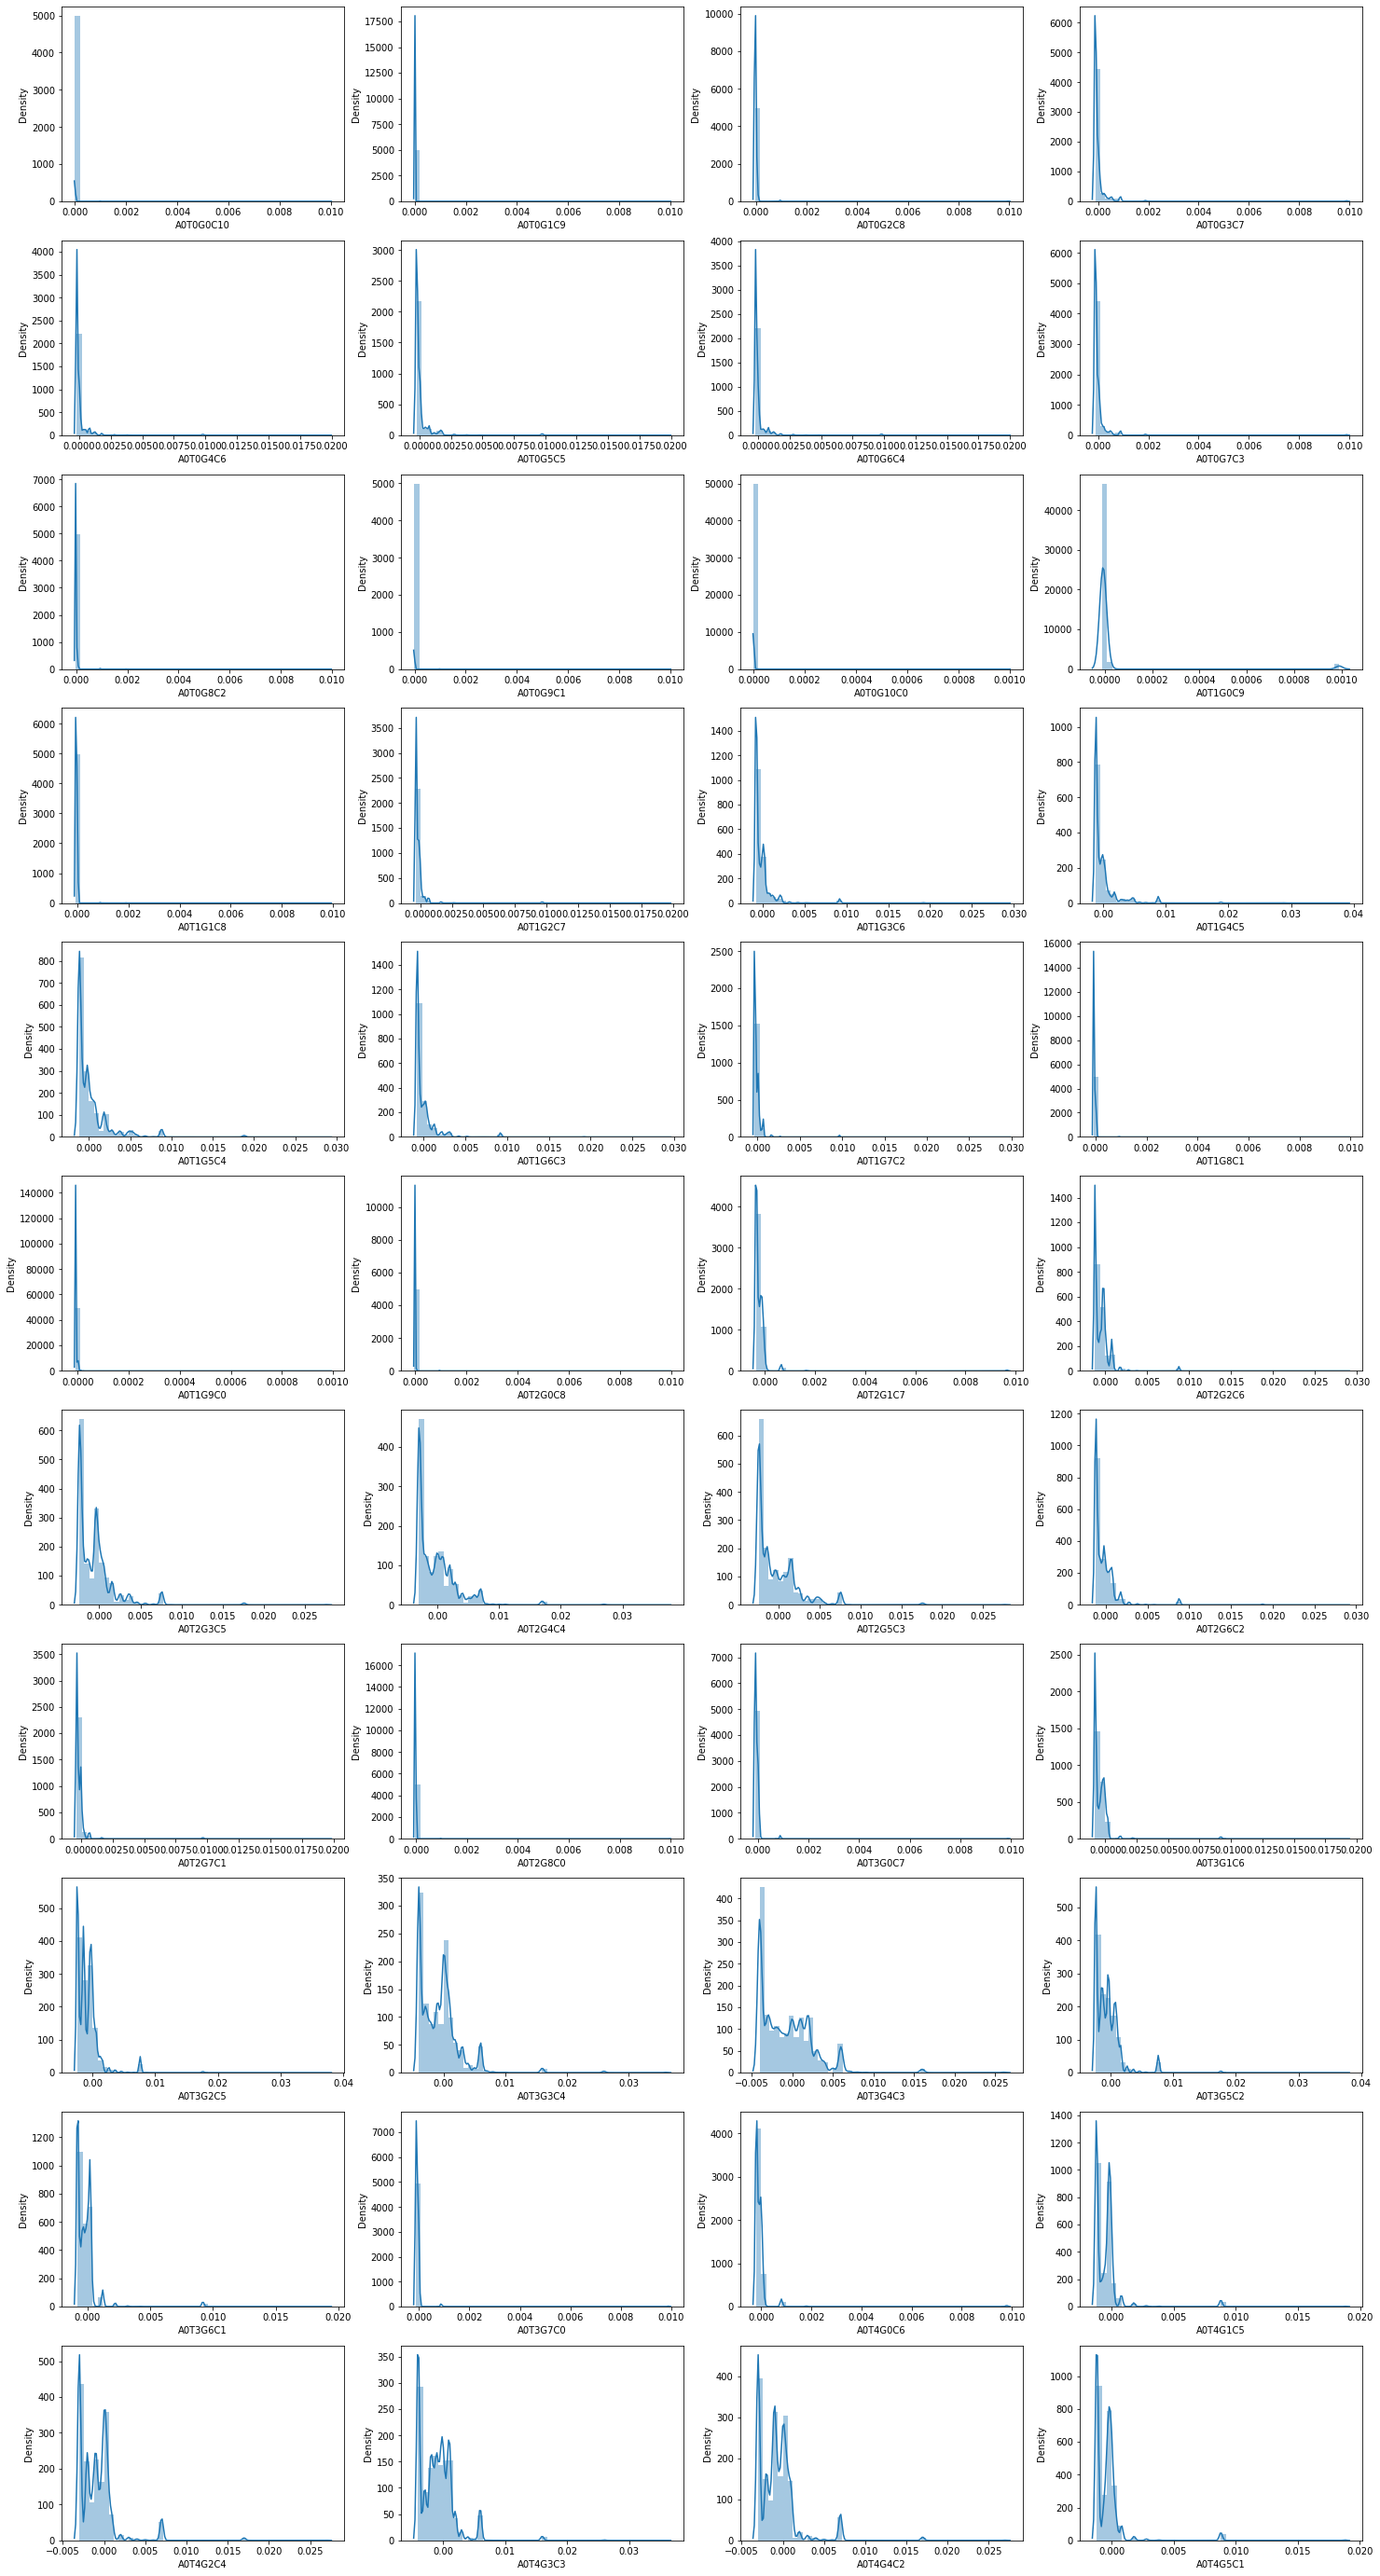

In [ ]:
 DistPlotDraw(TrainDf)
  


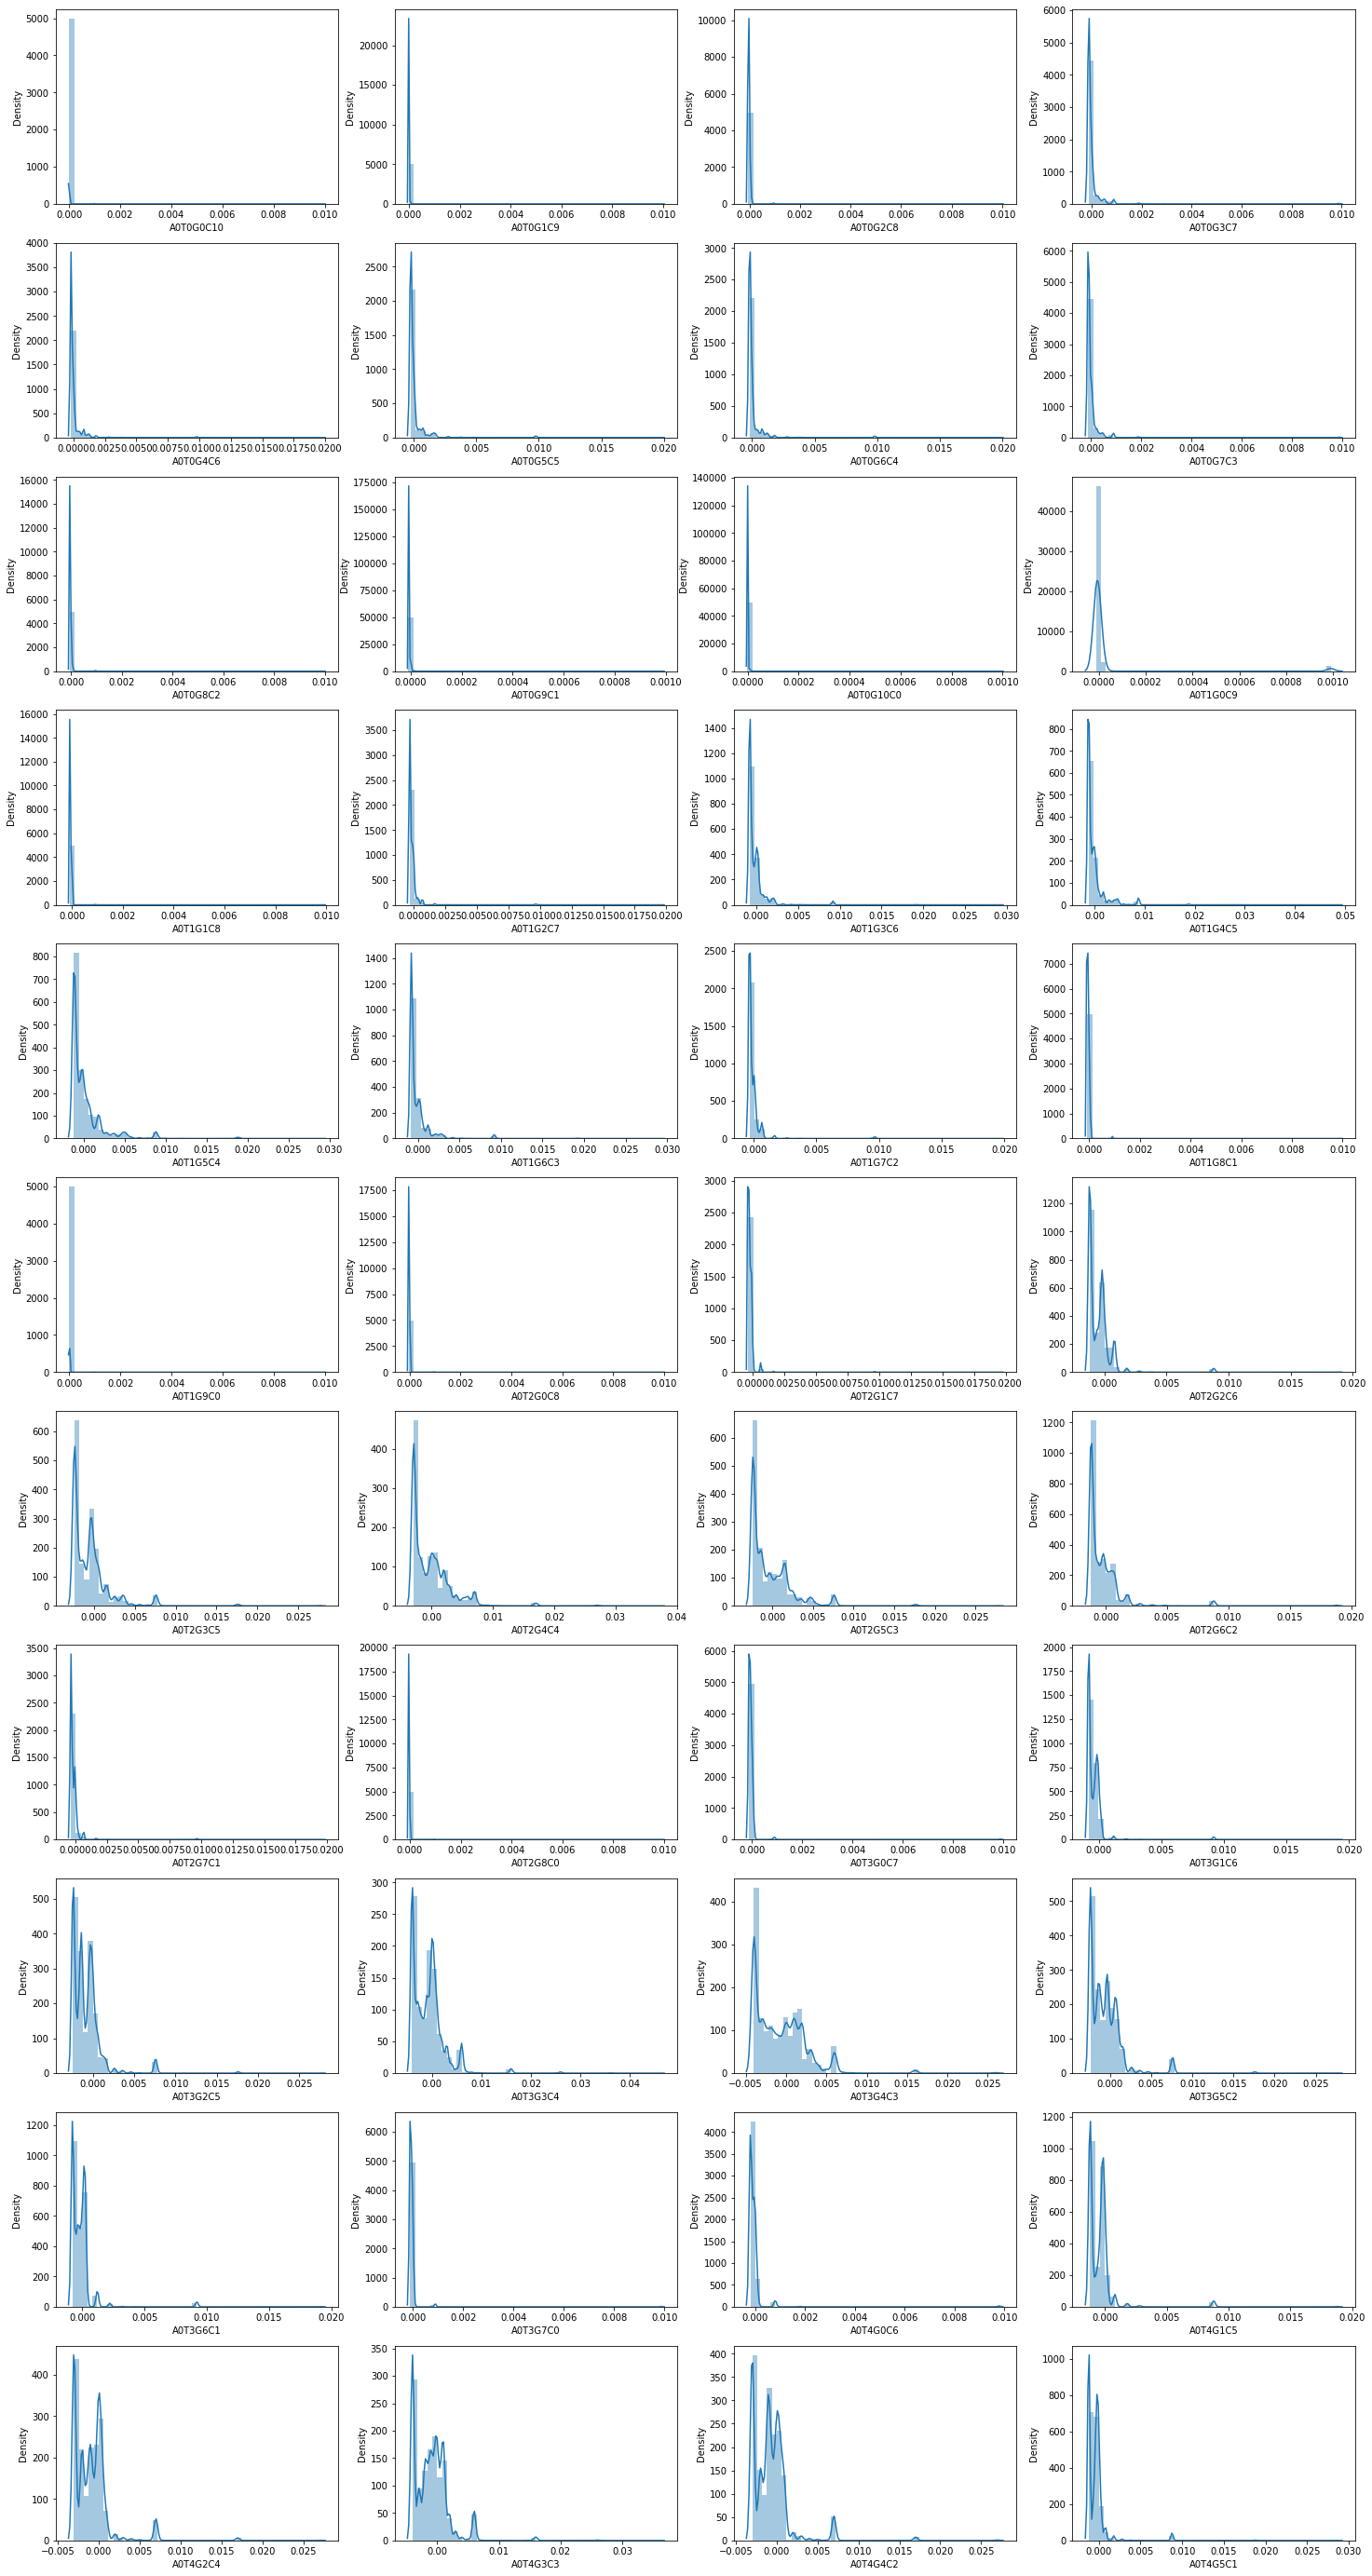

In [ ]:
 DistPlotDraw(TestDf) 

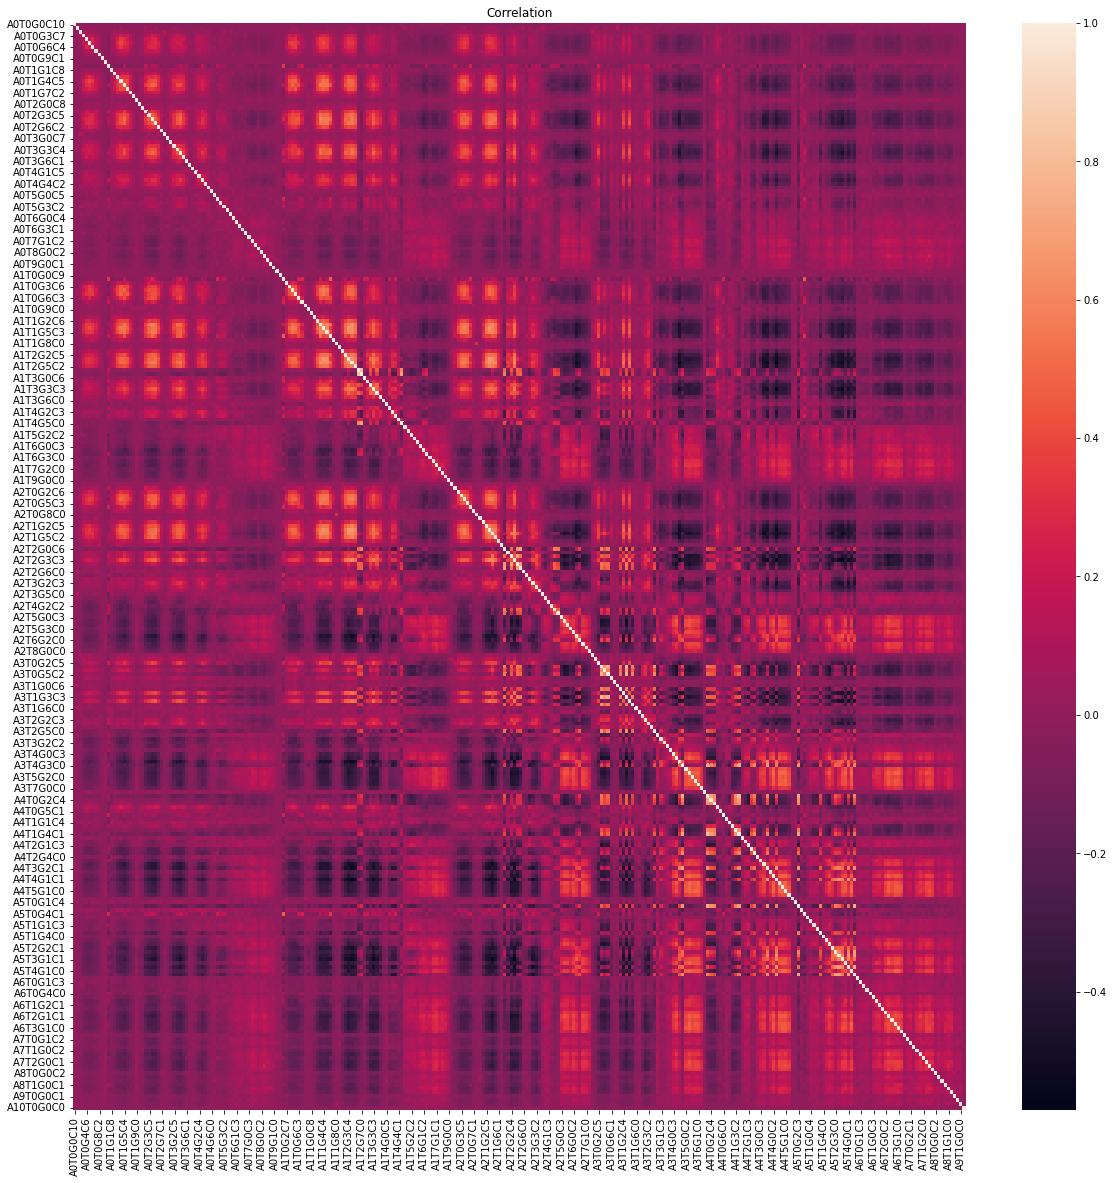

In [ ]:
plt.figure(figsize = (20,20))

sns.heatmap(TrainDf.corr())
plt.title('Correlation')
plt.show()

##Reduce Memory

In [ ]:
np.float16

numpy.float16

In [ ]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [ ]:
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype     
        if col_type != object and str(col_type)[:3]!='int':
            c_min = df[col].min()
            c_max = df[col].max() 
            if str(col_type)[:5] == 'float':  
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    return df

In [ ]:
TrainDf = reduce_mem_usage(TrainDf)
TestDf = reduce_mem_usage(TestDf)

In [ ]:
TrainDf.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: category(1), float16(286)
memory usage: 109.3 MB


In [ ]:
TestDf.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 286 entries, A0T0G0C10 to A10T0G0C0
dtypes: float16(286)
memory usage: 54.6 MB


In [ ]:
endMemTrain= TrainDf.memory_usage().sum() / 1024**2
endMemTest=TestDf.memory_usage().sum() / 1024**2

In [ ]:
TrainReduce=100 * (startMemTrain - endMemTrain) / startMemTrain
TestReduce=100 * (startMemTest - endMemTest) / startMemTest
print('Train DataSet memory reduce percentange:{}%:'.format(TrainReduce))
print('Test DataSet memory reduce percentange:{}%:'.format(TestReduce))

Train DataSet memory reduce percentange:75.13010499858194%:
Test DataSet memory reduce percentange:75.08706615355197%:


##Reduce Dimension

In [ ]:
TrainDf.columns

Index(['A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6', 'A0T0G5C5',
       'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2', 'A0T0G9C1',
       ...
       'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0', 'A9T0G0C1',
       'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0', 'target'],
      dtype='object', length=287)

In [ ]:
print("is there any null value in Train DataSet:",TrainDf.isnull().values.any())
print("is there any null value in Test DataSet :",TestDf.isnull().values.any())

is there any null value in Train DataSet: False
is there any null value in Test DataSet : False


In [ ]:
print("Sum of total null values in Train DataSet:",TrainDf.isnull().sum() )
print('------------------------------------------------------------------')
print("Sum of total null values in Test DataSet :",TestDf.isnull().sum() )

Sum of total null values in Train DataSet: A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
A0T0G4C6     0
            ..
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
target       0
Length: 287, dtype: int64
------------------------------------------------------------------
Sum of total null values in Test DataSet : A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
A0T0G4C6     0
            ..
A8T2G0C0     0
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
Length: 286, dtype: int64


In [ ]:
print(TrainDf['target'].unique())

print('size of unique target rows:',len(TrainDf['target'].unique()))

['Streptococcus_pyogenes', 'Salmonella_enterica', 'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni', 'Streptococcus_pneumoniae', 'Staphylococcus_aureus', 'Escherichia_fergusonii', 'Bacteroides_fragilis', 'Klebsiella_pneumoniae']
Categories (10, object): ['Bacteroides_fragilis', 'Campylobacter_jejuni', 'Enterococcus_hirae',
                          'Escherichia_coli', ..., 'Salmonella_enterica', 'Staphylococcus_aureus',
                          'Streptococcus_pneumoniae', 'Streptococcus_pyogenes']
size of unique target rows: 10


Remove Duplicate Rows

In [ ]:
print('Total Number of Duplicate Rows in Train DataSet:',TrainDf.duplicated().sum())
print('Total Number of Duplicate Rows in Test DataSet:',TestDf.duplicated().sum())


Total Number of Duplicate Rows in Train DataSet: 76007
Total Number of Duplicate Rows in Test DataSet: 26779


In [ ]:
TrainDf = TrainDf.drop_duplicates()
# TestDf = TestDf.drop_duplicates()
print('After Remove Duplicate Rows Train DataSet Shape:',TrainDf.shape)
# print('After Remove Duplicate Rows Test DataSet Shape:',TestDf.shape) 


After Remove Duplicate Rows Train DataSet Shape: (123993, 287)


In [ ]:
TestDf2=TestDf
TestDf2 = TestDf2.drop_duplicates()
print('After Remove Duplicate Rows Train DataSet Shape:',TrainDf.shape)
print('After Remove Duplicate Rows Test DataSet Shape:',TestDf2.shape) 

##Outliers

Outliers Visulaization

Before Replace Outliers

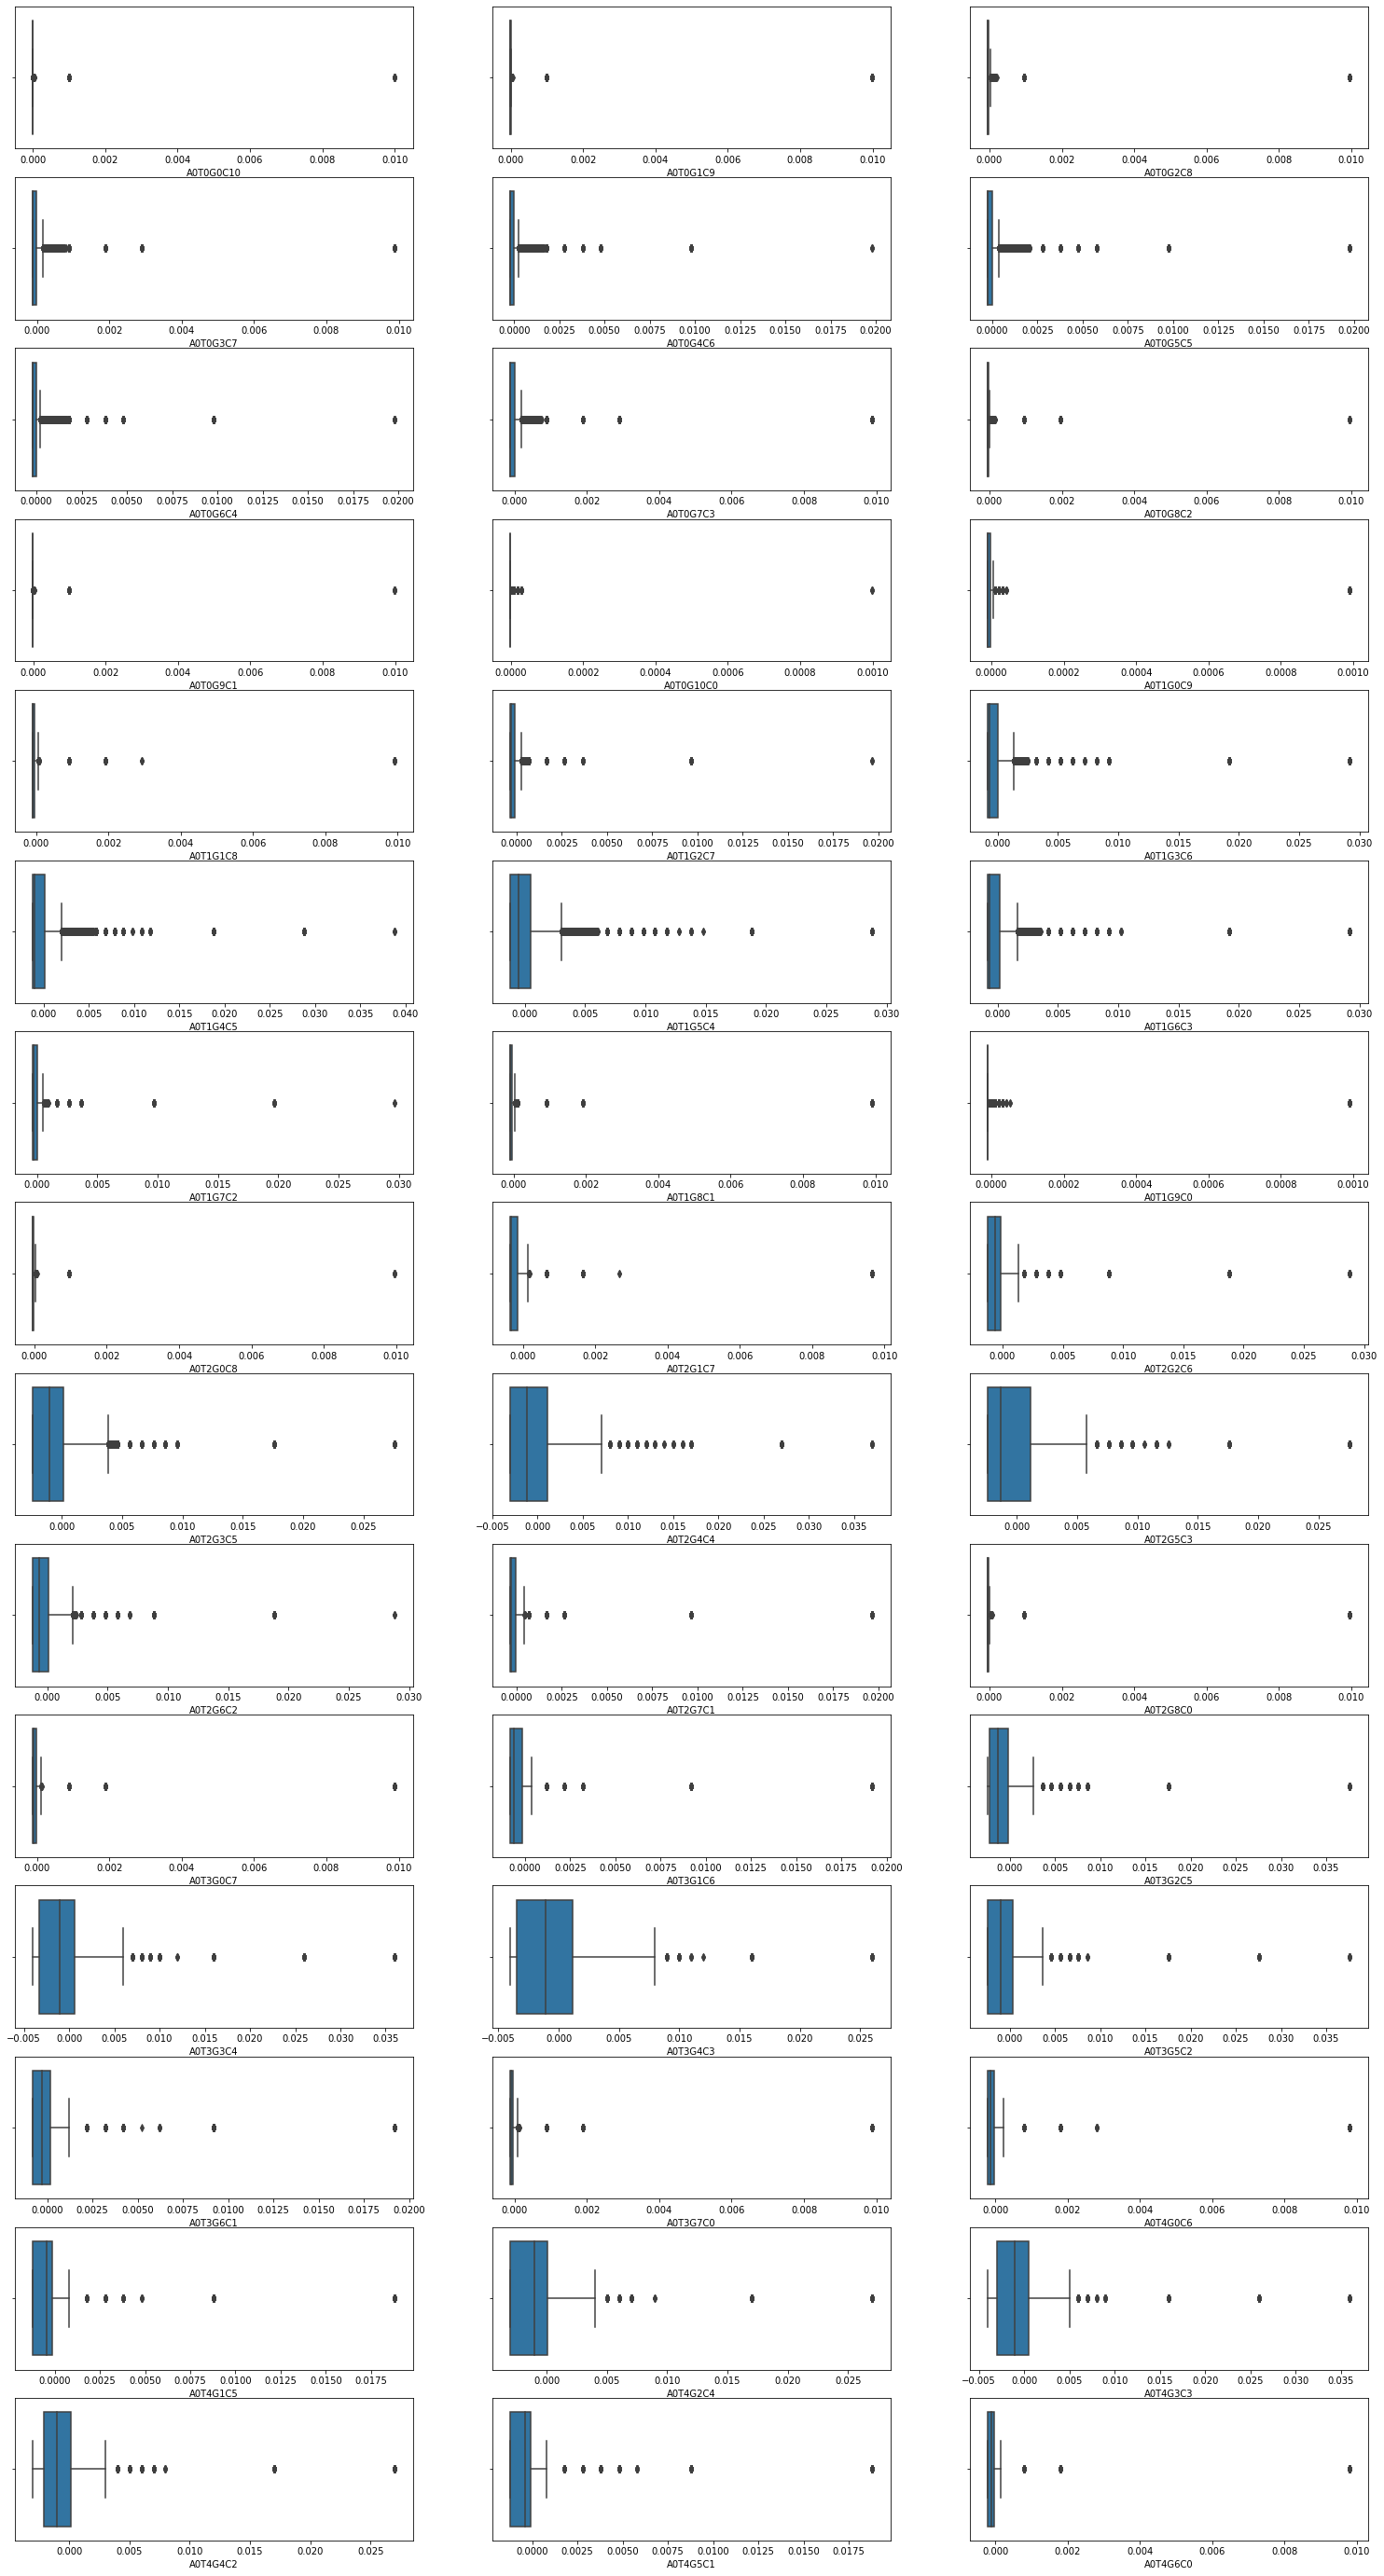

In [ ]:
show_boxplot(TrainDf)

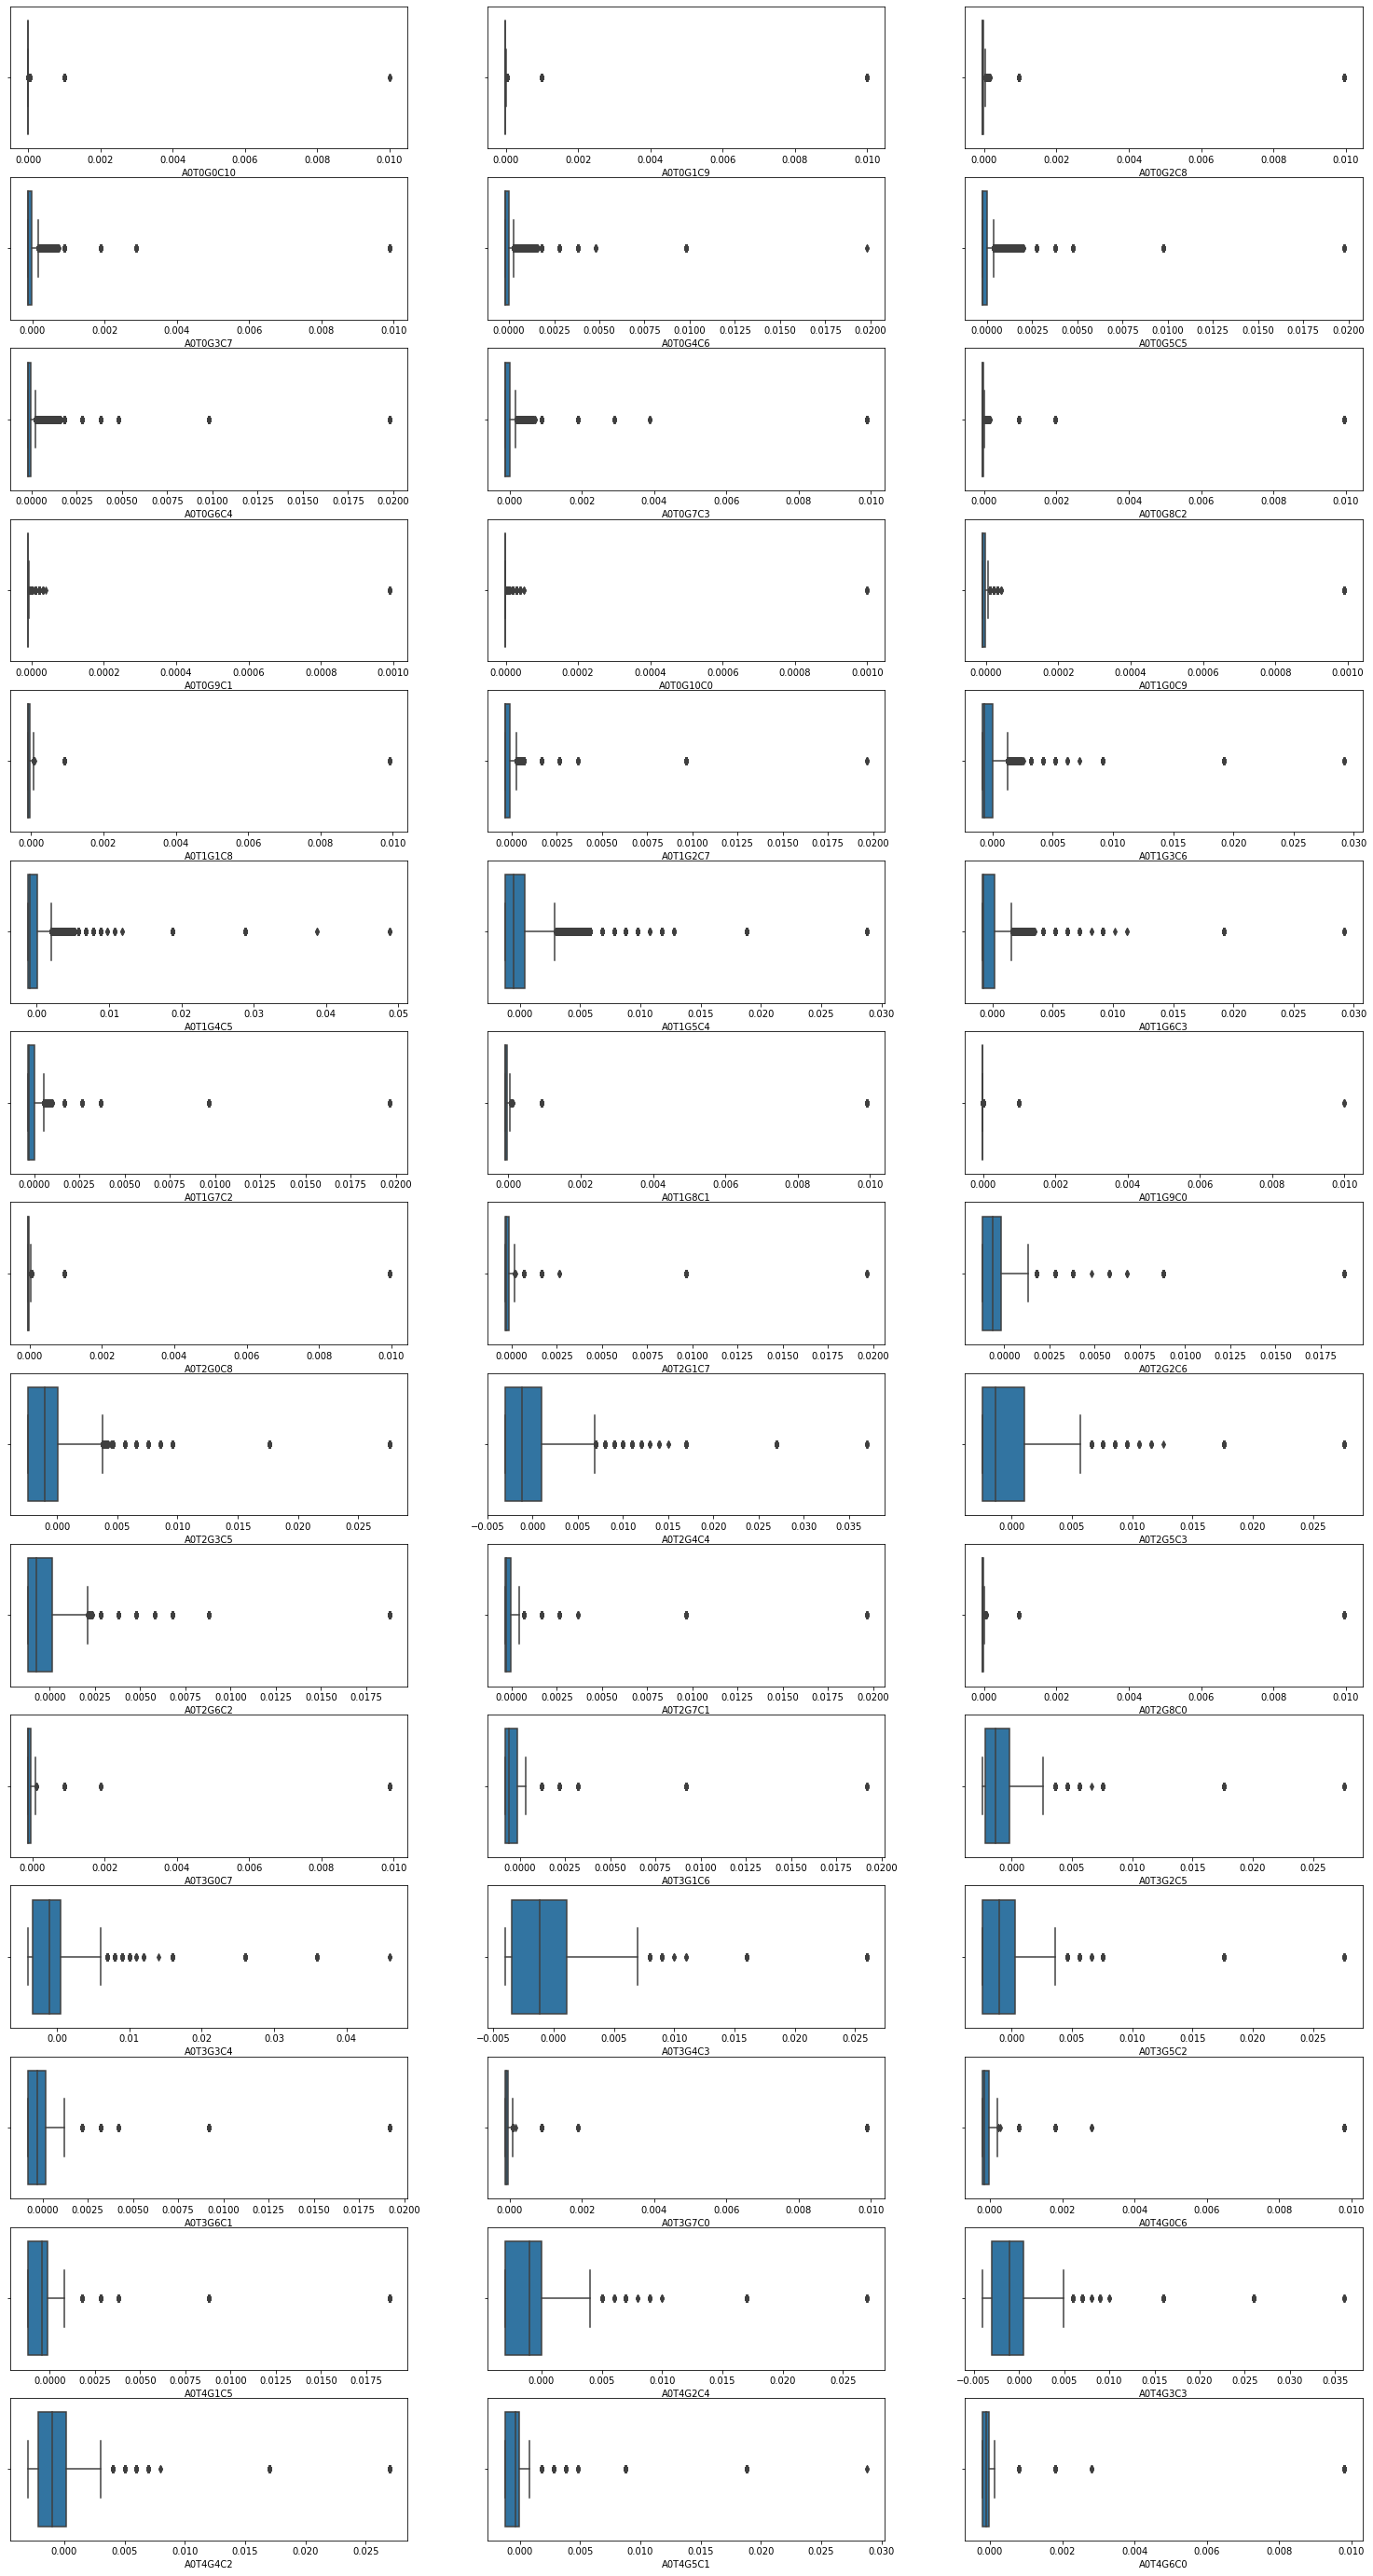

In [ ]:
show_boxplot(TestDf)

Replace Outliers

In [ ]:
def ReplaceOutliers(df):
  for col in colNames:
     if(col!='target'):
      q1=df[col].quantile(0.25)
      q3=df[col].quantile(0.75)
      IQR=q3-q1
      upperBound=q3+(1.5*IQR)
      lowerBound=q1-(1.5*IQR)
      df[col]=np.where(df[col]>upperBound,upperBound,
         np.where(df[col]<lowerBound,lowerBound,df[col]))
  return df   
   

In [ ]:
TrainDf=ReplaceOutliers(TrainDf)
TestDf=ReplaceOutliers(TestDf)
# combine=ReplaceOutliers(combine)




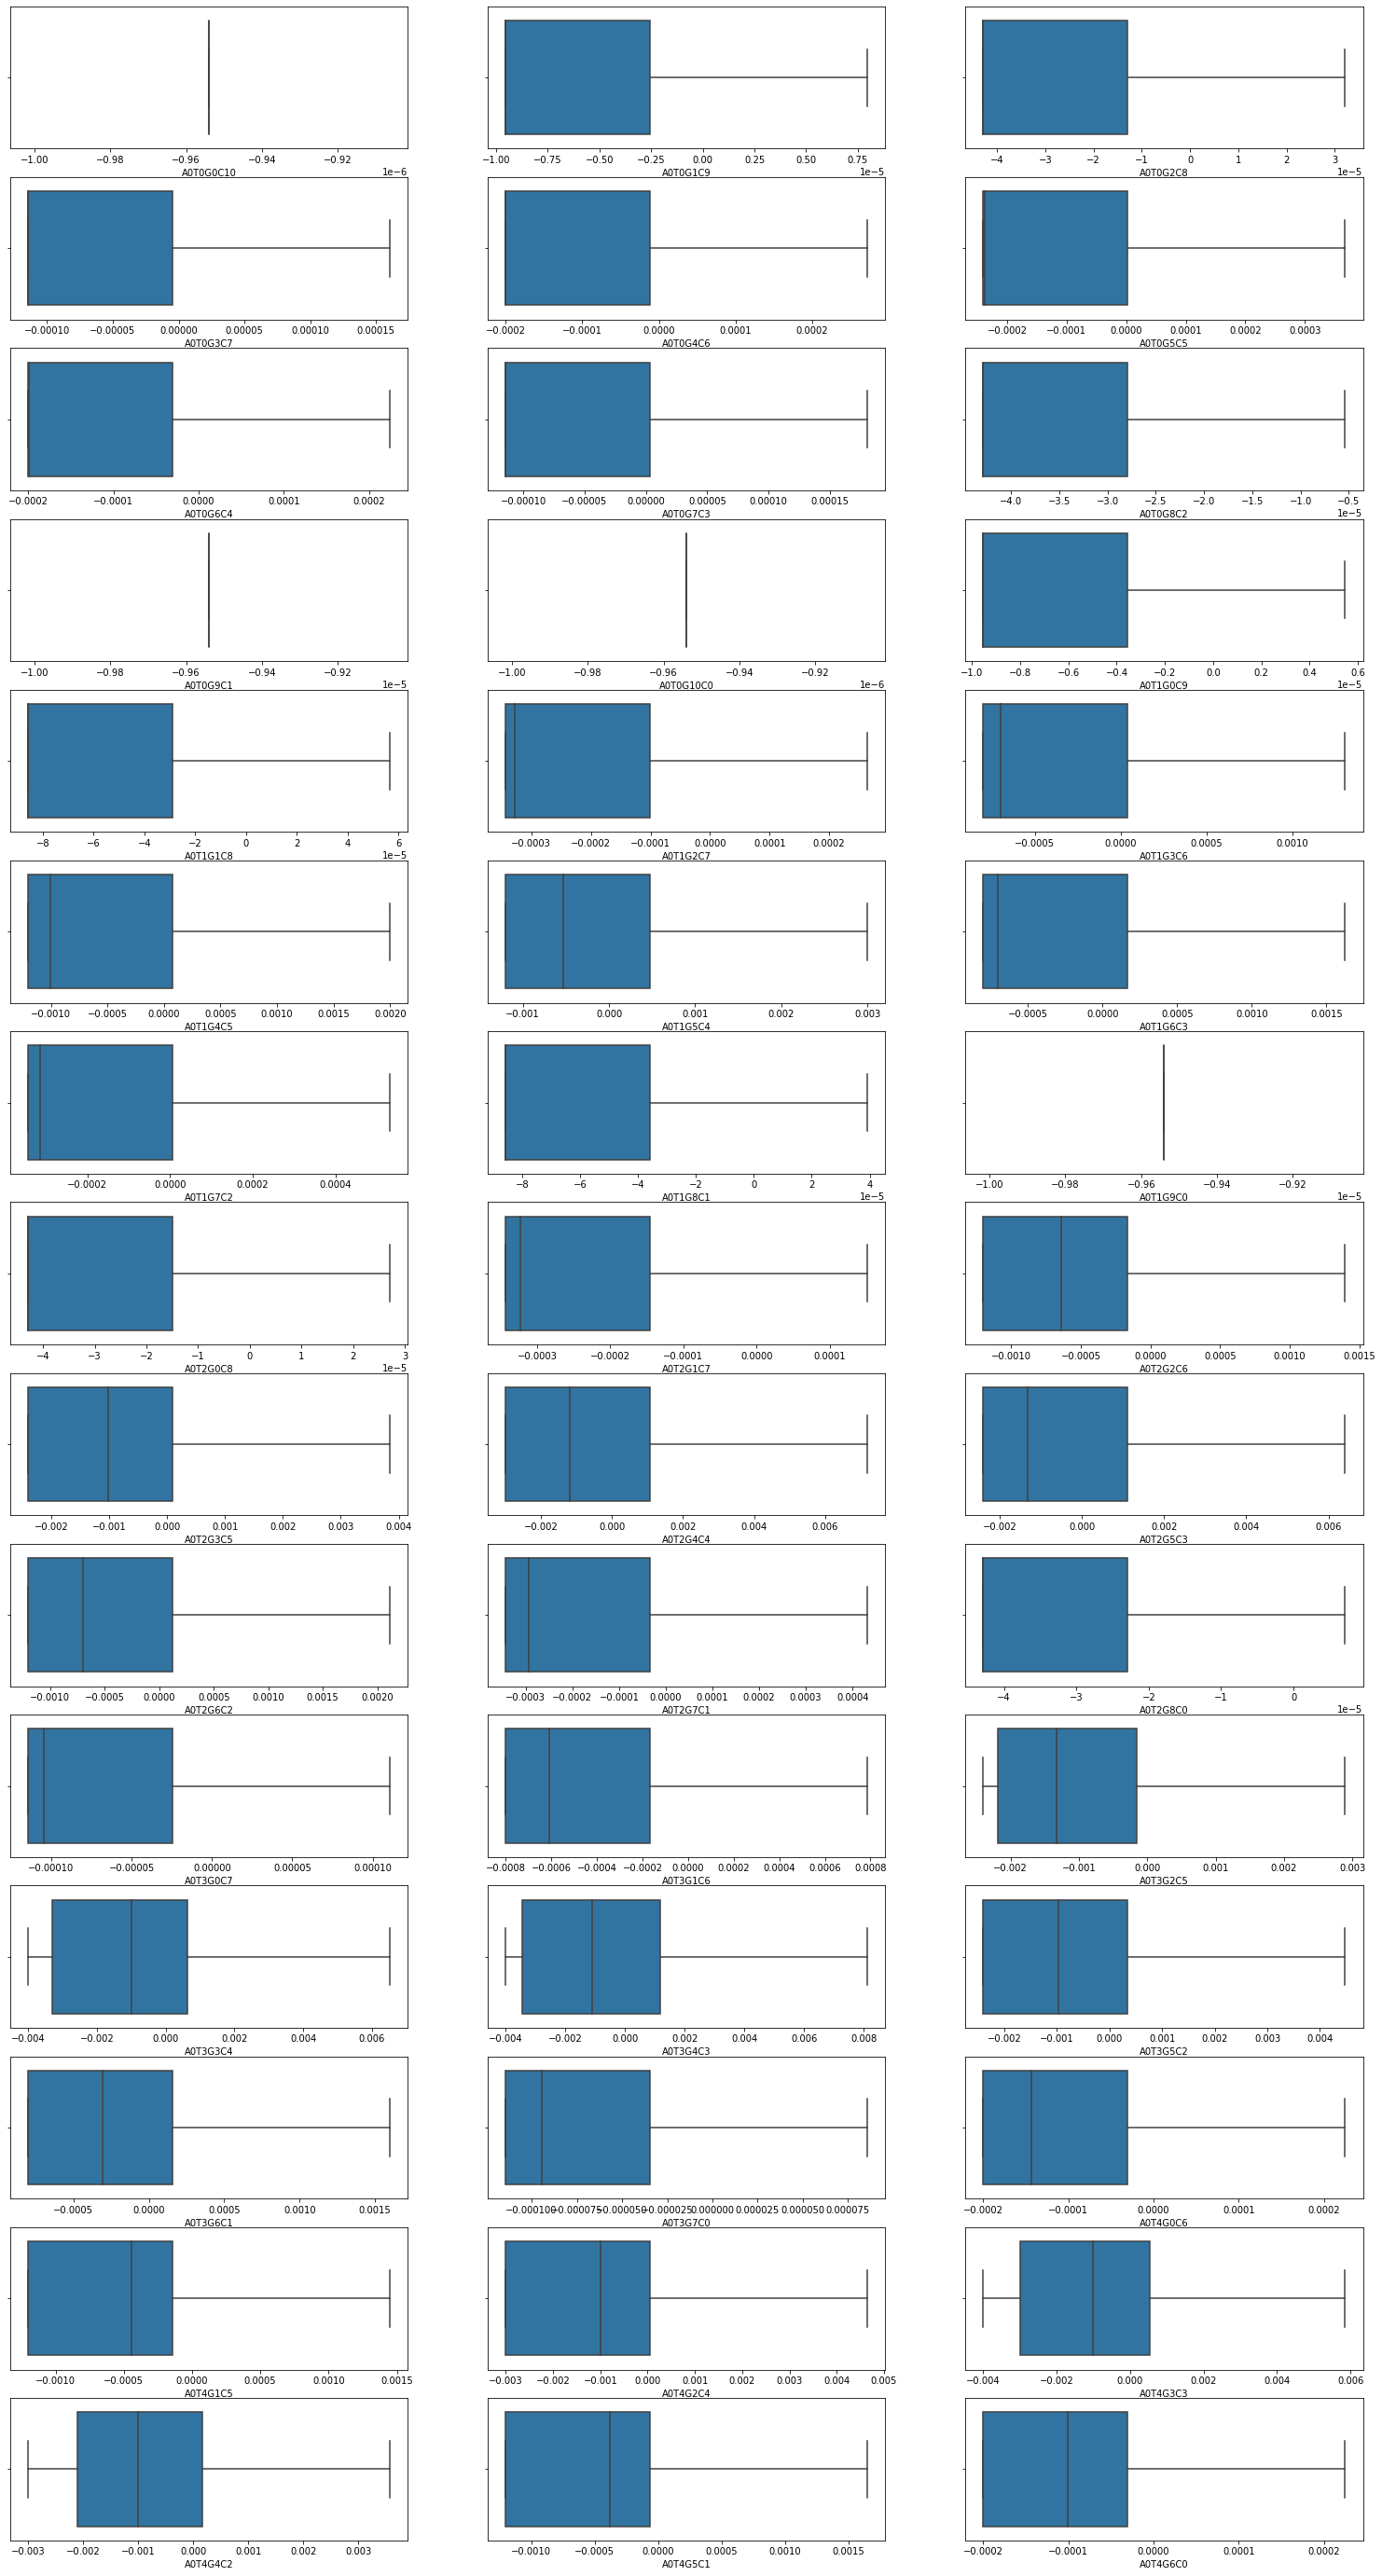

In [ ]:
show_boxplot(TrainDf)

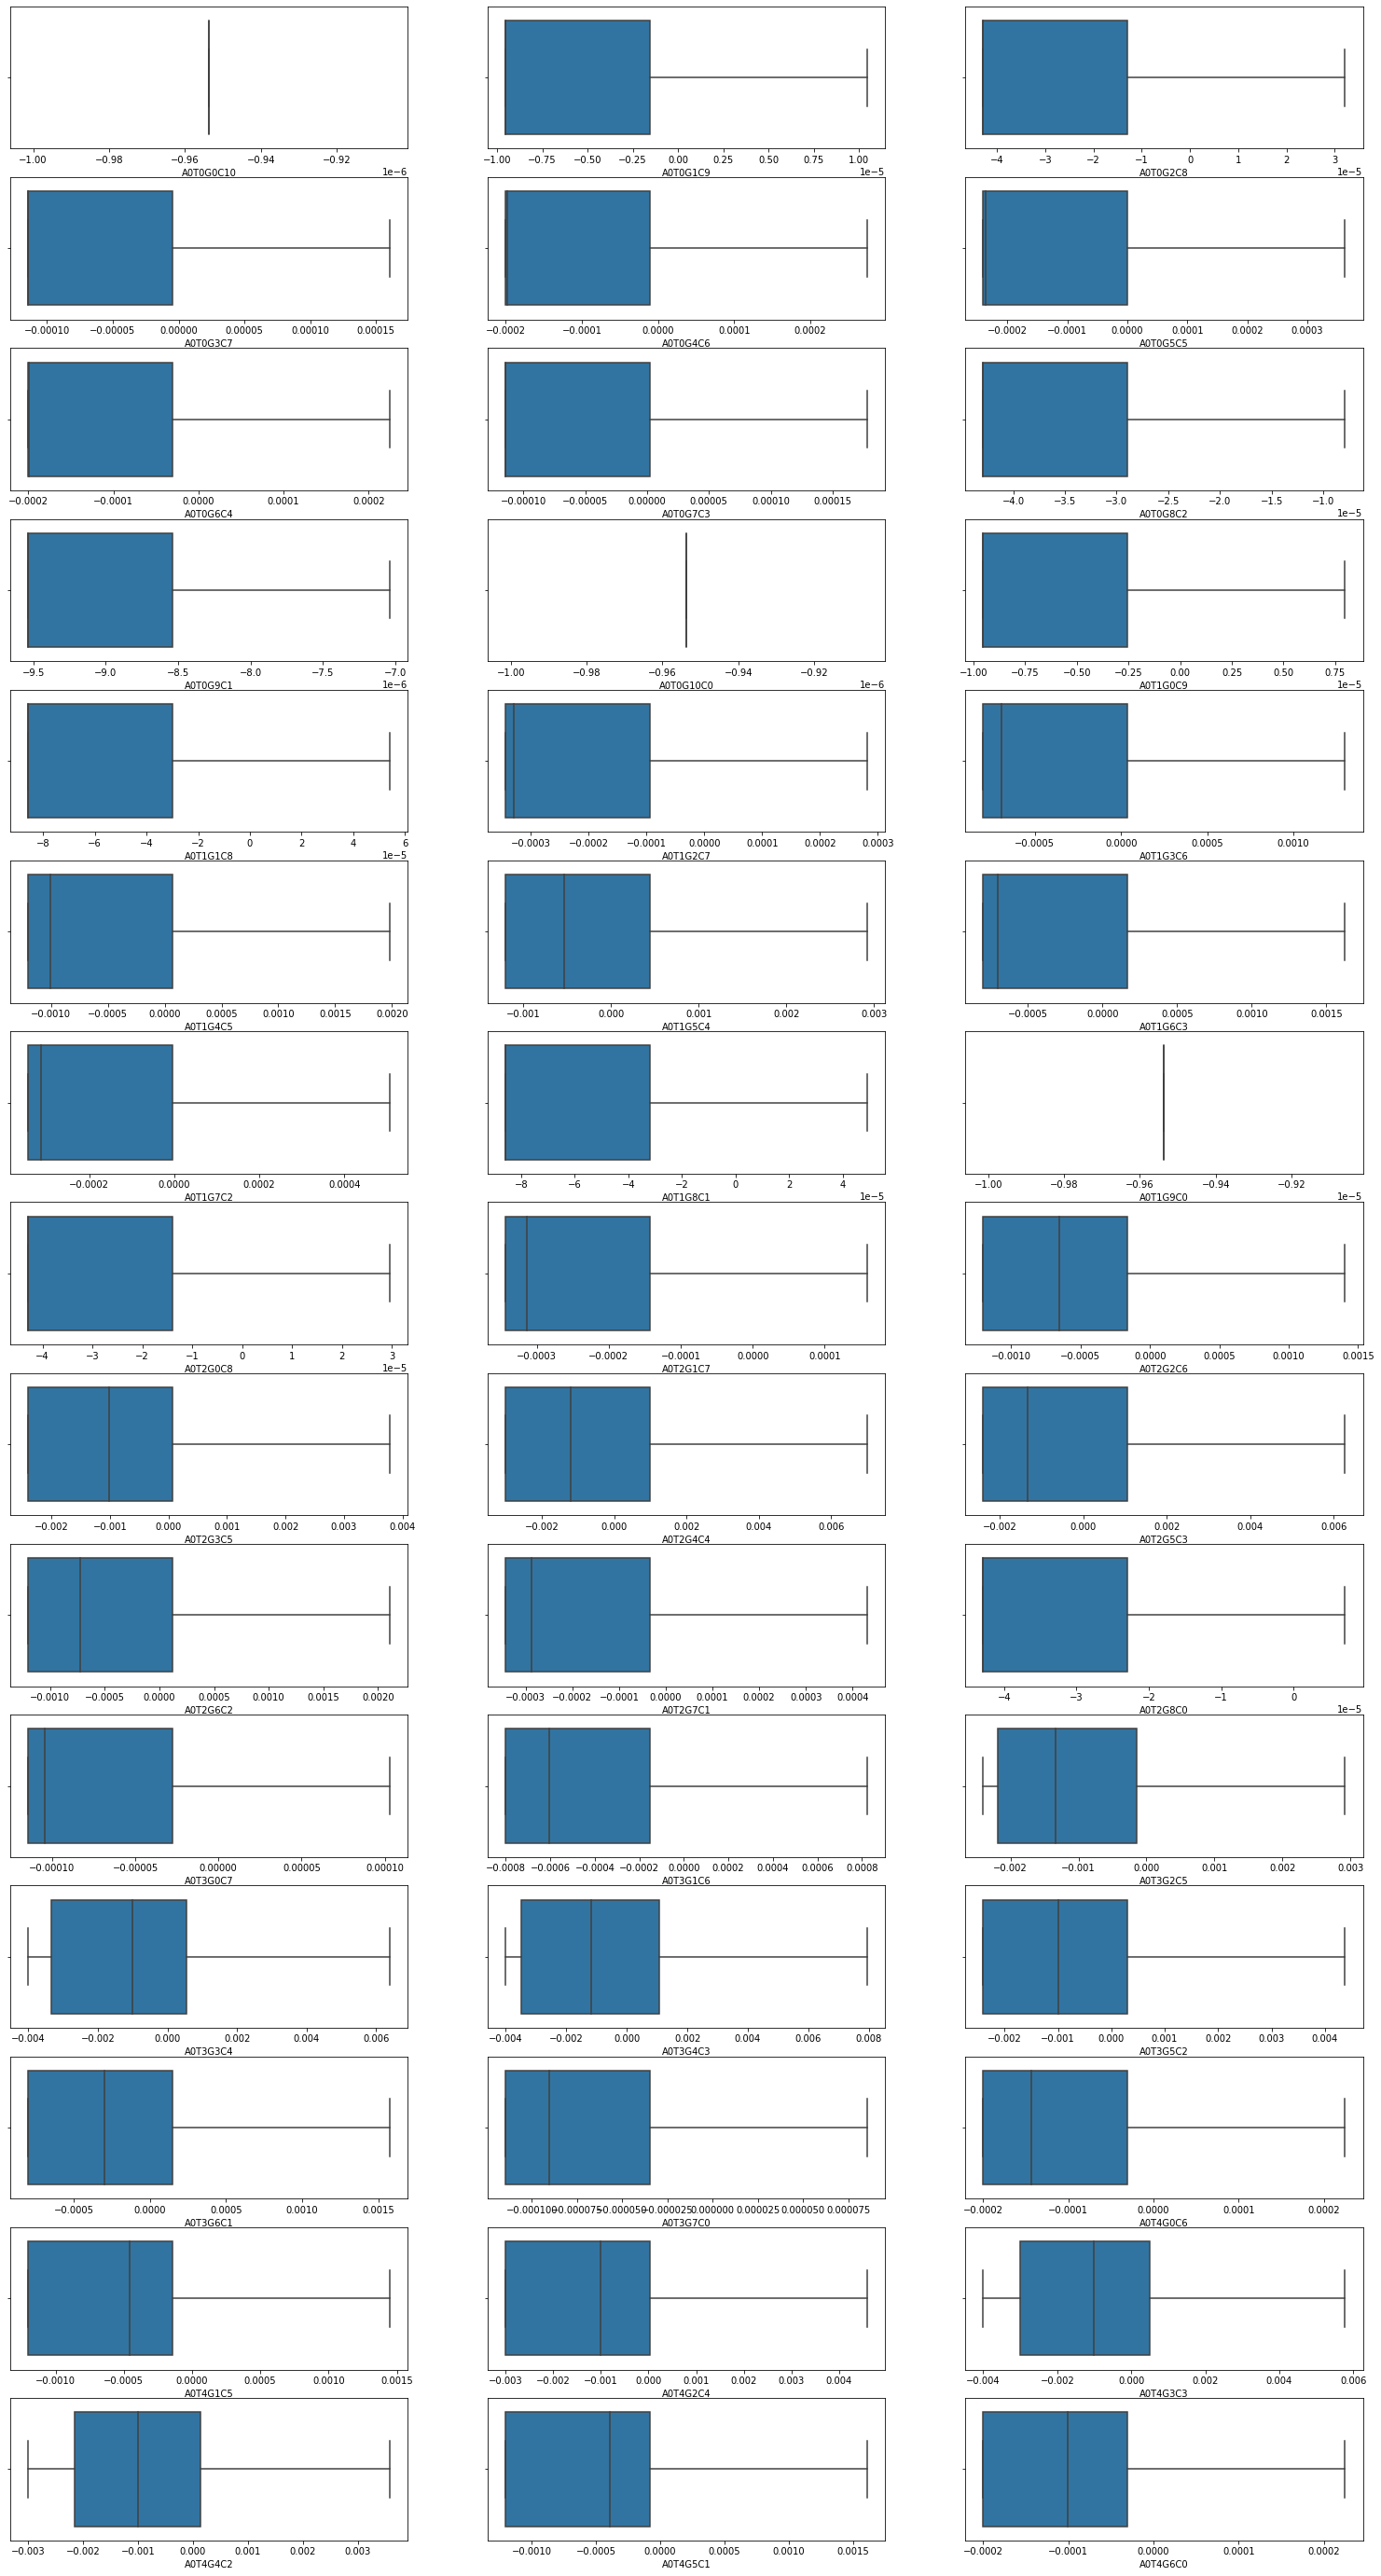

In [ ]:
show_boxplot(TestDf)

##Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
TrainDf['target']=label_encoder.fit_transform(TrainDf['target'])

In [ ]:
target=TrainDf['target']

In [ ]:
target

0         9
1         6
2         6
3         6
4         2
         ..
199989    5
199990    3
199991    0
199995    6
199997    8
Name: target, Length: 123993, dtype: int64

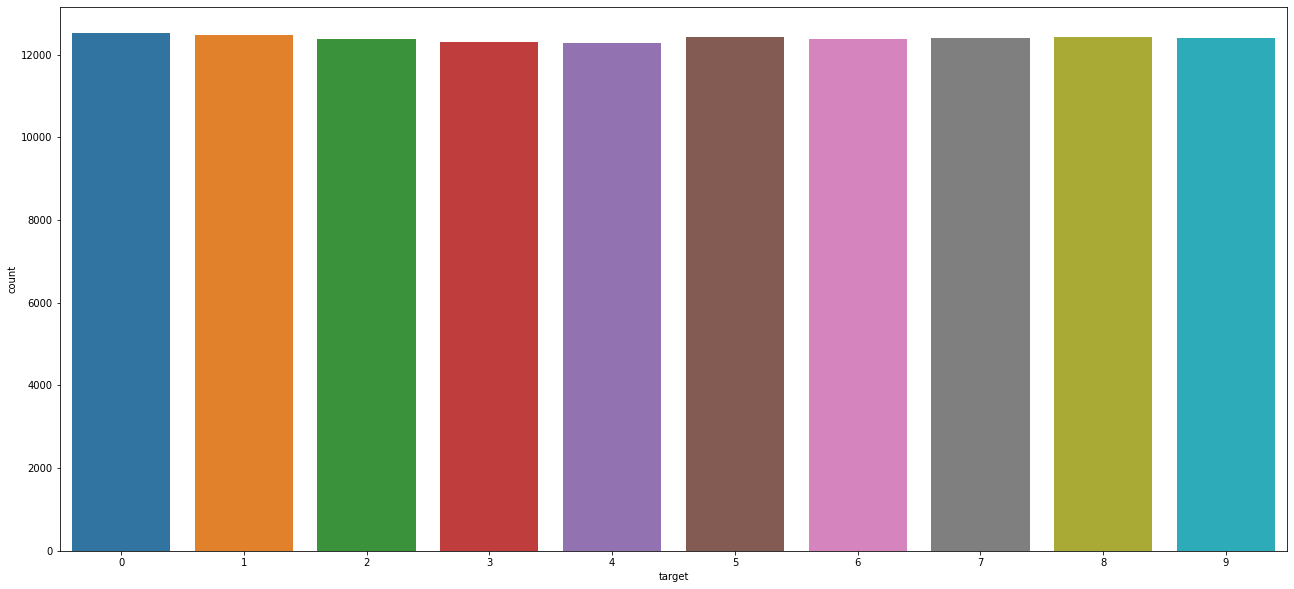

In [ ]:
fig = plt.figure(figsize=(22, 10))
sns.countplot(data = TrainDf, x = "target")
fig.show()

##Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Scaler=StandardScaler()
scaler = MinMaxScaler()

In [ ]:
TrainDfScaled= pd.DataFrame(scaler.fit_transform(TrainDf), index=TrainDf.index, columns=TrainDf.columns)
TestDfScaled= pd.DataFrame(scaler.fit_transform(TestDf), index=TestDf.index, columns=TestDf.columns)
# X_train, X_val, Y_train, Y_val 
# X_train=scaler.fit_transform(X_train)
# X_val=scaler.fit_transform(X_val)



In [ ]:
TrainDfScaled

A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  A0T0G6C4  \
0             0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1             0.0  0.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
2             0.0  0.319048  0.454743  0.694142  0.796672  0.728542  0.805375   
3             0.0  0.159524  0.500271  1.000000  1.000000  1.000000  1.000000   
4             0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
199989        0.0  0.800000  0.909485  0.342813  0.476562  0.714237  0.618119   
199990        0.0  0.200000  0.409214  0.445845  0.452719  0.368614  0.467165   
199991        0.0  0.200000  0.218428  0.174387  0.183746  0.158549  0.183572   
199995        0.0  0.400000  0.363686  0.828678  0.936282  0.757153  0.727135   
199997        0.0  0.438095  0.345257  0.237228  0.308036  0.290020  0.296272   

        A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G1C1  A8T0G2C0  A8T1G0C1  \
0       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.671242   
2       0.637317  0.585714  0.609756  ...  0.131265  0.102072  0.112080   
3       0.829307  0.532540  0.609756  ...  0.182952  0.160361  0.178504   
4       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...          ...       ...       ...  ...       ...       ...       ...   
199989  0.560076  0.133333  0.000000  ...  0.077185  0.112166  0.087271   
199990  0.386682  0.546032  0.609756  ...  0.160584  0.107687  0.138250   
199991  0.184043  0.226190  0.207317  ...  0.342753  0.416043  0.265816   
199995  0.853147  0.266667  0.000000  ...  0.162148  0.112166  0.127526   
199997  0.264145  0.505556  0.402439  ...  0.155153  0.195187  0.131527   

        A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0  A10T0G0C0    target  
0       0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  1.000000  
1       0.510701  0.000000  0.000000  0.000000  0.000000   0.000000  0.666667  
2       0.098030  0.104437  0.114364  0.069907  0.109487   0.809524  0.666667  
3       0.147076  0.177922  0.177332  0.097222  0.211331   0.000000  0.666667  
4       0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.222222  
...          ...       ...       ...       ...       ...        ...       ...  
199989  0.051055  0.009091  0.000000  0.077778  0.000000   0.000000  0.555556  
199990  0.111821  0.118939  0.120150  0.077778  0.139613   0.404762  0.333333  
199991  0.322191  0.260606  0.371341  0.322454  0.320818   0.404762  0.000000  
199995  0.117423  0.063582  0.057182  0.271991  0.113309   0.000000  0.666667  
199997  0.152678  0.124405  0.148741  0.175000  0.117131   0.404762  0.888889  

[123993 rows x 287 columns]

In [ ]:
TestDfScaled

A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  A0T0G6C4  \
0            0.0  0.000008  0.000042  0.000138  0.000234  0.000238  0.000221   
1            0.0  0.000000  0.000000  0.000000  0.000475  0.000000  0.000425   
2            0.0  0.000013  0.000043  0.000100  0.000207  0.000235  0.000196   
3            0.0  0.000002  0.000051  0.000275  0.000475  0.000603  0.000425   
4            0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
99995        0.0  0.000002  0.000000  0.000006  0.000006  0.000006  0.000005   
99996        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99997        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99998        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99999        0.0  0.000001  0.000003  0.000003  0.000005  0.000002  0.000011   

       A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  \
0      0.000138  0.000034  0.000002  ...  0.000082  0.000171  0.000098   
1      0.000000  0.000035  0.000000  ...  0.000000  0.000999  0.000000   
2      0.000117  0.000035  0.000002  ...  0.000084  0.000188  0.000127   
3      0.000293  0.000035  0.000002  ...  0.000112  0.000244  0.000141   
4      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
99995  0.000004  0.000000  0.000000  ...  0.000202  0.000645  0.000532   
99996  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
99997  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
99998  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
99999  0.000004  0.000001  0.000000  ...  0.000347  0.000851  0.000467   

       A8T1G0C1  A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0  A10T0G0C0  
0      0.000194  0.000176  0.000102  0.000020  0.000016  0.000037        0.0  
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000        0.0  
2      0.000197  0.000203  0.000113  0.000030  0.000040  0.000031        0.0  
3      0.000261  0.000303  0.000193  0.000028  0.000026  0.000061        0.0  
4      0.000000  0.000999  0.000000  0.000000  0.000000  0.000200        0.0  
...         ...       ...       ...       ...       ...       ...        ...  
99995  0.000585  0.000985  0.000486  0.000057  0.000158  0.000111        0.0  
99996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000        0.0  
99997  0.000999  0.000000  0.000000  0.000000  0.000000  0.000000        0.0  
99998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000        0.0  
99999  0.000920  0.000961  0.000528  0.000103  0.000154  0.000158        0.0  

[100000 rows x 286 columns]

##Spliting DataSet

In [ ]:
# X =combine_scaled[:len(TrainDf)]
X=TrainDfScaled.drop('target',axis=1)
# X=TrainDfSc.drop('target',axis=1)
Y=target
# X_test=combine_scaled[len(TrainDf):]
X_test=TestDfScaled
# X_test=TestDfSc

In [ ]:
X

A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  A0T0G6C4  \
0             0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1             0.0  0.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
2             0.0  0.319048  0.454743  0.694142  0.796672  0.728542  0.805375   
3             0.0  0.159524  0.500271  1.000000  1.000000  1.000000  1.000000   
4             0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
199989        0.0  0.800000  0.909485  0.342813  0.476562  0.714237  0.618119   
199990        0.0  0.200000  0.409214  0.445845  0.452719  0.368614  0.467165   
199991        0.0  0.200000  0.218428  0.174387  0.183746  0.158549  0.183572   
199995        0.0  0.400000  0.363686  0.828678  0.936282  0.757153  0.727135   
199997        0.0  0.438095  0.345257  0.237228  0.308036  0.290020  0.296272   

        A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  \
0       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2       0.637317  0.585714  0.609756  ...  0.199273  0.131265  0.102072   
3       0.829307  0.532540  0.609756  ...  0.260341  0.182952  0.160361   
4       0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...          ...       ...       ...  ...       ...       ...       ...   
199989  0.560076  0.133333  0.000000  ...  0.164198  0.077185  0.112166   
199990  0.386682  0.546032  0.609756  ...  0.215763  0.160584  0.107687   
199991  0.184043  0.226190  0.207317  ...  0.311906  0.342753  0.416043   
199995  0.853147  0.266667  0.000000  ...  0.140721  0.162148  0.112166   
199997  0.264145  0.505556  0.402439  ...  0.166434  0.155153  0.195187   

        A8T1G0C1  A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0  A10T0G0C0  
0       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  
1       0.671242  0.510701  0.000000  0.000000  0.000000  0.000000   0.000000  
2       0.112080  0.098030  0.104437  0.114364  0.069907  0.109487   0.809524  
3       0.178504  0.147076  0.177922  0.177332  0.097222  0.211331   0.000000  
4       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  
...          ...       ...       ...       ...       ...       ...        ...  
199989  0.087271  0.051055  0.009091  0.000000  0.077778  0.000000   0.000000  
199990  0.138250  0.111821  0.118939  0.120150  0.077778  0.139613   0.404762  
199991  0.265816  0.322191  0.260606  0.371341  0.322454  0.320818   0.404762  
199995  0.127526  0.117423  0.063582  0.057182  0.271991  0.113309   0.000000  
199997  0.131527  0.152678  0.124405  0.148741  0.175000  0.117131   0.404762  

[123993 rows x 286 columns]

In [ ]:
Y

0         9
1         6
2         6
3         6
4         2
         ..
199989    5
199990    3
199991    0
199995    6
199997    8
Name: target, Length: 123993, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.3, shuffle=True,stratify=Y, random_state=21)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(86795, 286)
(37198, 286)
(86795,)
(37198,)


##Data Visualization After Preprocessing

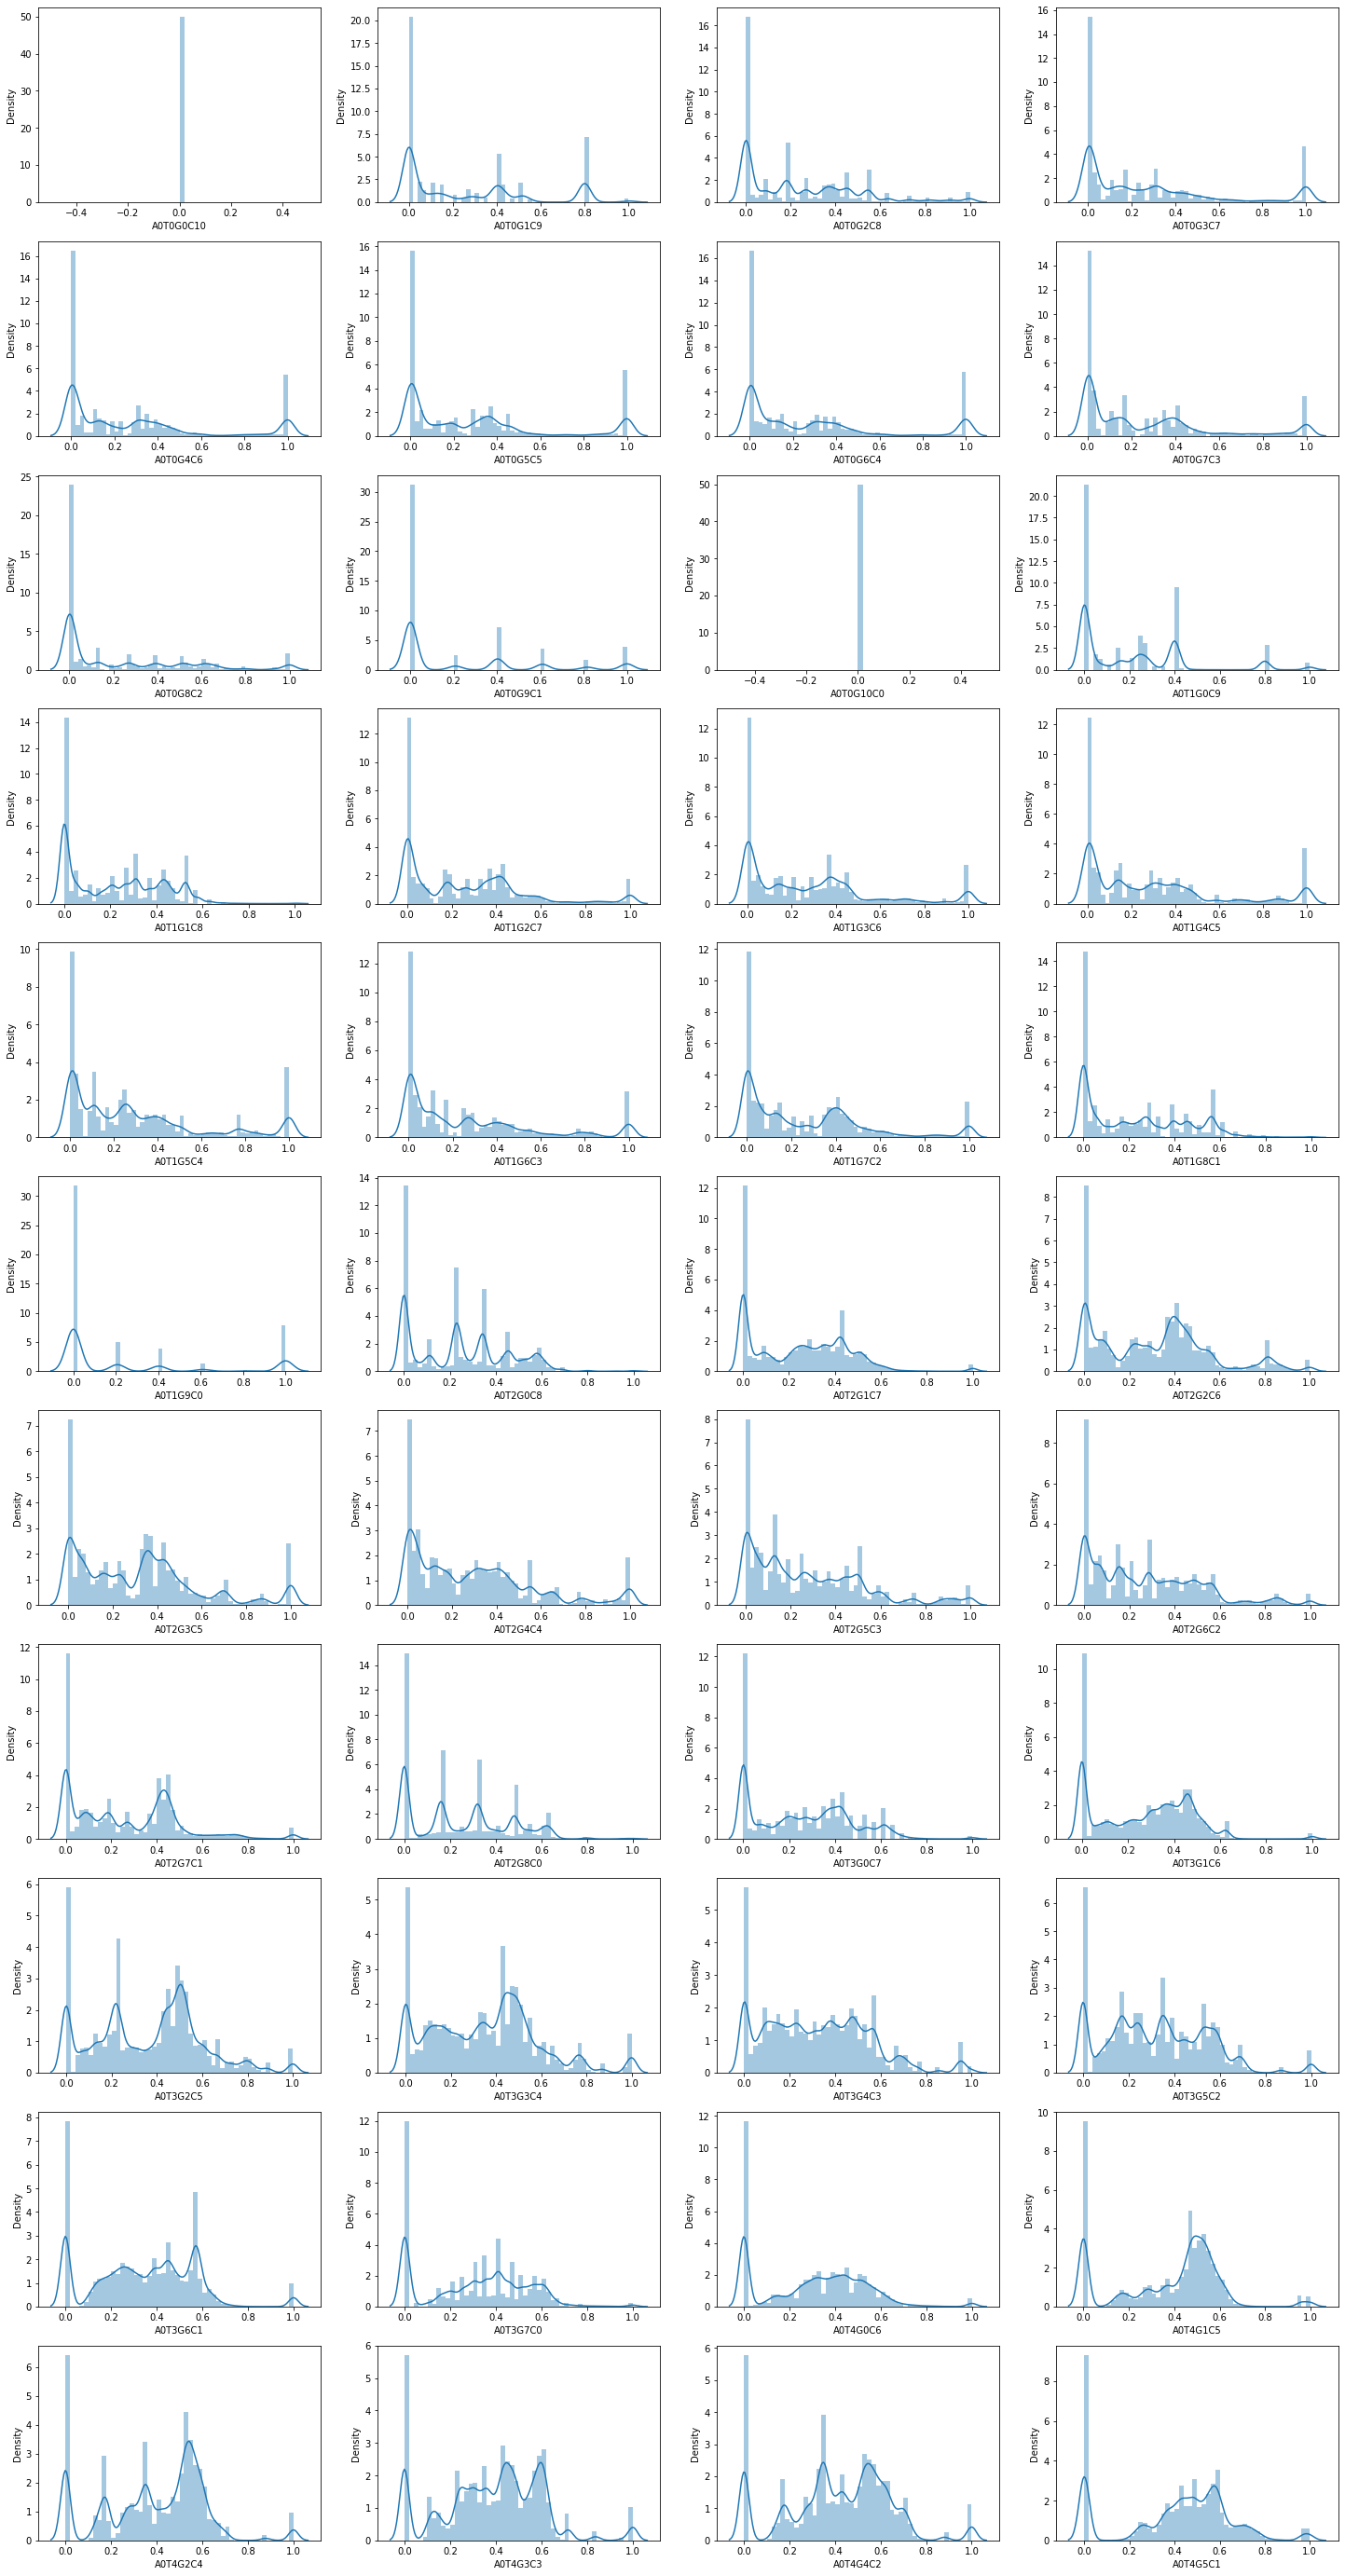

In [ ]:
 DistPlotDraw(TrainDfScaled)

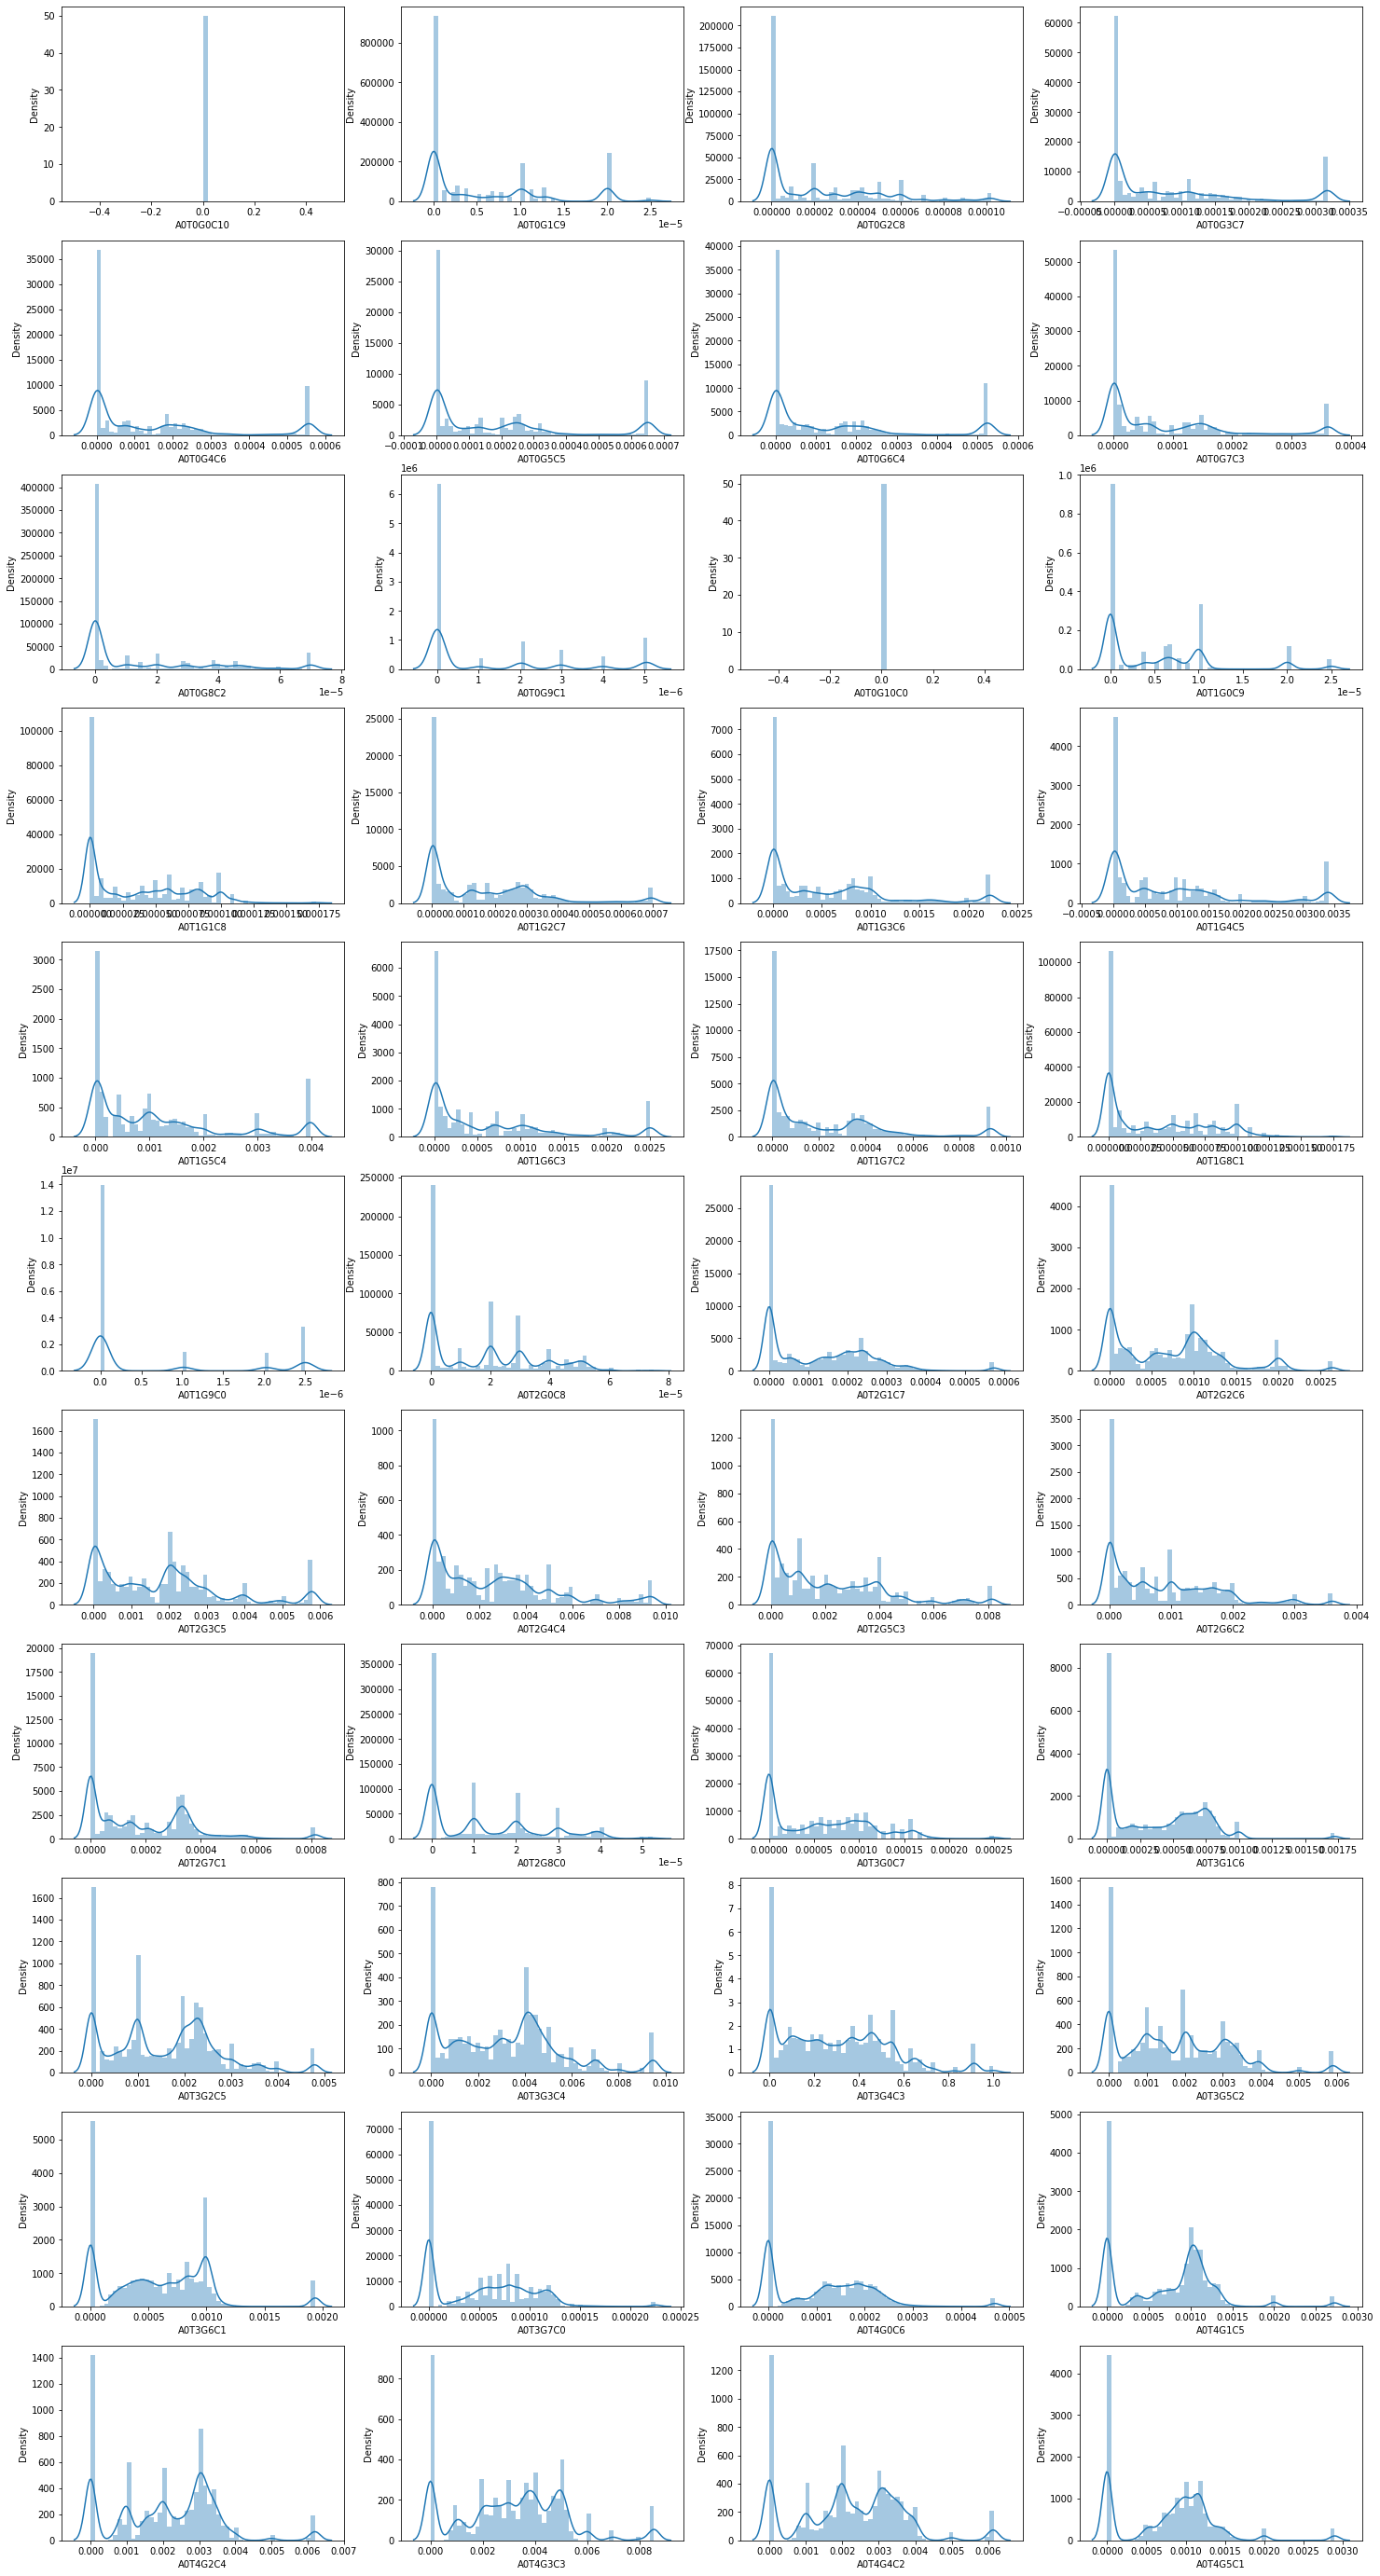

In [ ]:
 DistPlotDraw(TestDfScaled)

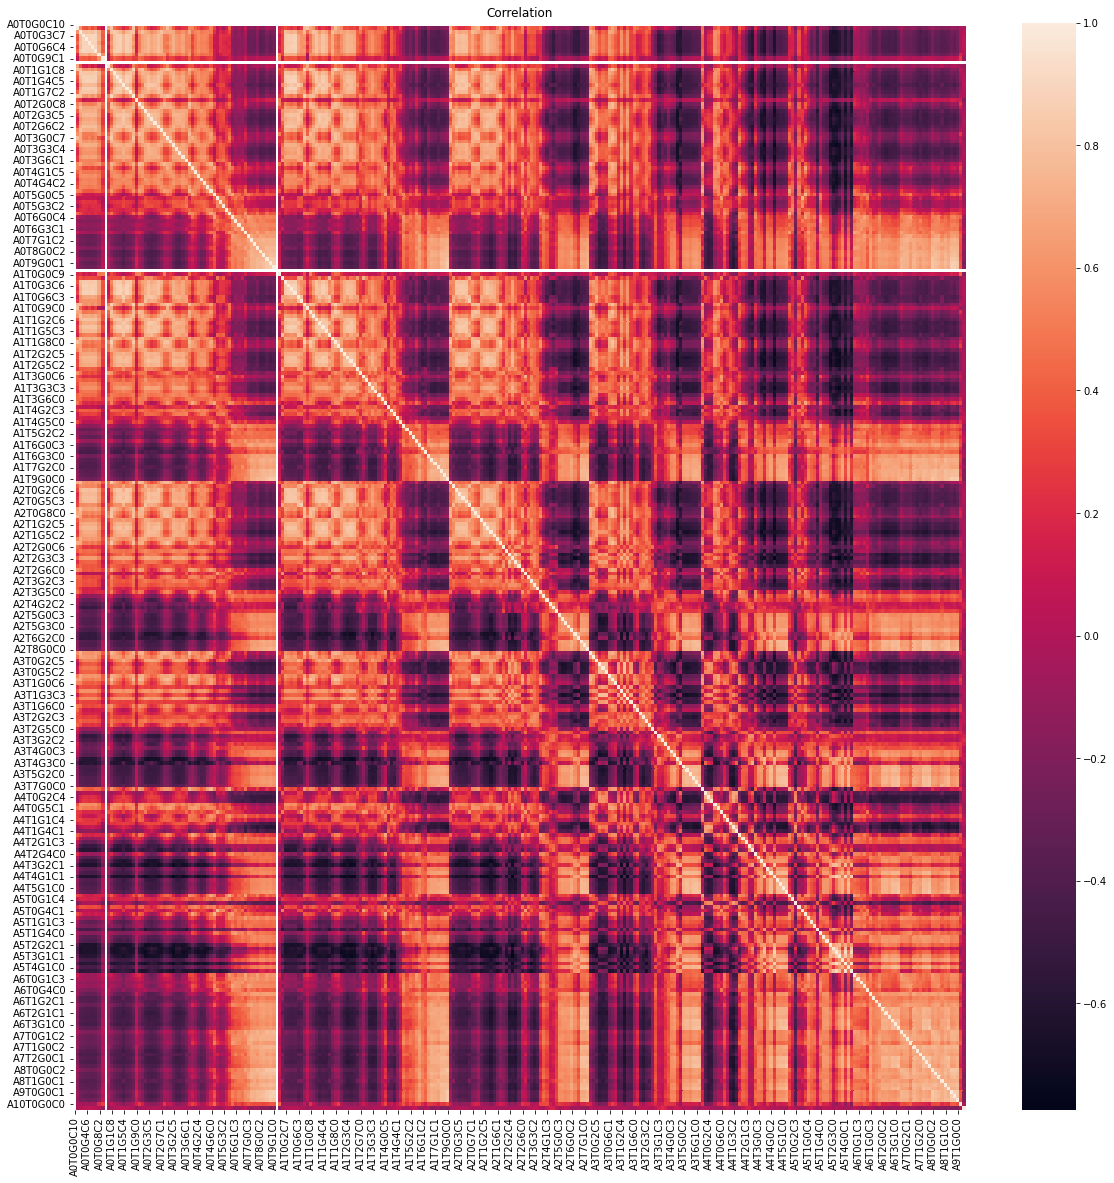

In [ ]:
plt.figure(figsize = (20,20))

sns.heatmap(TrainDf.corr())
plt.title('Correlation')
plt.show()

##PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
X_train.shape

(86795, 286)

In [ ]:
pca = PCA(n_components=100)
X_train_pca=pca.fit_transform(X_train)
X_val_pca=pca.fit_transform(X_val)
X_test_pca=pca.fit_transform(X_test)

print("Train Shape: {} {}".format(X_train_pca.shape, Y_train.shape))
print("Validation Shape: {} {}".format(X_val_pca.shape, Y_val.shape))



Train Shape: (86795, 100) (86795,)
Validation Shape: (37198, 100) (37198,)


In [ ]:
X_test.shape

(100000, 286)

In [ ]:
X_train_pca

array([[-1.41594625e+00, -9.44587843e-01, -7.06398850e-01, ...,
        -1.09222839e-02,  4.20108133e-02,  1.58156944e-02],
       [ 4.22022031e+00, -1.40668960e+00, -2.17701056e-01, ...,
        -2.68911034e-02, -1.70175873e-02, -4.93219802e-02],
       [ 2.52425788e+00, -8.90329302e-01, -1.51960929e+00, ...,
        -1.04552339e-01,  6.80652798e-02,  5.73140335e-02],
       ...,
       [-8.85304335e-01,  3.97009093e+00,  7.96338632e-01, ...,
        -1.53126302e-01,  2.14740447e-01, -1.60677712e-01],
       [-6.36101895e-01, -6.27124064e-01, -2.46824230e-01, ...,
        -1.67265002e-03,  1.55571858e-03, -7.21897521e-03],
       [-7.56161446e-01,  5.20703206e+00, -7.48556756e-01, ...,
         4.28554700e-02,  4.69034355e-02, -3.11593050e-02]])

##Classification Models

 Models Functions

In [ ]:
ModelFitTime={
    
}
ModelScore={
   
}
AccuracyScore={
    
}
PrecisionScore={
    
}
RecallScore={
    
}
f1Score={
    
}
AucScore={
    
}



ModelFitTimePca={
    
}
ModelScorePca={
   
}
AccuracyScorePca={
    
}

PrecisionScorePca={
    
}
RecallScorePca={
    
}
f1ScorePca={
    
}
AucScorePca={
    
}

##RoC
Y_pred_proba={
    
}
#for test dataset
Y_pred_test={
    
}

Y_pred_probaPca={
    
}
#for test dataset
Y_pred_testPca={
    
}
testPred={
    
}



In [ ]:
type(Y_pred_test)

numpy.ndarray

In [ ]:
X_train.shape,Y_train.shape,Y_val.shape

((99194, 286), (99194,), (24799,))

In [ ]:
X_test.shape

(100000, 286)

Classification->Logistic regression,svm,Random Forest,Decesion Tree,Knn,Naive Bais
Regression->Linear Regression,Lasso,Ridge,Elastic Net,polynomial Regression
Precsion,Recall,f1score,ROC
Area Under the Curve (AUC) score.

Classification Model Functions

In [ ]:
def ModelPerfomance(Y_val,Y_pred,Y_pred_proba,modelName):

     accScore=metrics.accuracy_score(Y_val,Y_pred)
     AccuracyScore[str(modelName)+'AccuracyScore']=accScore

   
     precision=metrics.precision_score(Y_val,Y_pred,average='micro')
     PrecisionScore[str(modelName)+'PrecisionScore']=precision

     recall=metrics.recall_score(Y_val,Y_pred,average='micro')
     RecallScore[str(modelName)+'RecallScore']=recall

     f1=metrics.f1_score(Y_val,Y_pred,average='micro')
     f1Score[str(modelName)+'f1Score']=f1


     aucScore = metrics.roc_auc_score(Y_val, Y_pred_proba,multi_class="ovr")

     AucScore[str(modelName)+'AUCScore']=aucScore
     
     cfMatrix=metrics.confusion_matrix(Y_val,Y_pred)
   
     print(str(modelName)+' Accuracy Score:',round((accScore*100),2),'%')
     print('')
     print(str(modelName)+' Precision Score:',round((precision*100),2),'%')
     print('')
     print(str(modelName)+' Recall Score:',round((recall*100),2),'%')
     print('')
     print(str(modelName)+' f1 Score:',round((f1*100),2),'%')
     print('')
     print(str(modelName)+' AUC Score:',round((aucScore*100),2),'%')
     print('')
     print(str(modelName)+' Confusion Matrix:')
     print('')
     print(cfMatrix)
     print(str(modelName)+' Associated HeatMap:')
     print('')
     plt.figure(figsize=(15,15))
     sns.heatmap(cfMatrix,annot=True,cmap='terrain',linewidths=0.2)
     plt.show()

     
    

def ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,modelName):

     accScore=metrics.accuracy_score(Y_val,Y_pred)
     AccuracyScorePca[str(modelName)+'AccuracyScore']=accScore

   
     precision=metrics.precision_score(Y_val,Y_pred,average='micro')
     PrecisionScorePca[str(modelName)+'PrecisionScore']=precision

     recall=metrics.recall_score(Y_val,Y_pred,average='micro')
     RecallScorePca[str(modelName)+'RecallScore']=recall

     f1=metrics.f1_score(Y_val,Y_pred,average='micro')
     f1ScorePca[str(modelName)+'f1Score']=f1


     aucScore = metrics.roc_auc_score(Y_val, Y_pred_proba,multi_class="ovr")
     AucScorePca[str(modelName)+'AUCScore']=aucScore
     
     cfMatrix=metrics.confusion_matrix(Y_val,Y_pred) 

     print(str(modelName)+' Accuracy Score:',round((accScore*100),2),'%')
     print('')
     print(str(modelName)+' Precision Score:',round((precision*100),2),'%')
     print('')
     print(str(modelName)+' Recall Score:',round((recall*100),2),'%')
     print('')
     print(str(modelName)+' f1 Score:',round((f1*100),2),'%')
     print('')
     print(str(modelName)+' AUC Score:',round((aucScore*100),2),'%')
     print('')
     print(str(modelName)+' Confusion Matrix:')
     print('')
     print(cfMatrix)
     print(str(modelName)+' Associated HeatMap:')
     print('')
     plt.figure(figsize=(15,15))
     sns.heatmap(cfMatrix,annot=True,cmap='terrain',linewidths=0.2)
     plt.show()

def LsRegression(c,pcaFlag):
  if pcaFlag==0:
     start=time.time()
     logreg = LogisticRegression(solver="liblinear",C=c)
     model=logreg.fit(X_train, Y_train)

     MscoreTrain=round((model.score(X_train,Y_train)*100),2)
     MscoreTest=round((model.score(X_val,Y_val)*100),2)

     Y_pred=model.predict(X_val)
     Y_pred_proba = model.predict_proba(X_val)
    

     Y_pred_test=model.predict(X_test)
     testPred=Y_pred_test
    #  Y_pred_proba.append(Y_pred_proba )
     
    #  Y_pred_test.append()

     end=time.time()
     ModelFitTime['LsRegressionFitTime']=(end-start)

     print('###################### Overall  Performance of Logistic Regression ##########################')
     print('')
     print('Logistic Regression Fit Time:',(end-start),'sec')
     print('')
     print('Logistic Regression Train Model  Score:',MscoreTrain,'%')
     print('')
     print('Logistic Regression Test Model Score:',MscoreTest,'%')
     print('')
     ModelPerfomance(Y_val,Y_pred,Y_pred_proba,'LogisticRegression')


     print('')

     

  else :

     start=time.time()
     logreg = LogisticRegression(solver="liblinear",C=c)
     model=logreg.fit(X_train_pca, Y_train)

     MscoreTrain=round((model.score(X_train_pca,Y_train)*100),2)
     MscoreTest=round((model.score(X_val_pca,Y_val)*100),2)


    #  ModelScorePca['LsRegressionScore']=Mscore

     Y_pred=model.predict(X_val_pca)
     Y_pred_proba = logreg.predict_proba(X_val_pca)
     Y_pred_test=model.predict(X_test_pca)
    
     Y_pred_probaPca['LsRegression']=Y_pred_proba 
     Y_pred_testPca['LsRegression']=Y_pred_test

     end=time.time()
     ModelFitTimePca['LsRegressionFitTime']=(end-start)

     print('###################### Overall  Performance of Logistic Regression ##########################')
     print('')
     print('Logistic Regression Fit Time:',(end-start),'sec')
     print('')
     print('Logistic Regression Train Model  Score:',MscoreTrain,'%')
     print('')
     print('Logistic Regression Test Model Score:',MscoreTest,'%')

     ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,'LogisticRegression')

     print('')

  return testPred

def SupportVector(c,pcaFlag):
  if pcaFlag==0:

     start=time.time()
     svmsvc = svm.SVC(kernel='linear',C=c,probability=True)
     model=svmsvc.fit(X_train, Y_train)

     MscoreTrain=round((model.score(X_train,Y_train)*100),2)  
     MscoreTest=round((model.score(X_val,Y_val)*100),2)  
     
    #  ModelScore['RfForest']=Mscore

     Y_pred=model.predict(X_val)
     Y_pred_proba = model.predict_proba(X_val)
     

     Y_pred_test=model.predict(X_test)
     testPred2=Y_pred_test

    #  Y_pred_proba['svm']=Y_pred_proba 
     


     end=time.time()
     ModelFitTime['svmFitTime']=(end-start)

     print('###################### Overall  Performance of SVM ##########################')
     print('')
     print('SVM Fit Time:',(end-start),'sec')
     print('')
     print('SVM Train Model  Score:',MscoreTrain,'%')
     print('')
     print('SVM Test Model Score:',MscoreTest,'%')

     ModelPerfomance(Y_val,Y_pred,Y_pred_proba,'SVM')

     print('')


  else:
     start=time.time()
     svmsvc = svm.SVC(kernel='linear',C=c,probability=True)
     model=svmsvc.fit(X_train_pca, Y_train)

     MscoreTrain=round((model.score(X_train_pca,Y_train)*100),2)  
     MscoreTest=round((model.score(X_val_pca,Y_val)*100),2)  
     
    #  ModelScore['RfForest']=Mscore

     Y_pred=model.predict(X_val_pca)
     Y_pred_proba = model.predict_proba(X_val_pca)
     Y_pred_test=model.predict(X_test_pca)

     Y_pred_probaPca['svm']=Y_pred_proba 
     Y_pred_testPca['svm']=Y_pred_test


     end=time.time()
     ModelFitTime['svmFitTime']=(end-start)

     print('###################### Overall  Performance of SVM ##########################')
     print('')
     print('SVM Fit Time:',(end-start),'sec')
     print('')
     print('SVM Train Model  Score:',MscoreTrain,'%')
     print('')
     print('SVM Test Model Score:',MscoreTest,'%')

     ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,'SVM')

     print('')

  # return testPred2
  
       
def RfForest(pcaFlag):
 if pcaFlag==0:

     start=time.time()
     rfc=RandomForestClassifier()
     model=rfc.fit(X_train, Y_train)
     
     MscoreTrain=round((model.score(X_train,Y_train)*100),2)  
     MscoreTest=round((model.score(X_val,Y_val)*100),2)  
     
    #  ModelScore['RfForest']=Mscore

     Y_pred=model.predict(X_val)
     Y_pred_proba = model.predict_proba(X_val)
    #  Y_pred_test=model.predict(X_test)

     Y_pred_test=model.predict(X_test)
     testPred3=Y_pred_test

    #  Y_pred_probaPca['RfForest']=Y_pred_proba 
    #  Y_pred_testPca['RfForest']=Y_pred_test


     end=time.time()
     ModelFitTime['RFForestFitTime']=(end-start)

     print('###################### Overall  Performance of Random Forest ##########################')
     print('')
     print('Random Forest Fit Time:',(end-start),'sec')
     print('')
     print('Random ForestTrain Model  Score:',MscoreTrain,'%')
     print('')
     print('Random Forest Test Model Score:',MscoreTest,'%')

     ModelPerfomance(Y_val,Y_pred,Y_pred_proba,'RfForest')

     print('')

 else:
   
     start=time.time()
     rfc=RandomForestClassifier()
     model=rfc.fit(X_train_pca, Y_train)
     
     MscoreTrain=round((model.score(X_train_pca,Y_train)*100),2)  
     MscoreTest=round((model.score(X_val_pca,Y_val)*100),2)  
     
    #  ModelScore['RfForest']=Mscore

     Y_pred=model.predict(X_val_pca)
     Y_pred_proba = model.predict_proba(X_val_pca)
     Y_pred_test=model.predict(X_test_pca)
     
     Y_pred_test=model.predict(X_test)
     testPred3=Y_pred_test

    #  Y_pred_probaPca['RfForest']=Y_pred_proba 
    #  Y_pred_testPca['RfForest']=Y_pred_test


     end=time.time()
     ModelFitTime['RFForestFitTime']=(end-start)

     print('###################### Overall  Performance of Random Forest ##########################')
     print('')
     print('Random Forest Fit Time:',(end-start),'sec')
     print('')
     print('Random Forest Train Model  Score:',MscoreTrain,'%')
     print('')
     print('Random Forest Test Model Score:',MscoreTest,'%')

     ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,'RfForest')

     print('')
 
 return testPred3

def DsTree(pcaFlag):
 if pcaFlag==0:

     start=time.time()
     dt=DecisionTreeClassifier()
     model=dt.fit(X_train, Y_train)

     MscoreTrain=round((model.score(X_train,Y_train)*100),2)  
     MscoreTest=round((model.score(X_val,Y_val)*100),2)  
     
   

     Y_pred=model.predict(X_val)
     Y_pred_proba = model.predict_proba(X_val)
    #  Y_pred_test=model.predict(X_test)

    #  Y_pred_proba['Ds']=Y_pred_proba 
    #  Y_pred_testP['svm']=Y_pred_test

     Y_pred_test=model.predict(X_test)
     testPred4=Y_pred_test


     end=time.time()
     ModelFitTime['DsFitTime']=(end-start)

     print('###################### Overall  Performance of DecisionTree ##########################')
     print('')
     print('DS Fit Time:',(end-start),'sec')
     print('')
     print('DS Train Model  Score:',MscoreTrain,'%')
     print('')
     print('DS Test Model Score:',MscoreTest,'%')

     ModelPerfomance(Y_val,Y_pred,Y_pred_proba,'DS')

     print('')
     print('######################  DecisionTree Ploting ##########################')
     plt.figure(figsize=(15,15))
     clf_dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train)
     plot_tree(clf_dt, filled=True, fontsize=10)
     plt.show()

 else:
   
     start=time.time()
     dt=DecisionTreeClassifier()
     model=dt.fit(X_train_pca, Y_train)

     MscoreTrain=round((model.score(X_train_pca,Y_train)*100),2)  
     MscoreTest=round((model.score(X_val_pca,Y_val)*100),2)  
     
   

     Y_pred=model.predict(X_val_pca)
     Y_pred_proba = model.predict_proba(X_val_pca)
    #  Y_pred_test=model.predict(X_test_pca)

     Y_pred_probaPca['Ds']=Y_pred_proba 
    #  Y_pred_testPca['DS']=Y_pred_test


     end=time.time()
     ModelFitTime['DsFitTime']=(end-start)

     print('###################### Overall  Performance of DecisionTree ##########################')
     print('')
     print('DS Fit Time:',(end-start),'sec')
     print('')
     print('DS Train Model  Score:',MscoreTrain,'%')
     print('')
     print('DS Test Model Score:',MscoreTest,'%')

     ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,'DS')

     print('######################  DecisionTree Ploting ##########################')
     plt.figure(figsize=(15,15))
     clf_dt = DecisionTreeClassifier(max_depth = 2).fit(X_train_pca, Y_train)
     plot_tree(clf_dt, filled=True, fontsize=10)
     plt.show()

 return testPred4

def KNN(pcaFlag):
 if pcaFlag==0:

     start=time.time()
     KNN=KNeighborsClassifier()
     model=KNN.fit(X_train, Y_train)

     MscoreTrain=round((model.score(X_train,Y_train)*100),2)
     MscoreTest=round((model.score(X_val,Y_val)*100),2)


    #  ModelScorePca['LsRegressionScore']=Mscore

     Y_pred=model.predict(X_val)
     Y_pred_proba = model.predict_proba(X_val)
    #  Y_pred_test=model.predict(X_test)
    
    #  Y_pred_proba['KNN']=Y_pred_proba 
    #  Y_pred_testPca['KNN']=Y_pred_test
     
     Y_pred_test=model.predict(X_test)
     testPred5=Y_pred_test

     end=time.time()
     ModelFitTime['KNNFitTime']=(end-start)

     print('###################### Overall  Performance of KNN ##########################')
     print('')
     print('KNN Fit Time:',(end-start),'sec')
     print('')
     print('KNN Train Model  Score:',MscoreTrain,'%')
     print('')
     print('KNN Test Model Score:',MscoreTest,'%')

     ModelPerfomance(Y_val,Y_pred,Y_pred_proba,'KNN')

     print('')

 else:
   
     start=time.time()
     KNN=KNeighborsClassifier()
     model=KNN.fit(X_train_pca, Y_train)

     MscoreTrain=round((model.score(X_train_pca,Y_train)*100),2)
     MscoreTest=round((model.score(X_val_pca,Y_val)*100),2)


    #  ModelScorePca['LsRegressionScore']=Mscore

     Y_pred=model.predict(X_val_pca)
     Y_pred_proba = model.predict_proba(X_val_pca)
     Y_pred_test=model.predict(X_test_pca)
    
     Y_pred_probaPca['KNN']=Y_pred_proba 
     Y_pred_testPca['KNN']=Y_pred_test

     end=time.time()
     ModelFitTimePca['KNNFitTime']=(end-start)

     print('###################### Overall  Performance of KNN ##########################')
     print('')
     print('KNN Fit Time:',(end-start),'sec')
     print('')
     print('KNN Train Model  Score:',MscoreTrain,'%')
     print('')
     print('KNN Test Model Score:',MscoreTest,'%')

     ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,'KNN')

     print('')

 return testPred5   

def NbBayes(pcaFlag):
 if pcaFlag==0:

     start=time.time()
    
     NB=GaussianNB()
     model=NB.fit(X_train, Y_train)

     MscoreTrain=round((model.score(X_train,Y_train)*100),2)
     MscoreTest=round((model.score(X_val,Y_val)*100),2)


    #  ModelScorePca['LsRegressionScore']=Mscore

     Y_pred=model.predict(X_val)
     Y_pred_proba = model.predict_proba(X_val)
    #  Y_pred_test=model.predict(X_test)
     Y_pred_test=model.predict(X_test)
     testPred6=Y_pred_test
    #  Y_pred_probaPca['NB']=Y_pred_proba 
    #  Y_pred_testPca['NB']=Y_pred_test

     end=time.time()
     ModelFitTime['NBFitTime']=(end-start)

     print('###################### Overall  Performance of NB ##########################')
     print('')
     print('NB Fit Time:',(end-start),'sec')
     print('')
     print('NB Train Model  Score:',MscoreTrain,'%')
     print('')
     print('NB Test Model Score:',MscoreTest,'%')

     ModelPerfomance(Y_val,Y_pred,Y_pred_proba,'NB')

     print('')

 else:

     start=time.time()
    
     NB=GaussianNB()
     model=NB.fit(X_train_pca, Y_train)

     MscoreTrain=round((model.score(X_train_pca,Y_train)*100),2)
     MscoreTest=round((model.score(X_val_pca,Y_val)*100),2)


    #  ModelScorePca['LsRegressionScore']=Mscore

     Y_pred=model.predict(X_val_pca)
     Y_pred_proba = model.predict_proba(X_val_pca)
     Y_pred_test=model.predict(X_test_pca)
    
     Y_pred_probaPca['NB']=Y_pred_proba 
     Y_pred_testPca['NB']=Y_pred_test

     end=time.time()
     ModelFitTimePca['NBFitTime']=(end-start)

     print('###################### Overall  Performance of NB ##########################')
     print('')
     print('NB Fit Time:',(end-start),'sec')
     print('')
     print('NB Train Model  Score:',MscoreTrain,'%')
     print('')
     print('NB Test Model Score:',MscoreTest,'%')

     ModelPerfomanceWithPca(Y_val,Y_pred,Y_pred_proba,'NB')

     print('')

 return testPred6


##Logistic Regression

With PCA 

C=0.2

###################### Overall  Performance of Logistic Regression ##########################

Logistic Regression Fit Time: 86.93639063835144 sec

Logistic Regression Train Model  Score: 87.7 %

Logistic Regression Test Model Score: 78.78 %
LogisticRegression Accuracy Score: 78.78 %

LogisticRegression Precision Score: 78.78 %

LogisticRegression Recall Score: 78.78 %

LogisticRegression f1 Score: 78.78 %

LogisticRegression AUC Score: 95.29 %

LogisticRegression Confusion Matrix:

[[2855    8  457   19   27    2   74   22  228   65]
 [  80 3166   69    5    0    0   27  349    9   36]
 [ 411   23 2801   16    2    0   50   31   57  321]
 [ 122    7   85 2312  776   28  344    1    3   11]
 [ 138    1   91  258 2915   20  228    6    1   27]
 [  54    2   59   60   17 3503   27    0    0    4]
 [ 151    7  104  769  108  284 2280    2    1   11]
 [ 150  119   62    6    1    0   17 3294   28   47]
 [ 251   12  140   12    4    0   13   27 3099  167]
 [ 243   18  151   13   13    0   2

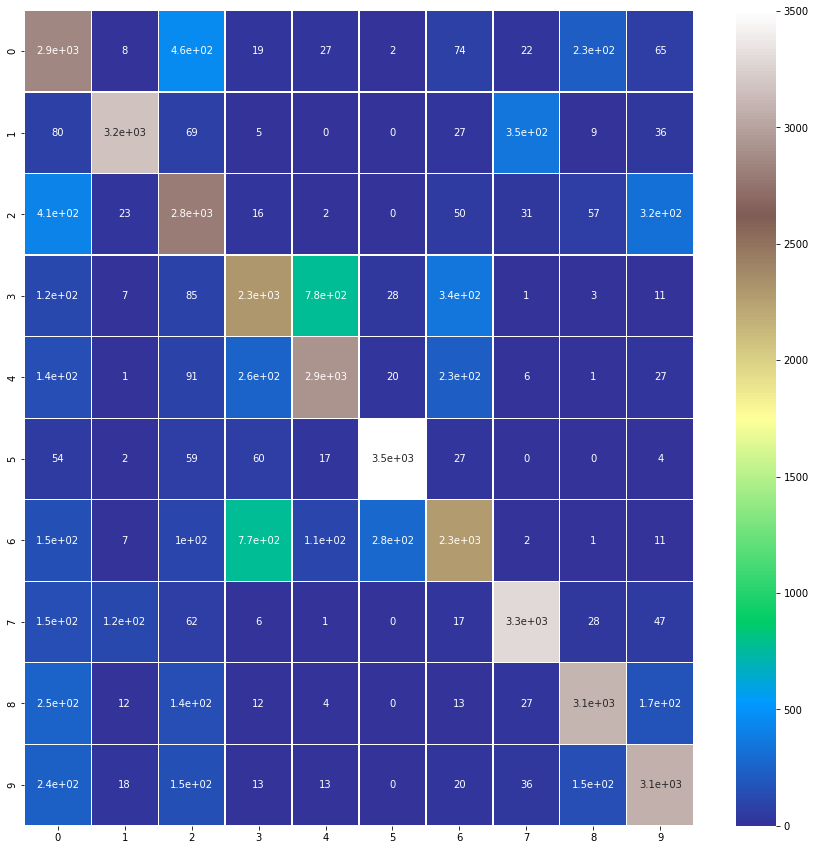

In [ ]:
LsRegression(0.2,pcaFlag=1)

C=1

###################### Overall  Performance of Logistic Regression ##########################

Logistic Regression Fit Time: 99.72273182868958 sec

Logistic Regression Train Model  Score: 88.14 %

Logistic Regression Test Model Score: 81.39 %
LogisticRegression Accuracy Score: 81.39 %

LogisticRegression Precision Score: 81.39 %

LogisticRegression Recall Score: 81.39 %

LogisticRegression f1 Score: 81.39 %

LogisticRegression AUC Score: 96.25 %

LogisticRegression Confusion Matrix:

[[2797    4  504   15   27    1   78   21  225   85]
 [  64 3339   65    1    1    0   11  217   11   32]
 [ 242   28 3016    8    4    0   16   36   59  303]
 [ 138    1   69 2347  794   25  290    1    3   21]
 [ 130    3   79  322 2956   22  148    2    0   23]
 [  62    1   50   42   12 3511   46    0    0    2]
 [ 146    4   63  473   73  145 2796    2    0   15]
 [ 131  152   58    4    1    0   23 3279   32   44]
 [ 247    5  110   12    5    0   22   31 3139  154]
 [ 238   22  135    4   10    0   

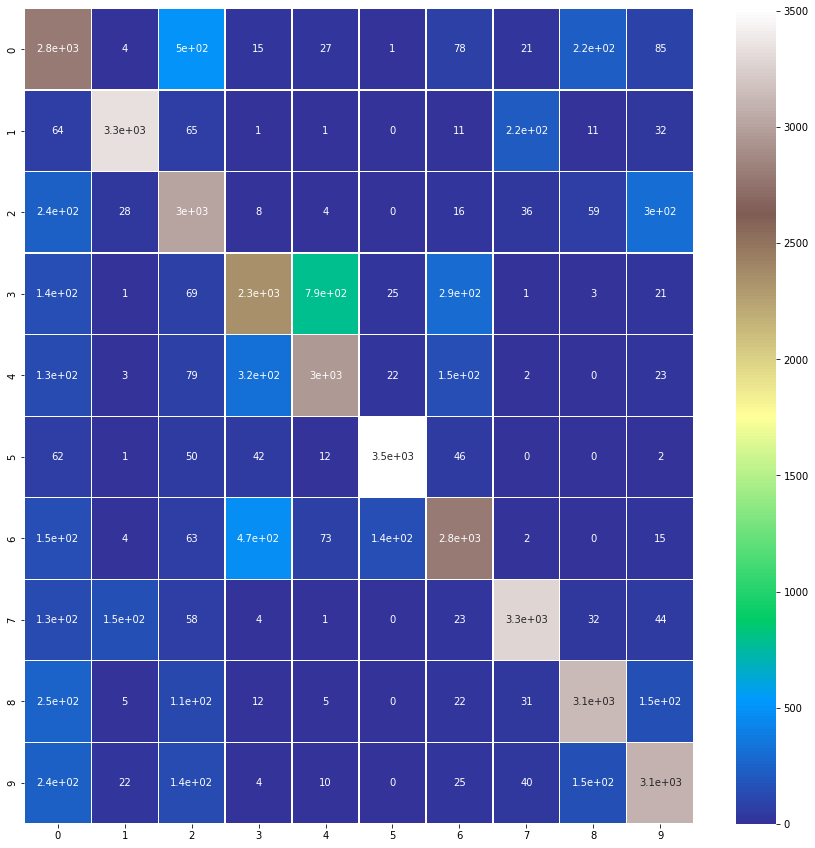

In [ ]:
LsRegression(1,pcaFlag=1)

C=10

###################### Overall  Performance of Logistic Regression ##########################

Logistic Regression Fit Time: 101.7199296951294 sec

Logistic Regression Train Model  Score: 88.31 %

Logistic Regression Test Model Score: 81.42 %
LogisticRegression Accuracy Score: 81.42 %

LogisticRegression Precision Score: 81.42 %

LogisticRegression Recall Score: 81.42 %

LogisticRegression f1 Score: 81.42 %

LogisticRegression AUC Score: 96.29 %

LogisticRegression Confusion Matrix:

[[2772    6  540   15   25    1   83   22  209   84]
 [  65 3345   66    1    1    0   12  208   11   32]
 [ 240   29 3016    6    4    0   18   35   61  303]
 [ 135    1   68 2350  791   27  291    1    3   22]
 [ 133    1   79  314 2959   23  152    1    0   23]
 [  58    1   51   33   11 3532   38    0    0    2]
 [ 146    4   65  476   76  130 2803    2    0   15]
 [ 134  152   59    3    1    0   23 3277   31   44]
 [ 246    6  110   11    5    0   24   32 3139  152]
 [ 236   22  138    4   10    0   

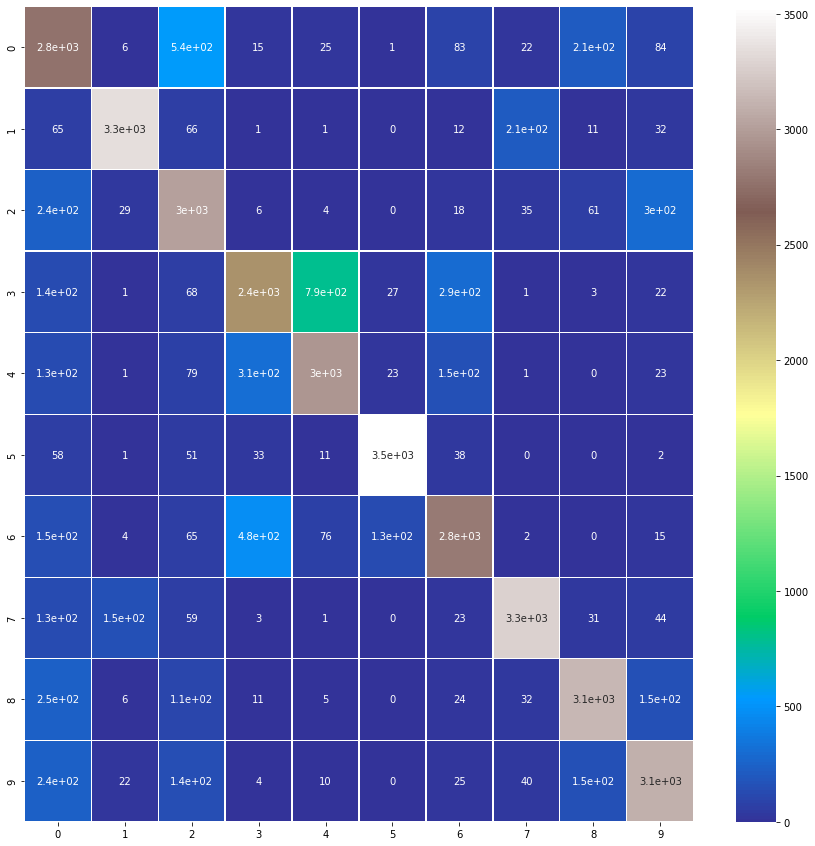

In [ ]:
LsRegression(10,pcaFlag=1)

Without PCA 

C=0.2

###################### Overall  Performance of Logistic Regression ##########################

Logistic Regression Fit Time: 107.77143335342407 sec

Logistic Regression Train Model  Score: 90.12 %

Logistic Regression Test Model Score: 89.4 %

LogisticRegression Accuracy Score: 89.4 %

LogisticRegression Precision Score: 89.4 %

LogisticRegression Recall Score: 89.4 %

LogisticRegression f1 Score: 89.4 %

LogisticRegression AUC Score: 98.82 %

LogisticRegression Confusion Matrix:

[[3418   12   48   30   34    4   47   12  106   46]
 [   9 3537   30    1    2    0    2  134    9   17]
 [  41   33 3343    8    7    1   11   38   85  145]
 [  46    2   10 3057  364   45  152    4    6    3]
 [  54    1   13  366 3092   30  112    2    8    7]
 [  11    1    2   33   10 3636   32    1    0    0]
 [  39    4   11  399  101  103 3044    4    4    8]
 [   8   88   32    2    0    1    0 3517   32   44]
 [ 104   18   74    4   21    1   15   29 3357  102]
 [  50   24  164   10   10    0   13 

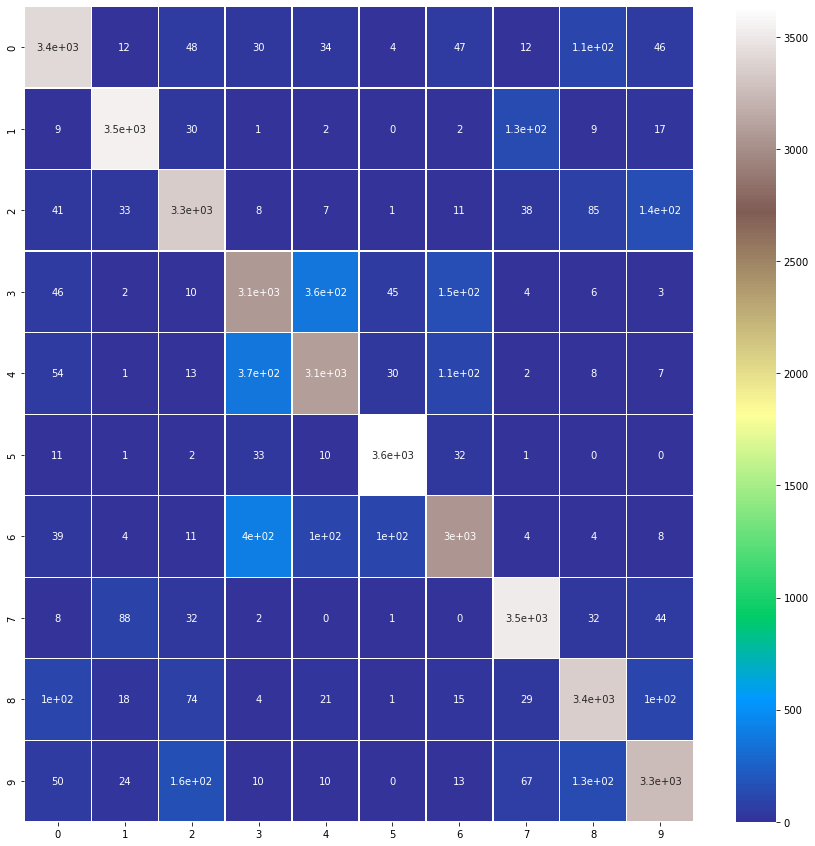

In [ ]:
testPred=LsRegression(0.2,pcaFlag=0)

C=1

###################### Overall  Performance of Logistic Regression ##########################

Logistic Regression Fit Time: 148.99487137794495 sec

Logistic Regression Train Model  Score: 90.46 %

Logistic Regression Test Model Score: 89.79 %

LogisticRegression Accuracy Score: 89.79 %

LogisticRegression Precision Score: 89.79 %

LogisticRegression Recall Score: 89.79 %

LogisticRegression f1 Score: 89.79 %

LogisticRegression AUC Score: 98.89 %

LogisticRegression Confusion Matrix:

[[3425    8   44   25   39    4   51    7  107   47]
 [  10 3563   28    1    2    0    2  112    7   16]
 [  41   29 3365    9    5    1   10   35   80  137]
 [  42    2    9 3061  361   40  161    1    8    4]
 [  53    2   11  354 3104   28  113    2    7   11]
 [   6    0    2   26   11 3655   23    2    0    1]
 [  40    5   13  379  107   85 3075    3    4    6]
 [   8   87   31    3    0    1    2 3520   29   43]
 [ 103   16   75    3   21    0   14   29 3363  101]
 [  56   22  152   11   15    0 

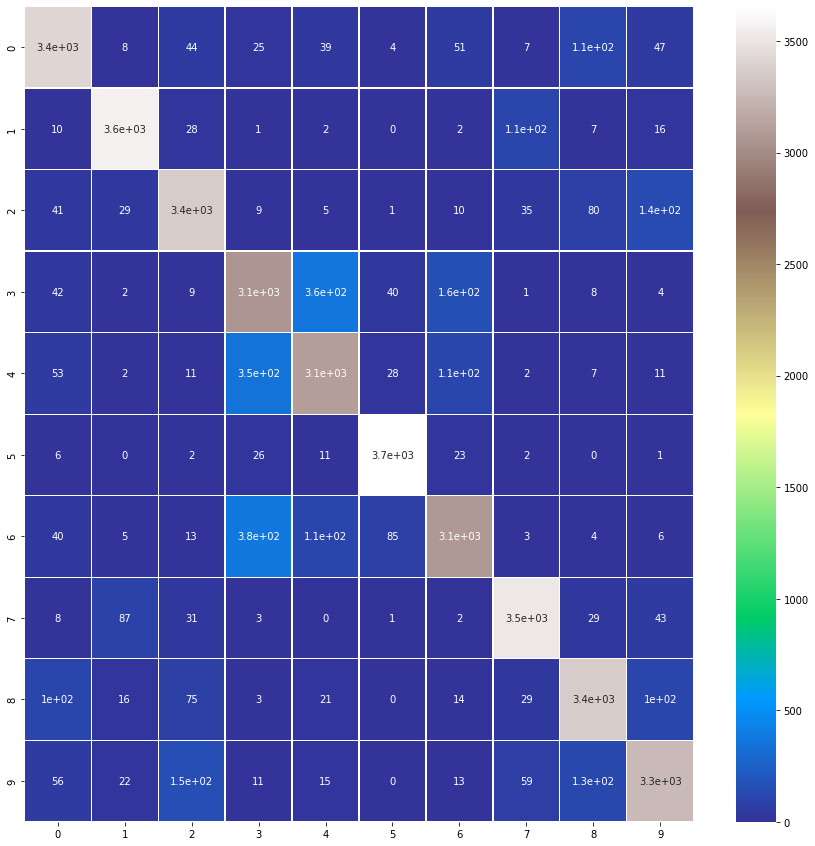

In [ ]:
testPred=LsRegression(1,pcaFlag=0)

C=10

###################### Overall  Performance of Logistic Regression ##########################

Logistic Regression Fit Time: 176.4421820640564 sec

Logistic Regression Train Model  Score: 90.73 %

Logistic Regression Test Model Score: 90.03 %

LogisticRegression Accuracy Score: 90.03 %

LogisticRegression Precision Score: 90.03 %

LogisticRegression Recall Score: 90.03 %

LogisticRegression f1 Score: 90.03 %

LogisticRegression AUC Score: 98.92 %

LogisticRegression Confusion Matrix:

[[3440    9   42   24   41    3   50    5   99   44]
 [   9 3587   26    1    2    0    1   95    7   13]
 [  42   33 3375    8    7    1    8   29   78  131]
 [  49    2   10 3062  352   34  168    1    7    4]
 [  52    1   12  348 3112   24  115    2    8   11]
 [   7    1    2   29   11 3649   25    1    0    1]
 [  39    5   14  347  108   84 3106    3    4    7]
 [   9   85   37    3    0    1    2 3517   28   42]
 [ 103   13   74    3   21    0   14   29 3364  104]
 [  55   17  140   12   16    0  

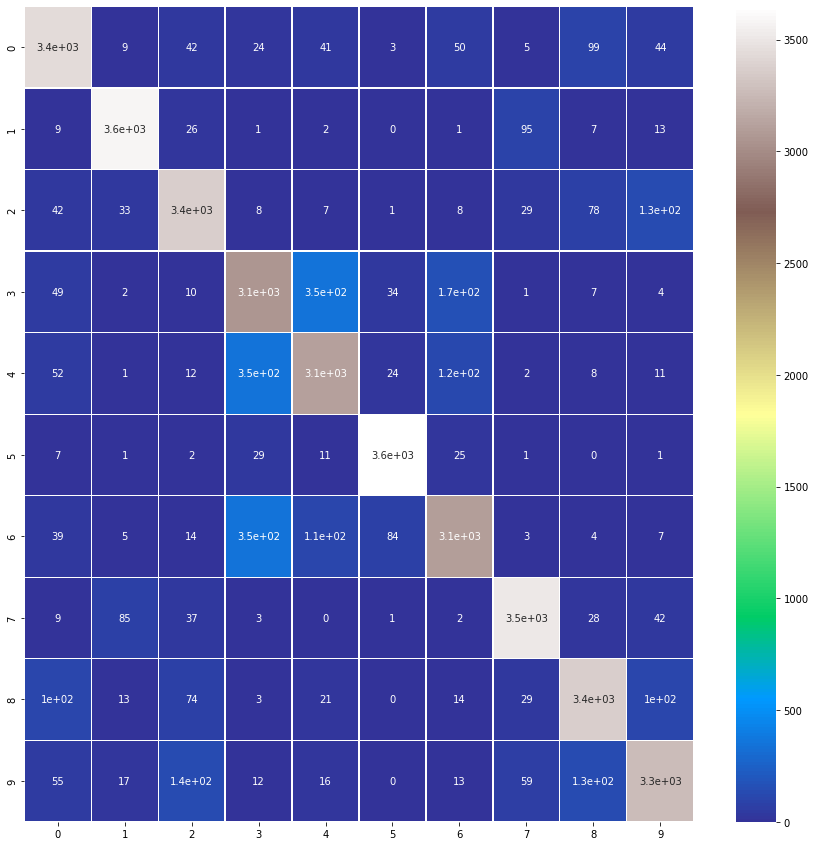

In [ ]:
testPred=LsRegression(10,pcaFlag=0)

##Support Vector Machine 

With PCA and C=1

###################### Overall  Performance of SVM ##########################

SVM Fit Time: 1610.001273393631 sec

SVM Train Model  Score: 92.13 %

SVM Test Model Score: 82.02 %
SVM Accuracy Score: 82.02 %

SVM Precision Score: 82.02 %

SVM Recall Score: 82.02 %

SVM f1 Score: 82.02 %

SVM AUC Score: 96.93 %

SVM Confusion Matrix:

[[1652    2 1586    6   24    3    2   43  398   41]
 [  82 3288   41    0    0    0    0  286    7   37]
 [ 288   25 3163    0    3    0    0   73   58  102]
 [  37    0    8 3153  301   41  129   19    1    0]
 [  42    0   15  370 3148   38   49   23    0    0]
 [   0    0    2   25   17 3564  114    4    0    0]
 [  13    0    6  214   85  128 3252   19    0    0]
 [ 164  104   26    0    0    0    0 3348   26   56]
 [ 310    7  120    1    3    0    0   74 2913  297]
 [ 316   15  149    0    4    0    0   79  132 3027]]
SVM Associated HeatMap:



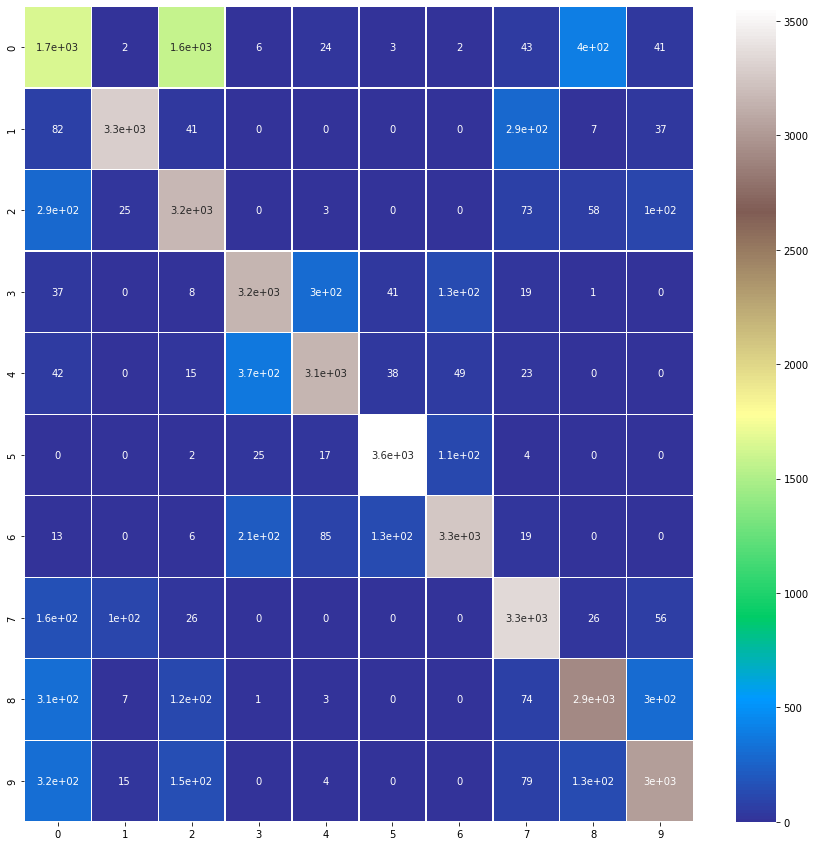

In [ ]:
SupportVector(1,pcaFlag=1)

Without PCA and C=1

###################### Overall  Performance of SVM ##########################

SVM Fit Time: 2484.583925962448 sec

SVM Train Model  Score: 95.02 %

SVM Test Model Score: 93.3 %
SVM Accuracy Score: 93.3 %

SVM Precision Score: 93.3 %

SVM Recall Score: 93.3 %

SVM f1 Score: 93.3 %

SVM AUC Score: 99.56 %

SVM Confusion Matrix:

[[3612    5   21   13   14    4    4    3   57   24]
 [   5 3604   17    0    0    0    0  107    3    5]
 [  23   25 3458    2    1    1    1   30   60  111]
 [  33    2    2 3313  211   20  104    0    2    2]
 [  20    1    4  278 3292   17   66    0    4    3]
 [   3    0    0   22    6 3636   56    3    0    0]
 [  17    0    0  138   45   53 3454    3    2    5]
 [   7   88   38    0    1    0    0 3556    9   25]
 [  85    8   66    3    5    0    0   24 3439   95]
 [  51   16  147    7    3    0    0   34  121 3343]]
SVM Associated HeatMap:



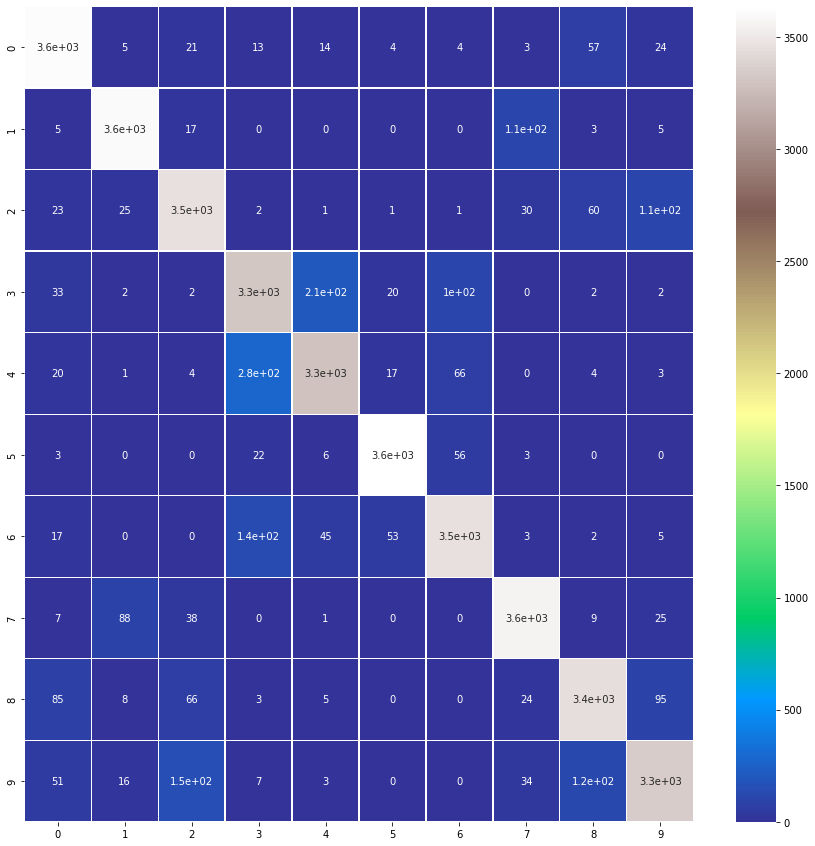

In [ ]:
testPred2=SupportVector(1,pcaFlag=0)

##Random Forest 

With PCA

###################### Overall  Performance of Random Forest ##########################

Random Forest Fit Time: 129.8694920539856 sec

Random Forest Train Model  Score: 100.0 %

Random Forest Test Model Score: 84.71 %
RfForest Accuracy Score: 84.71 %

RfForest Precision Score: 84.71 %

RfForest Recall Score: 84.71 %

RfForest f1 Score: 84.71 %

RfForest AUC Score: 98.36 %

RfForest Confusion Matrix:

[[3321    3   67   34   35    0    4   11  155  127]
 [  41 3363   34    1    4    0    0  227    9   62]
 [ 247  377 2648   15   37    0    0   42   55  291]
 [  34    1    8 2976  449   21  133    1    1   65]
 [  40    0    7  412 3040   15   72    1    3   95]
 [   3    1    2   61   24 3525  100    0    0   10]
 [  21    2    5  221  103  104 3233    2    3   23]
 [  74  157   32    8    7    0    1 3327   26   92]
 [ 419    7   59    9   14    1    3   21 2995  197]
 [ 303   17  112   12   37    0    0   43  114 3084]]
RfForest Associated HeatMap:



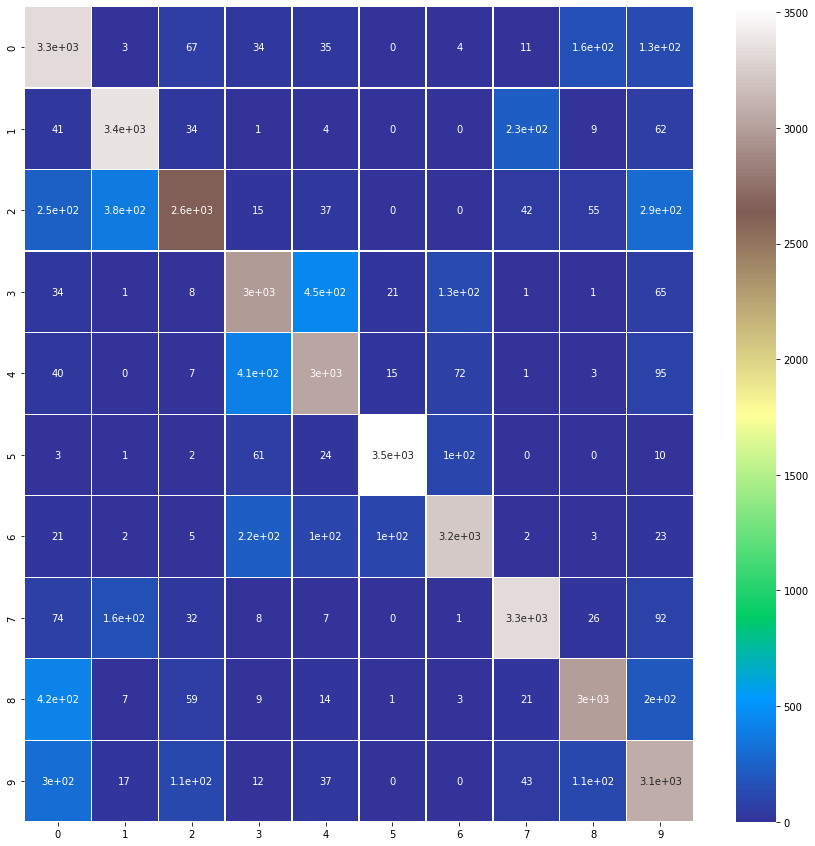

In [ ]:
RfForest(pcaFlag=1)

Without PCA

###################### Overall  Performance of Random Forest ##########################

Random Forest Fit Time: 89.37416338920593 sec

Random ForestTrain Model  Score: 100.0 %

Random Forest Test Model Score: 96.4 %
RfForest Accuracy Score: 96.4 %

RfForest Precision Score: 96.4 %

RfForest Recall Score: 96.4 %

RfForest f1 Score: 96.4 %

RfForest AUC Score: 99.87 %

RfForest Confusion Matrix:

[[3638    5   16   22   17   10    8    3   28   10]
 [   1 3641   15    1    0    0    0   72    5    6]
 [  14   13 3557    2    2    3    4   24   38   55]
 [  13    2    1 3524   67   26   46    4    4    2]
 [  13    0    5   59 3528   28   37    1    8    6]
 [   1    1    0    7    5 3687   23    2    0    0]
 [  10    1    1   54   40   51 3552    2    4    2]
 [   2   62   18    1    0    1    0 3607   16   17]
 [  20    7   26    2    6    4    2   24 3594   40]
 [  21    7   56    4    5    0    2   39   56 3532]]
RfForest Associated HeatMap:



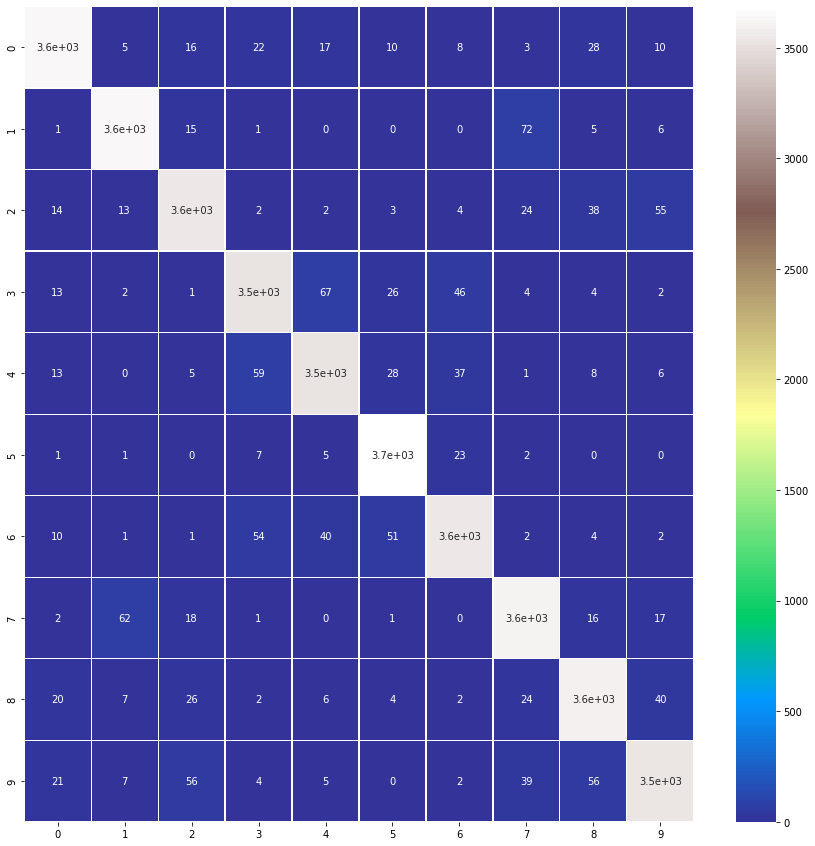

In [ ]:
testPred3=RfForest(pcaFlag=0)

##Decesion Tree

With PCA

###################### Overall  Performance of DecisionTree ##########################

DS Fit Time: 19.61154270172119 sec

DS Train Model  Score: 100.0 %

DS Test Model Score: 81.95 %
DS Accuracy Score: 81.95 %

DS Precision Score: 81.95 %

DS Recall Score: 81.95 %

DS f1 Score: 81.95 %

DS AUC Score: 89.96 %

DS Confusion Matrix:

[[3095    3   40   35   49    5   11   11  286  222]
 [ 113 3033   35    1    2    1    0  223   27  306]
 [ 205   74 2845    3    6    1    4   68  105  401]
 [  27    7   10 2489  912   54  183    1    4    2]
 [  51    1   12  484 2920   44  154    2    7   10]
 [   3    1    2   46   38 3498  136    0    0    2]
 [  15    0    5  175  152  182 3179    1    2    6]
 [ 127  148   69    1   37    0    3 3243   34   62]
 [ 191   13  122    5    7    1    4   28 3134  220]
 [ 195   20  178    4   23    1    3   57  194 3047]]
DS Associated HeatMap:



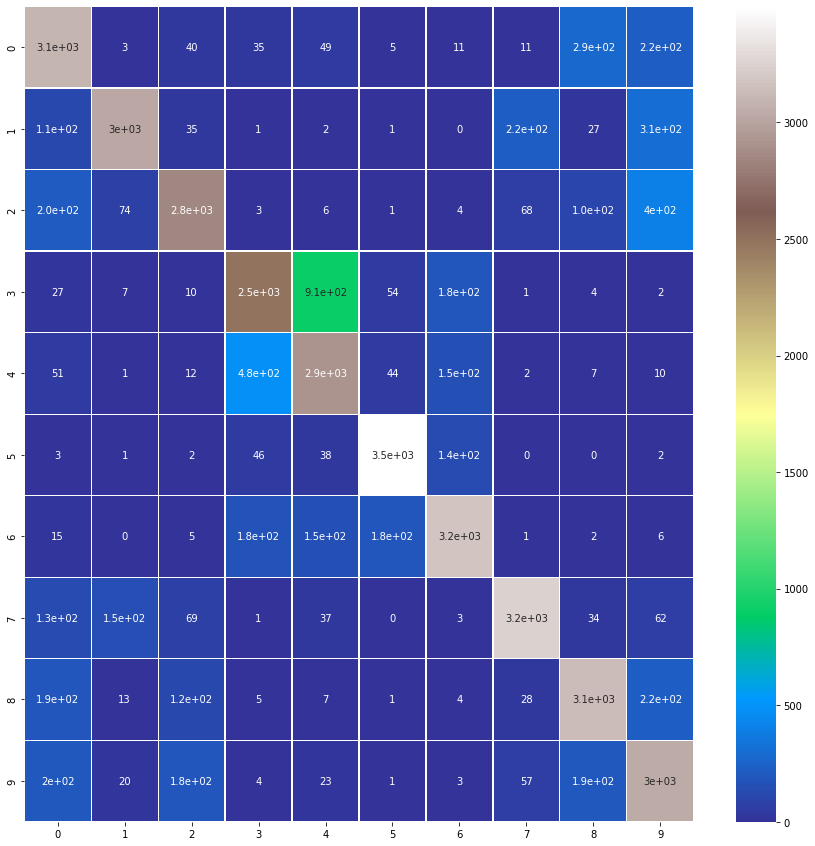

######################  DecisionTree Ploting ##########################


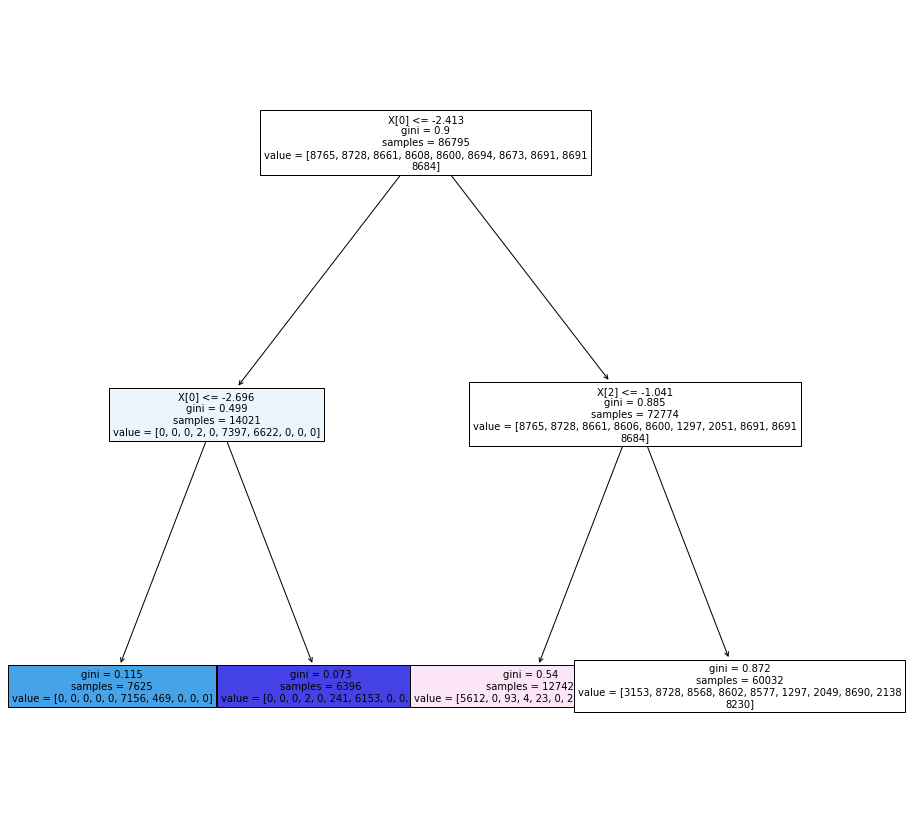

In [ ]:
DsTree(pcaFlag=1)

Without PCA

###################### Overall  Performance of DecisionTree ##########################

DS Fit Time: 22.362722873687744 sec

DS Train Model  Score: 100.0 %

DS Test Model Score: 88.5 %
DS Accuracy Score: 88.5 %

DS Precision Score: 88.5 %

DS Recall Score: 88.5 %

DS f1 Score: 88.5 %

DS AUC Score: 93.61 %

DS Confusion Matrix:

[[3351   15   57   60   54   21   25   27   86   61]
 [  23 3400   59   10    6    0    5  158   34   46]
 [  59   53 3226   20   17    3    6   70  126  132]
 [  45    4   12 3191  226   64  111    5   23    8]
 [  61    5   15  240 3152   53  107   12   22   18]
 [  21    0    8   57   48 3473  106    2    4    7]
 [  39    2    7  113  100  102 3323    8   12   11]
 [  23  146   66    6   10    3    3 3338   48   81]
 [  71   30  100    8   30    6    9   57 3280  134]
 [  57   50  179   12   18    2    9   91  116 3188]]
DS Associated HeatMap:



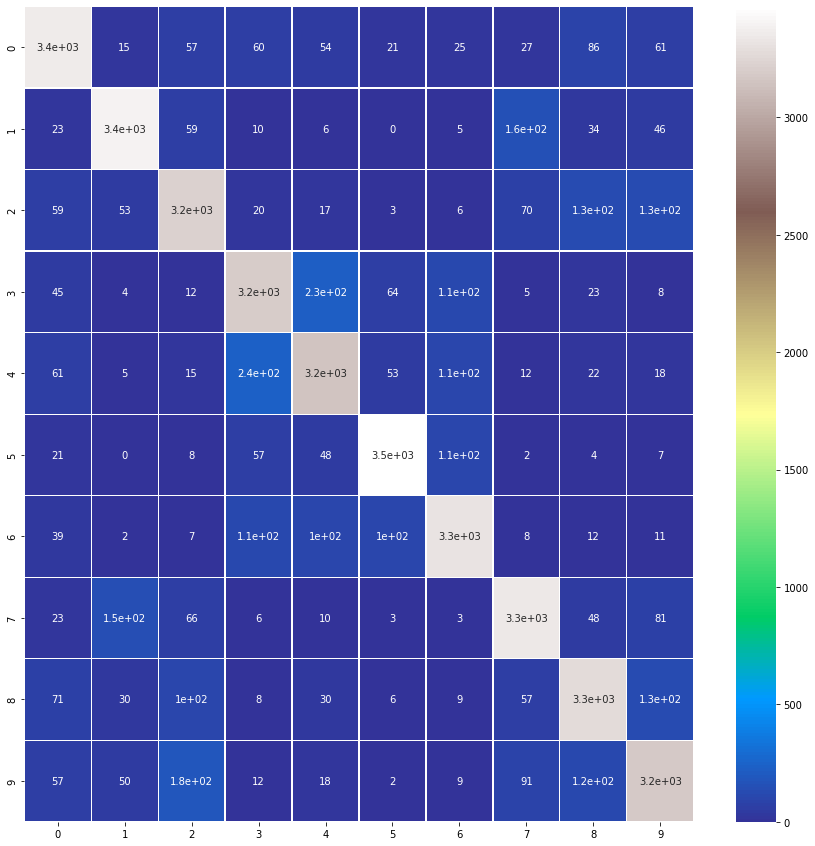


######################  DecisionTree Ploting ##########################


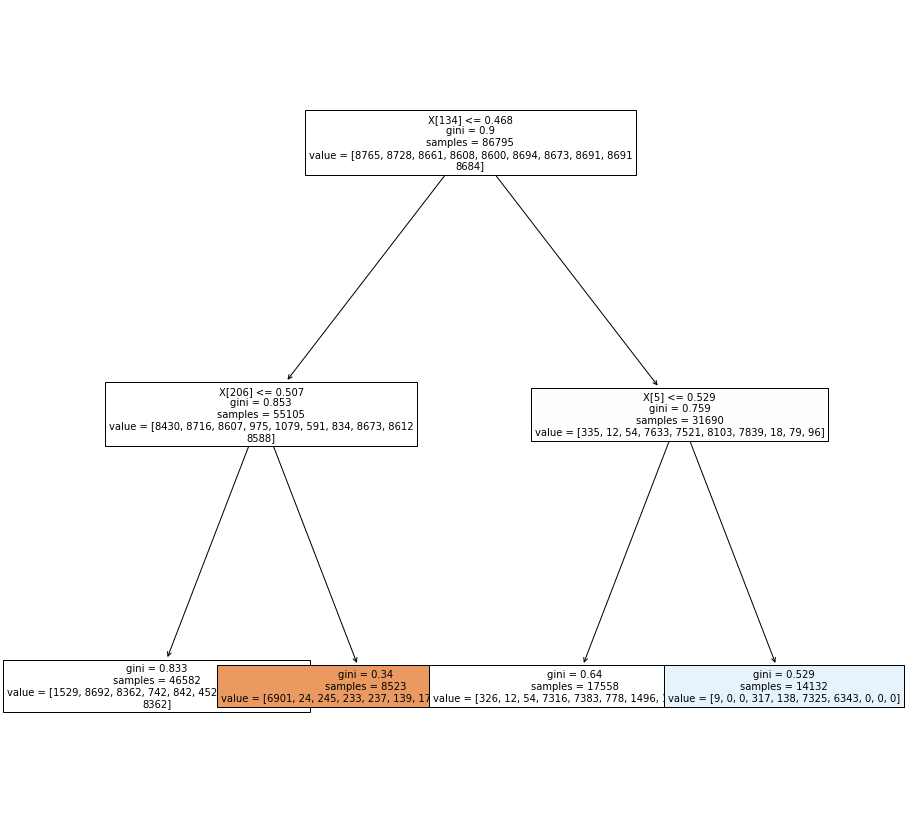

In [ ]:
testPred4=DsTree(pcaFlag=0)

##KNN

With PCA

###################### Overall  Performance of KNN ##########################

KNN Fit Time: 673.0408902168274 sec

KNN Train Model  Score: 96.08 %

KNN Test Model Score: 83.95 %
KNN Accuracy Score: 83.95 %

KNN Precision Score: 83.95 %

KNN Recall Score: 83.95 %

KNN f1 Score: 83.95 %

KNN AUC Score: 95.18 %

KNN Confusion Matrix:

[[3121    5   23  118  118   22   59   12  195   84]
 [  39 3096   22   17   37    5   11  483   11   20]
 [ 150   32 2980   37   57    4   13   95   83  261]
 [  17    2    2 2971  419  122  156    0    0    0]
 [  24    0    4  503 2977   83   93    0    0    1]
 [   4    0    1   51   34 3490  146    0    0    0]
 [  10    0    0  276  146  176 3108    0    0    1]
 [  70   67   30   23   37    1   16 3425   23   32]
 [ 200   14   53   66   70   12   24   43 3018  225]
 [ 198   24  104   68   78   10   16   64  118 3042]]
KNN Associated HeatMap:



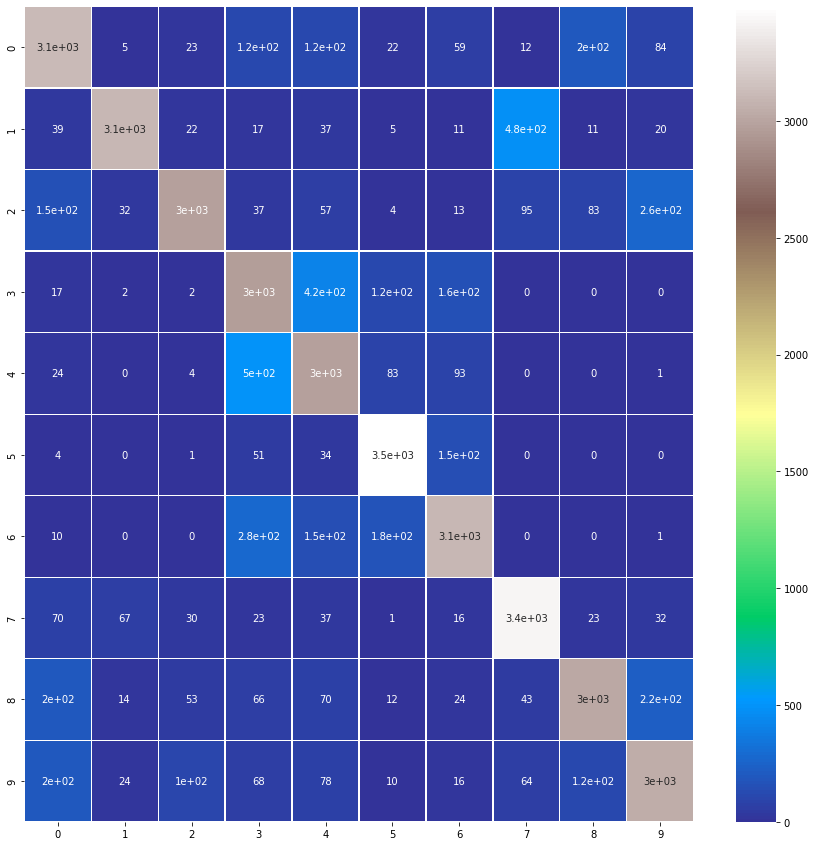

In [ ]:
KNN(pcaFlag=1)

Without PCA

###################### Overall  Performance of KNN ##########################

KNN Fit Time: 758.1061034202576 sec

KNN Train Model  Score: 96.81 %

KNN Test Model Score: 93.95 %
KNN Accuracy Score: 93.95 %

KNN Precision Score: 93.95 %

KNN Recall Score: 93.95 %

KNN f1 Score: 93.95 %

KNN AUC Score: 98.81 %

KNN Confusion Matrix:

[[3570    5   17   33   39    5    9   15   39   25]
 [  38 3420   21    1   12    0    1  224   10   14]
 [  59   15 3419   11   12    2    4   39   41  110]
 [  39    0    7 3492   96   17   27    1    6    4]
 [  41    2    9  112 3468   15   19    2    6   11]
 [  20    0    2   31   53 3537   81    1    0    1]
 [  21    1    5   98   85   33 3462    3    6    3]
 [  30   20   28    4    8    0    0 3603    9   22]
 [  67    5   29   15   16    2    5   20 3520   46]
 [  64   14   46    8   23    2    3   48   58 3456]]
KNN Associated HeatMap:



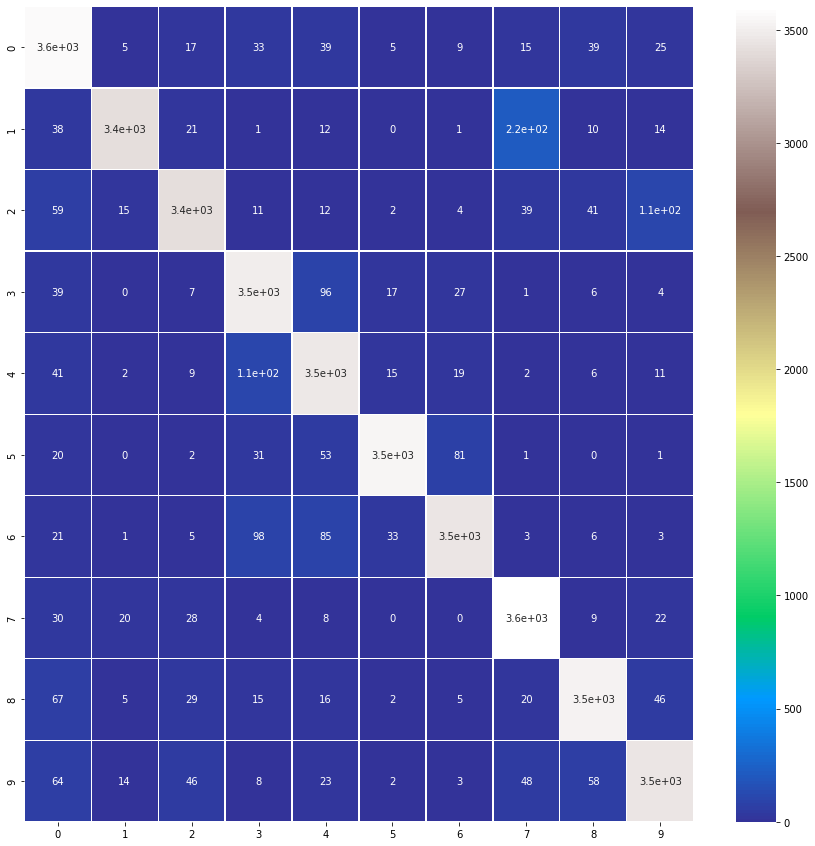

In [ ]:
testPred5=KNN(pcaFlag=0)

##Naive Bayes

With PCA

###################### Overall  Performance of NB ##########################

NB Fit Time: 2.383354425430298 sec

NB Train Model  Score: 63.1 %

NB Test Model Score: 52.34 %
NB Accuracy Score: 52.34 %

NB Precision Score: 52.34 %

NB Recall Score: 52.34 %

NB f1 Score: 52.34 %

NB AUC Score: 86.48 %

NB Confusion Matrix:

[[1646   32  603  215   13 1043   61    0  131   13]
 [  18 2611  301  348    9  168  188   67   24    7]
 [ 239   44 2479  328    4  449  117    0   33   19]
 [  80  108  528 2501   32   73  270    0   36   61]
 [  79   86  547 2243  290   31  292    1   42   74]
 [  40  551  188   13    7 2870   40    0   14    3]
 [  67  242  464  309   21 1650  932    1   26    5]
 [  50  335  373  264  218   14  167 2258   42    3]
 [  92   42  538  161   10  873   21    0 1953   35]
 [  71   69  635  341   96  328  172    0   81 1929]]
NB Associated HeatMap:



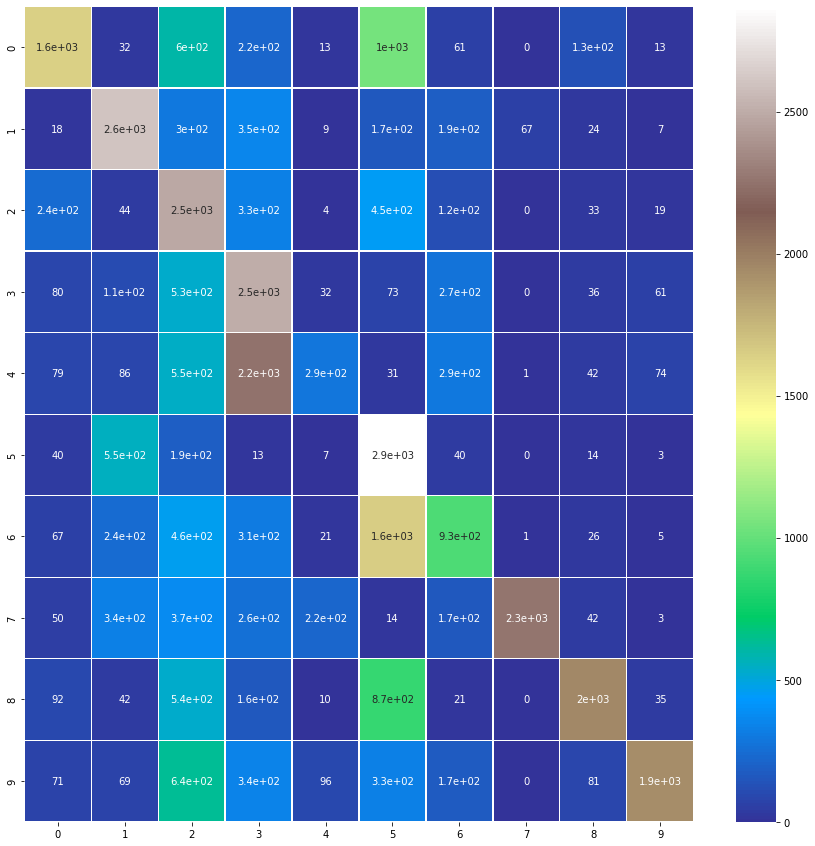

In [ ]:
NbBayes(pcaFlag=1)

Without PCA

###################### Overall  Performance of NB ##########################

NB Fit Time: 5.633616924285889 sec

NB Train Model  Score: 65.11 %

NB Test Model Score: 64.73 %
NB Accuracy Score: 64.73 %

NB Precision Score: 64.73 %

NB Recall Score: 64.73 %

NB f1 Score: 64.73 %

NB AUC Score: 90.01 %

NB Confusion Matrix:

[[2281    0  101  116  622    0    0  451  186    0]
 [ 382 2487   45    6  370    0    0  421   18   12]
 [ 656   19 2135    8  320    0    0  426   40  108]
 [  15    0    0 2976  233    4  134  326    1    0]
 [  20    0    3  574 2647    1   47  390    3    0]
 [   0    0    0  363    1 2868  384  110    0    0]
 [   2    0    0  674   16    6 2747  272    0    0]
 [ 340  141    5    3  342    0    0 2619   49  225]
 [ 376    1  247    8  707    0    0  447 1934    5]
 [ 369    2  705    6  696    0    0  497   64 1383]]
NB Associated HeatMap:



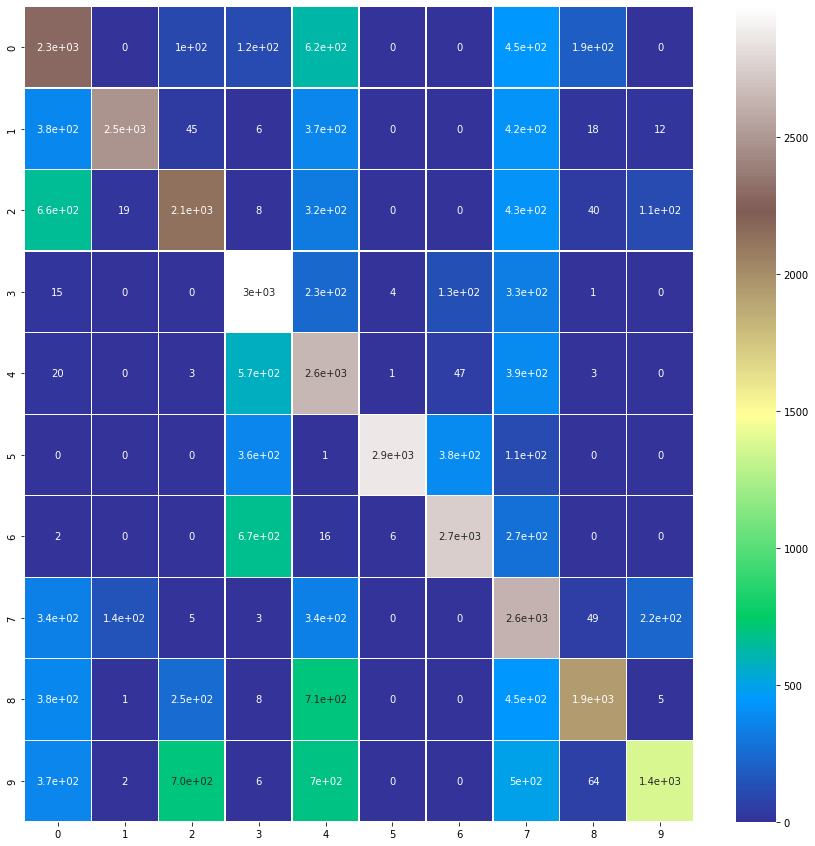

In [ ]:
testPred6=NbBayes(pcaFlag=0)

##ROC CURVE

In [ ]:
Y_pred_probaPca

{'Ds': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])}

In [ ]:
y_test_binarized=label_binarize(Y_val,classes=np.unique(Y_val))

In [ ]:
classes=label_encoder.classes_

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

In [ ]:
Y_pre_prob

array([[6.49397078e-09, 9.18619761e-11, 1.28844782e-05, ...,
        8.36943502e-11, 1.65944490e-14, 4.91052428e-12],
       [2.85838626e-01, 3.38552234e-02, 1.02516773e-01, ...,
        1.61980302e-02, 5.80584561e-02, 2.89565156e-01],
       [2.42759664e-05, 6.37555157e-01, 5.29179782e-05, ...,
        3.18888397e-01, 4.12958108e-07, 4.34434672e-02],
       ...,
       [2.15056023e-06, 2.19342008e-07, 1.17752632e-02, ...,
        5.00307046e-06, 3.03342488e-04, 9.87870157e-01],
       [8.77551057e-03, 4.67044397e-03, 2.83310038e-03, ...,
        9.62253745e-01, 2.37261437e-03, 1.21746630e-02],
       [5.50821176e-10, 9.91859279e-01, 8.11374053e-03, ...,
        1.28851087e-05, 1.30775823e-14, 1.33861008e-05]])

In [ ]:
obj={
    
}
obj['lol']=Y_pre_prob
# print(obj['lol'])
nnp=np.array(obj['lol'])
print(nnp)


[[6.49397078e-09 9.18619761e-11 1.28844782e-05 ... 8.36943502e-11
  1.65944490e-14 4.91052428e-12]
 [2.85838626e-01 3.38552234e-02 1.02516773e-01 ... 1.61980302e-02
  5.80584561e-02 2.89565156e-01]
 [2.42759664e-05 6.37555157e-01 5.29179782e-05 ... 3.18888397e-01
  4.12958108e-07 4.34434672e-02]
 ...
 [2.15056023e-06 2.19342008e-07 1.17752632e-02 ... 5.00307046e-06
  3.03342488e-04 9.87870157e-01]
 [8.77551057e-03 4.67044397e-03 2.83310038e-03 ... 9.62253745e-01
  2.37261437e-03 1.21746630e-02]
 [5.50821176e-10 9.91859279e-01 8.11374053e-03 ... 1.28851087e-05
  1.30775823e-14 1.33861008e-05]]


Logistic Regression with Pca 

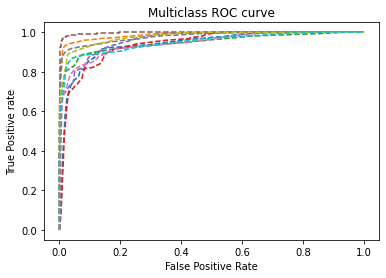

In [ ]:
for i in range(10):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],nnp[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()


In [ ]:
Roc_Auc_curve()

##Regression Models Functions

Regression Model Functions

In [ ]:
def Evaluate(y_val,y_pred):
     print('')
     print('mean_absolute_error:{}'.format(metrics.mean_absolute_error(y_val , y_pred)))
     print('mean_squared_error:{}'.format(metrics.mean_squared_error(y_val , y_pred)))
     print('mean_squared_error:{}'.format(metrics.mean_squared_error(y_val , y_pred)**.5))
     print('r2_score:{}'.format(metrics.r2_score(y_val , y_pred))) 
     print('')

def  LinearReg(pcaFlag):
  if pcaFlag==0:
     start=time.time()
     linear_regression = LinearRegression(fit_intercept=True, normalize=False)
     linear_regression.fit(X_train,Y_train)
     Y_pred_linear = linear_regression.predict(X_val)
     Mscore=linear_regression.score(X_val,Y_val) 
     ModelScore['LinearReg_Score']= Mscore
     end=time.time()
     ModelFitTime['LRFitTime']=(end-start)  
    #  print('Y Intercept:', Lasso_regression.intercept_)
    #  print('Coefficient:', Lasso_regression.coef_)

     print('####################################### Comparasion Study of Linear Regression ######################################')
     print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_linear,'Difference':Y_val-Y_pred_linear}))
     

     print('###################### Overall Description of Linear Regression ##########################')

     print('Linear Regression Model Score:',Mscore)
     
     print('Linear Regression Fit Time:',(end-start))
     
     print('####################################### Evaluation Score ######################################')
     Evaluate(Y_val, Y_pred_linear)    

  else:
     start=time.time()
     linear_regression = Ridge(fit_intercept=True, normalize=False)
     linear_regression.fit(X_train_pca,Y_train)
     Y_pred_linear = linear_regression.predict(X_val_pca)
     Mscore=linear_regression.score(X_val_pca,Y_val) 
     ModelScorePca['LinearReg_Score']= Mscore
     end=time.time()
     ModelFitTimePca['LRFitTime']=(end-start)  
    #  print('Y Intercept:', Lasso_regression.intercept_)
    #  print('Coefficient:', Lasso_regression.coef_)

     print('####################################### Comparasion Study of Linear Regression ######################################')
     print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_linear,'Difference':Y_val-Y_pred_linear}))
     

     print('###################### Overall Description of Linear Regression ##########################')

     print('Linear Regression Model Score:',Mscore)
     
     print('Linear Regression Fit Time:',(end-start))

     print('####################################### Evaluation Score ######################################')
     Evaluate(Y_val, Y_pred_linear)

def  LassoReg(Alpha,pcaFlag):
  if pcaFlag==0:
     start=time.time()
     Lasso_regression = Lasso(alpha=Alpha, fit_intercept=True, normalize=False, random_state=72)
     Lasso_regression.fit(X_train,Y_train)
     Y_pred_lasso  = Lasso_regression.predict(X_val)
 
     Mscore= Lasso_regression.score(X_val,Y_val) 
     ModelScore['LassoScore']=Mscore
     end=time.time()
     ModelFitTime['LassoFitTime']=(end-start)  


     print('####################################### Comparasion Study of Lasso Regression ######################################')
     print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_lasso,'Difference':Y_val-Y_pred_lasso}))
    
  
          
     print('###################### Overall Description of Lasso Regression ##########################')

     print('Lasso Regression Model Score:',Mscore)
     
     print('Lasso Regression Fit Time:',(end-start))

     print('####################################### Evaluation Score ######################################')
     Evaluate(Y_val, Y_pred_lasso)

  else:
      start=time.time()
      Lasso_regression = Lasso(alpha=Alpha, fit_intercept=True, normalize=False, random_state=72)
      Lasso_regression.fit(X_train_pca,Y_train)
      Y_pred_lasso  = Lasso_regression.predict(X_val_pca)

      Mscore= Lasso_regression.score(X_val_pca,Y_val) 
      ModelScorePca['LassoScore']=Mscore

      end=time.time()
      ModelFitTimePca['LassoFitTime']=(end-start)  
    
     #  print('Y Intercept:', Lasso_regression.intercept_)
     #  print('Coefficient:', Lasso_regression.coef_)

      print('####################################### Comparasion Study of Lasso Regression ######################################')

      print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_lasso,'Difference':Y_val-Y_pred_lasso}))
      ModelScore['LassoScore']= Lasso_regression.score(X_train_pca,Y_train) 
     


      print('###################### Overall Description of Lasso Regression ##########################')

      print('Lasso Regression Model Score:',Mscore)
     
      print('Lasso Regression Fit Time:',(end-start))

      print('####################################### Evaluation Score ######################################')
      Evaluate(Y_val, Y_pred_lasso)

def  RidgeReg(Alpha,pcaFlag):
  if pcaFlag==0:
     start=time.time()
     Ridge_regression = Ridge(alpha=Alpha, fit_intercept=True, normalize=False, random_state=72)
     Ridge_regression.fit(X_train,Y_train)
     Y_pred_ridge = Ridge_regression.predict(X_val)
     Mscore=Ridge_regression.score(X_val,Y_val) 
     ModelScore['RidgeScore']= Mscore
     end=time.time()
     ModelFitTime['RidgeFitTime']=(end-start)  
    #  print('Y Intercept:', Lasso_regression.intercept_)
    #  print('Coefficient:', Lasso_regression.coef_)

     print('####################################### Comparasion Study of Ridge Regression ######################################')
     print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_ridge,'Difference':Y_val-Y_pred_ridge}))
     

     print('###################### Overall Description of Ridge Regression ##########################')

     print('Ridge Regression Model Score:',Mscore)
     
     print('Ridge Regression Fit Time:',(end-start))
     
     print('####################################### Evaluation Score ######################################')
     Evaluate(Y_val, Y_pred_ridge)    

  else:
     start=time.time()
     Ridge_regression = Ridge(alpha=Alpha, fit_intercept=True, normalize=False, random_state=72)
     Ridge_regression.fit(X_train_pca,Y_train)
     Y_pred_ridge = Ridge_regression.predict(X_val_pca)
     Mscore=Ridge_regression.score(X_val_pca,Y_val) 
     ModelScorePca['RidgeScore']= Mscore
     end=time.time()
     ModelFitTimePca['RidgeFitTime']=(end-start)  
    #  print('Y Intercept:', Lasso_regression.intercept_)
    #  print('Coefficient:', Lasso_regression.coef_)

     print('####################################### Comparasion Study of Ridge Regression ######################################')
     print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_ridge,'Difference':Y_val-Y_pred_ridge}))
     

     print('###################### Overall Description of Ridge Regression ##########################')

     print('Ridge Regression Model Score:',Mscore)
     
     print('Ridge Regression Fit Time:',(end-start))

     print('####################################### Evaluation Score ######################################')
     Evaluate(Y_val, Y_pred_ridge)  
     
def  ElasticNetReg(Alpha,Ratio,pcaFlag):
  #Ratio=l1_ratio
  if pcaFlag==0:
     start=time.time()
     ElasticNet_regression = Lasso(alpha=Alpha,l1_ratio=Ratio)
     ElasticNet_regression.fit(X_train,Y_train)
     Y_pred_enet  = ElasticNet_regression.predict(X_val)
 
     Mscore= ElasticNet_regression.score(X_val,Y_val) 
     ModelScore['ElasticNetScore']=Mscore
     end=time.time()
     ModelFitTime['ElasticRegFitTime']=(end-start)  


     print('####################################### Comparasion Study of Elastic Net Regression ######################################')
     print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_enet,'Difference':Y_val-Y_pred_enet}))
    
  
          
     print('###################### Overall Description of Elastic Net Regression ##########################')

     print('Elastic Net Regression Model Score:',Mscore)
     
     print('Elastic Net Regression Fit Time:',(end-start))

     print('####################################### Evaluation Score ######################################')
     Evaluate(Y_val, Y_pred_enet)
  
  else:
    start=time.time()
    ElasticNet_regression = Lasso(alpha=Alpha,l1_ratio=Ratio)
    ElasticNet_regression.fit(X_train_pca,Y_train)
    Y_pred_enet  = ElasticNet_regression.predict(X_val_pca)

    Mscore= ElasticNet_regression.score(X_val_pca,Y_val) 
    ModelScore['ElasticNetScore']=Mscore
    end=time.time()
    ModelFitTime['ElasticRegFitTime']=(end-start)

    print('####################################### Comparasion Study of Elastic Net Regression ######################################')
    print(pd.DataFrame({'Actual Value':Y_val,'Predicted Value':Y_pred_enet,'Difference':Y_val-Y_pred_enet}))

    print('###################### Overall Description of Elastic Net Regression ##########################')

    print('Elastic Net Regression Model Score:',Mscore)
    print('Elastic Net Regression Fit Time:',(end-start))

    print('####################################### Evaluation Score ######################################')
    Evaluate(Y_val, Y_pred_enet)

Regression Model Function Call

##Linear Regression

With PCA

In [ ]:
LinearReg(pcaFlag=1)

####################################### Comparasion Study of Linear Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.463919    1.536081
82978              0         4.284903   -4.284903
169816             7         4.719917    2.280083
105646             8         6.718755    1.281245
77887              8         8.499196   -0.499196
...              ...              ...         ...
72307              5         4.648218    0.351782
95545              6         3.800823    2.199177
123975             9         5.306425    3.693575
185890             7         5.348494    1.651506
197534             1         2.124535   -1.124535

[37198 rows x 3 columns]
###################### Overall Description of Linear Regression ##########################
Linear Regression Model Score: 0.11456519395100262
Linear Regression Fit Time: 0.16248440742492676
####################################### Evaluation Score #########

Without PCA

In [ ]:
LinearReg(pcaFlag=0)

####################################### Comparasion Study of Linear Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         5.928300    0.071700
82978              0         4.500469   -4.500469
169816             7         6.684052    0.315948
105646             8         6.532812    1.467188
77887              8         8.398240   -0.398240
...              ...              ...         ...
72307              5         6.279905   -1.279905
95545              6         5.382075    0.617925
123975             9         7.981164    1.018836
185890             7         5.133591    1.866409
197534             1         0.485595    0.514405

[37198 rows x 3 columns]
###################### Overall Description of Linear Regression ##########################
Linear Regression Model Score: 0.5808720391756954
Linear Regression Fit Time: 1.6504662036895752
####################################### Evaluation Score ###########

##LASSO Regression

With PCA and ALPHA=0.01

In [ ]:
LassoReg(Alpha=0.01,pcaFlag=1)

####################################### Comparasion Study of Lasso Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.602465    1.397535
82978              0         4.606834   -4.606834
169816             7         4.873794    2.126206
105646             8         6.616487    1.383513
77887              8         8.363377   -0.363377
...              ...              ...         ...
72307              5         4.746441    0.253559
95545              6         3.914170    2.085830
123975             9         5.168625    3.831375
185890             7         5.259721    1.740279
197534             1         2.151625   -1.151625

[37198 rows x 3 columns]
###################### Overall Description of Lasso Regression ##########################
Lasso Regression Model Score: 0.1490399796422328
Lasso Regression Fit Time: 0.11237239837646484
####################################### Evaluation Score ##############

With PCA and ALPHA=1





In [ ]:
LassoReg(Alpha=1,pcaFlag=1)

####################################### Comparasion Study of Lasso Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.496837    1.503163
82978              0         4.496837   -4.496837
169816             7         4.496837    2.503163
105646             8         4.496837    3.503163
77887              8         4.496837    3.503163
...              ...              ...         ...
72307              5         4.496837    0.503163
95545              6         4.496837    1.503163
123975             9         4.496837    4.503163
185890             7         4.496837    2.503163
197534             1         4.496837   -3.496837

[37198 rows x 3 columns]
###################### Overall Description of Lasso Regression ##########################
Lasso Regression Model Score: -9.837728409678448e-10
Lasso Regression Fit Time: 0.1277306079864502
####################################### Evaluation Score ###########

With PCA and ALPHA=10

In [ ]:
LassoReg(Alpha=10,pcaFlag=1)

####################################### Comparasion Study of Lasso Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.496837    1.503163
82978              0         4.496837   -4.496837
169816             7         4.496837    2.503163
105646             8         4.496837    3.503163
77887              8         4.496837    3.503163
...              ...              ...         ...
72307              5         4.496837    0.503163
95545              6         4.496837    1.503163
123975             9         4.496837    4.503163
185890             7         4.496837    2.503163
197534             1         4.496837   -3.496837

[37198 rows x 3 columns]
###################### Overall Description of Lasso Regression ##########################
Lasso Regression Model Score: -9.837728409678448e-10
Lasso Regression Fit Time: 0.12485074996948242
####################################### Evaluation Score ##########

##Ridge Regression

With PCA and ALPHA 0.01

In [ ]:
RidgeReg(Alpha=0.01,pcaFlag=1)

####################################### Comparasion Study of Ridge Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.463747    1.536253
82978              0         4.284738   -4.284738
169816             7         4.719954    2.280046
105646             8         6.719112    1.280888
77887              8         8.499818   -0.499818
...              ...              ...         ...
72307              5         4.648257    0.351743
95545              6         3.800670    2.199330
123975             9         5.306551    3.693449
185890             7         5.348588    1.651412
197534             1         2.124545   -1.124545

[37198 rows x 3 columns]
###################### Overall Description of Ridge Regression ##########################
Ridge Regression Model Score: 0.11448994217148678
Ridge Regression Fit Time: 0.15172958374023438
####################################### Evaluation Score #############

With PCA and Alpha=1

In [ ]:
RidgeReg(Alpha=1,pcaFlag=1)

####################################### Comparasion Study of Ridge Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.463919    1.536081
82978              0         4.284903   -4.284903
169816             7         4.719917    2.280083
105646             8         6.718755    1.281245
77887              8         8.499196   -0.499196
...              ...              ...         ...
72307              5         4.648218    0.351782
95545              6         3.800823    2.199177
123975             9         5.306425    3.693575
185890             7         5.348494    1.651506
197534             1         2.124535   -1.124535

[37198 rows x 3 columns]
###################### Overall Description of Ridge Regression ##########################
Ridge Regression Model Score: 0.11456519395100262
Ridge Regression Fit Time: 0.17395639419555664
####################################### Evaluation Score #############

With PCA and Alpha=10

In [ ]:
RidgeReg(Alpha=10,pcaFlag=1)

####################################### Comparasion Study of Ridge Regression ######################################
        Actual Value  Predicted Value  Difference
169357             6         4.465472    1.534528
82978              0         4.286399   -4.286399
169816             7         4.719574    2.280426
105646             8         6.715516    1.284484
77887              8         8.493545   -0.493545
...              ...              ...         ...
72307              5         4.647868    0.352132
95545              6         3.802209    2.197791
123975             9         5.305284    3.694716
185890             7         5.347643    1.652357
197534             1         2.124444   -1.124444

[37198 rows x 3 columns]
###################### Overall Description of Ridge Regression ##########################
Ridge Regression Model Score: 0.1152463628553152
Ridge Regression Fit Time: 0.1583728790283203
####################################### Evaluation Score ###############

##ElasticNet Regression

With PCA and Alpha 0.1 and L1_Ratio 0.5

In [ ]:
enet=ElasticNet(alpha=10,l1_ratio=0.5)
enet.fit(X_train,Y_train)

ElasticNet(alpha=10)

In [ ]:
y_pred_elasticnet =enet.predict(X_test)

##PERFORMANCE SCORE CHARTS

In [ ]:
AccuracyScore

{'DSAccuracyScore': 0.885047583203398,
 'KNNAccuracyScore': 0.9394859938706382,
 'LogisticRegressionAccuracyScore': 0.8978708532716813,
 'NBAccuracyScore': 0.6472659820420452,
 'RfForestAccuracyScore': 0.9640303242109791,
 'SVMAccuracyScore': 0.9330340340878542}

In [ ]:
AcScore=AccuracyScore

In [ ]:
def convertPercentange(per_dict):
   for x in per_dict:
      per_dict[x]=round((per_dict[x]*100),2)
   return per_dict

In [ ]:
def ploting(per_dict):
 names = list(AcScore.keys())
 values = list(AcScore.values())
 plt.figure(figsize=(20,10))
 plt.bar(range(len(AcScore)), values, tick_label=names)
 plt.show()

Accuracy Score BarPlot

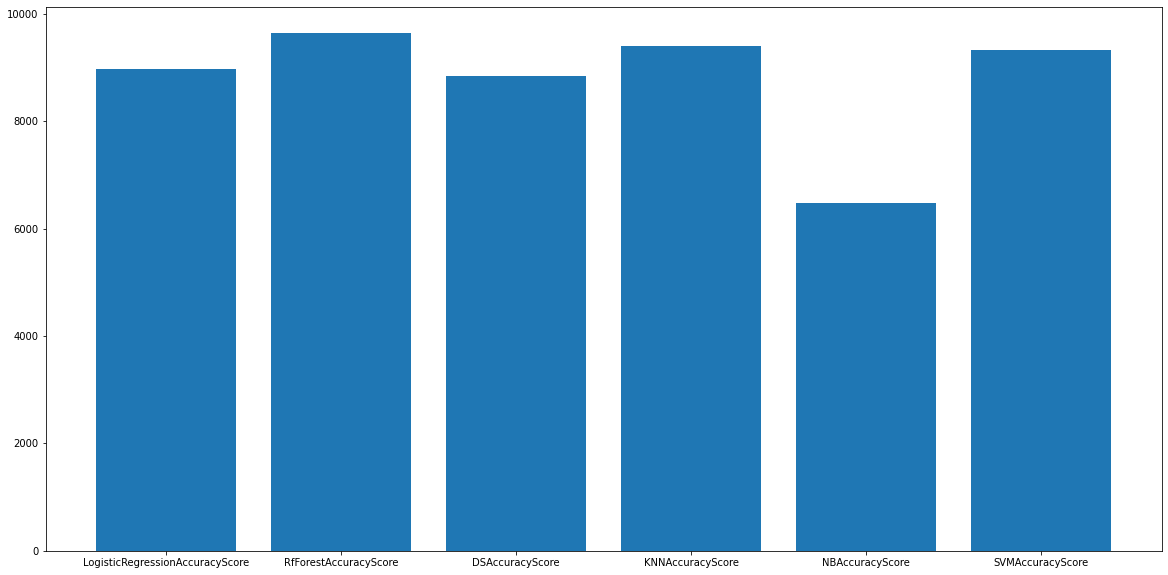

In [ ]:
AcScore=AccuracyScore
AcScore=convertPercentange(AcScore)
ploting(AcScore)

F1 Score Bar Plot

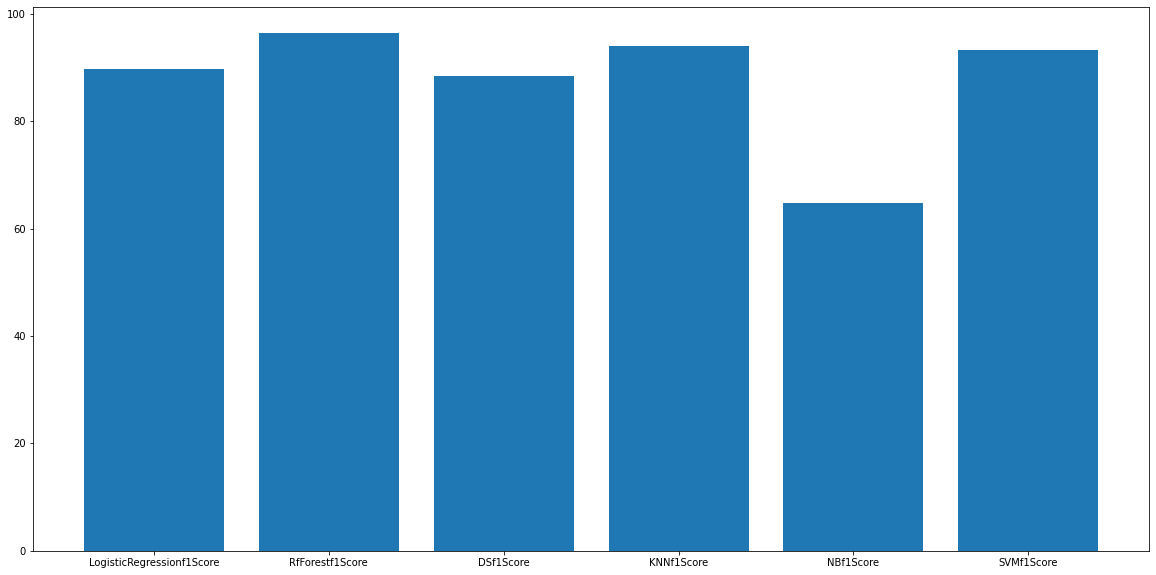

In [ ]:
AcScore=f1Score
AcScore=convertPercentange(AcScore)
ploting(AcScore)

AUC Score Bar Plot

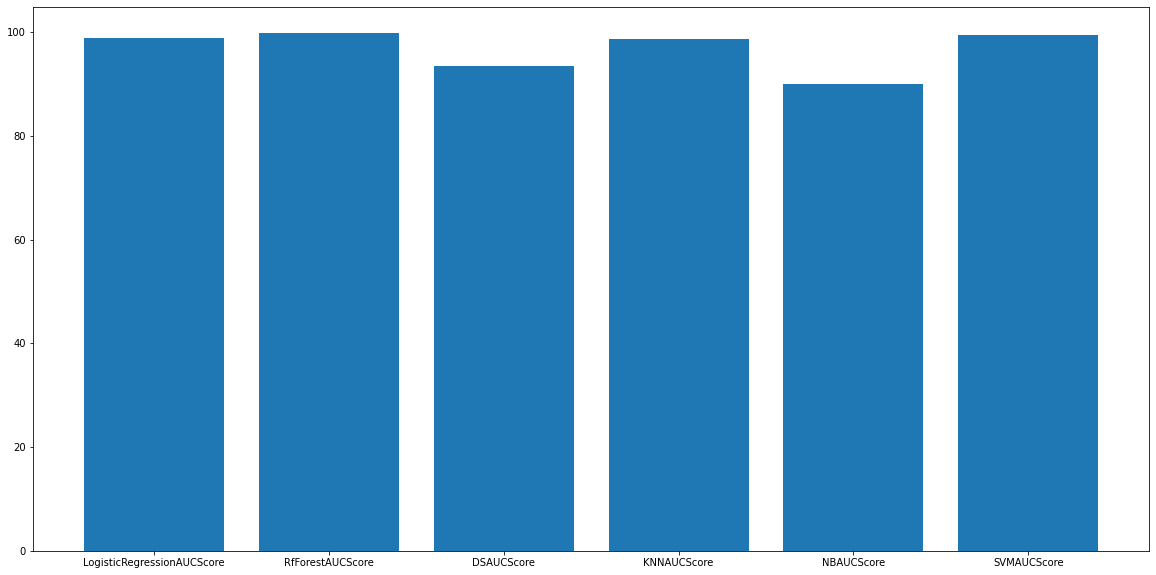

In [ ]:
AcScore=AucScore
AcScore=convertPercentange(AcScore)
ploting(AcScore)

## Prepare Submission File

For Logistic Regression submission

In [ ]:
testPred

array([4, 4, 4, ..., 4, 8, 9])

In [ ]:
test1=label_encoder.inverse_transform(testPred)
test1

array(['Escherichia_fergusonii', 'Escherichia_fergusonii',
       'Escherichia_fergusonii', ..., 'Escherichia_fergusonii',
       'Streptococcus_pneumoniae', 'Streptococcus_pyogenes'], dtype=object)

In [ ]:
len(test1)

100000

In [ ]:
NewSubmission = SubmissionDf.copy()
NewSubmission['target']=test1
NewSubmission.to_csv('5_1_result.csv', index=False)


For SVM SUBMISSION

In [ ]:
testPred2

array([4, 6, 4, ..., 4, 0, 9])

In [ ]:
test2=label_encoder.inverse_transform(testPred2)
test2

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Escherichia_fergusonii', ..., 'Escherichia_fergusonii',
       'Bacteroides_fragilis', 'Streptococcus_pyogenes'], dtype=object)

In [ ]:
len(test2)

100000

In [ ]:
NewSubmission = SubmissionDf.copy()
NewSubmission['target']=test2
NewSubmission.to_csv('5_2_result.csv', index=False)


For Random Forest SUBMISSION

In [ ]:
testPred3

array([4, 3, 4, ..., 4, 0, 9])

In [ ]:
test3=label_encoder.inverse_transform(testPred3)
test3

array(['Escherichia_fergusonii', 'Escherichia_coli',
       'Escherichia_fergusonii', ..., 'Escherichia_fergusonii',
       'Bacteroides_fragilis', 'Streptococcus_pyogenes'], dtype=object)

In [ ]:
len(test3)

100000

In [ ]:
NewSubmission = SubmissionDf.copy()
NewSubmission['target']=test3
NewSubmission.to_csv('5_3_result.csv', index=False)

For Decesion Tree Submission

In [ ]:
testPred4

array([3, 4, 0, ..., 3, 8, 7])

In [ ]:
test4=label_encoder.inverse_transform(testPred4)
test4

array(['Escherichia_coli', 'Escherichia_fergusonii',
       'Bacteroides_fragilis', ..., 'Escherichia_coli',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus'], dtype=object)

In [ ]:
NewSubmission = SubmissionDf.copy()
NewSubmission['target']=test4
NewSubmission.to_csv('5_4_result.csv', index=False)

For KNN SUBMISSION

In [ ]:
testPred5

array([4, 4, 4, ..., 4, 4, 9])

In [ ]:
test5=label_encoder.inverse_transform(testPred5)
test5

array(['Escherichia_fergusonii', 'Escherichia_fergusonii',
       'Escherichia_fergusonii', ..., 'Escherichia_fergusonii',
       'Escherichia_fergusonii', 'Streptococcus_pyogenes'], dtype=object)

In [ ]:
NewSubmission = SubmissionDf.copy()
NewSubmission['target']=test5
NewSubmission.to_csv('5_5_result.csv', index=False)

For NAIVE SUBMISSION

In [ ]:
testPred6

array([3, 3, 4, ..., 7, 7, 7])

In [ ]:
test6=label_encoder.inverse_transform(testPred6)
test6

array(['Escherichia_coli', 'Escherichia_coli', 'Escherichia_fergusonii',
       ..., 'Staphylococcus_aureus', 'Staphylococcus_aureus',
       'Staphylococcus_aureus'], dtype=object)

In [ ]:
NewSubmission = SubmissionDf.copy()
NewSubmission['target']=test6
NewSubmission.to_csv('4_6_result.csv', index=False)